In [11]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import mplhep as hep
from __future__ import print_function
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.legend_handler import HandlerLine2D
#from scipy.stats import norm
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from scipy import integrate
import mplhep as hep
hep.set_style(hep.style.CMS)
size_xlabels=20
params = {'legend.fontsize': '20',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':size_xlabels,
         'ytick.labelsize':size_xlabels,
         'axes.labelsize': size_xlabels,
         'axes.titlesize': size_xlabels}
#plt.rc_params[axis='y', which='both')
plt.style.use(hep.style.CMS)
plt.rcParams.update(params)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 2


plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 2


plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#ax1.tick_params('both', length=20, width=2, which='major')
#ax1.tick_params('both', length=10, width=1, which='minor')

In [12]:
import plots
## ANALYZING THE INSERT WITH TUNGSTEN + STEEL DATA
#FilePathReco="/media/miguel/Elements/HCAL_Insert_Sim_Files/FTFP_BERT_HP/"
#FilePathReco="/media/miguel/Elements/Data_hcali/Sim_from_Fernando/"
FilePathReco="/media/miguel/Elements/HCAL_Insert_Sim_Files/updated_hcal_layers/"
PathToPlot="./"
     
Time_Threshold=200 #ns

#MIP=0.8#MeV for CALICE Analysis
MIP=0.6 # MeV for Hcal insert 

Gev_To_MeV=1000
Sigma_For_leakage=3
Mean_pions=[]
Mean_electrons=[]
Energy_Threshold=0.1*MIP  #(0.5 * MIP for calice analysis)
FIT_SIGMA=3
theta=2.56
#theta=2.25
eta=plots.get_eta(theta)
print(eta)

3.8014500693565694


## For resolution and leakage for constant rapidity as function of Energy

HELLO JELLO 3000
I am wt


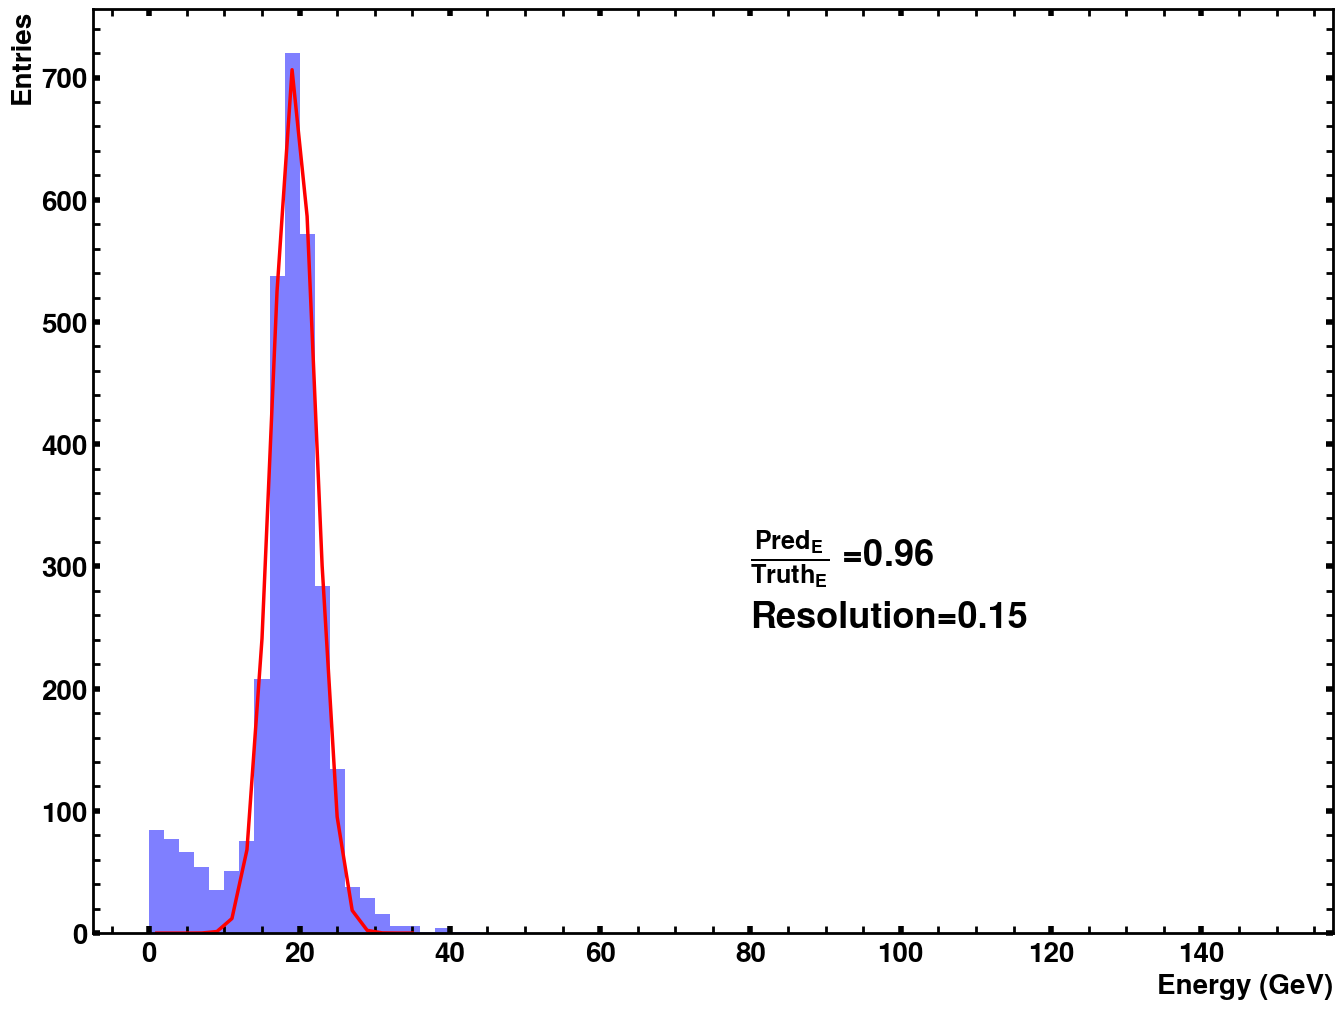

HELLO JELLO 2000
I am wt


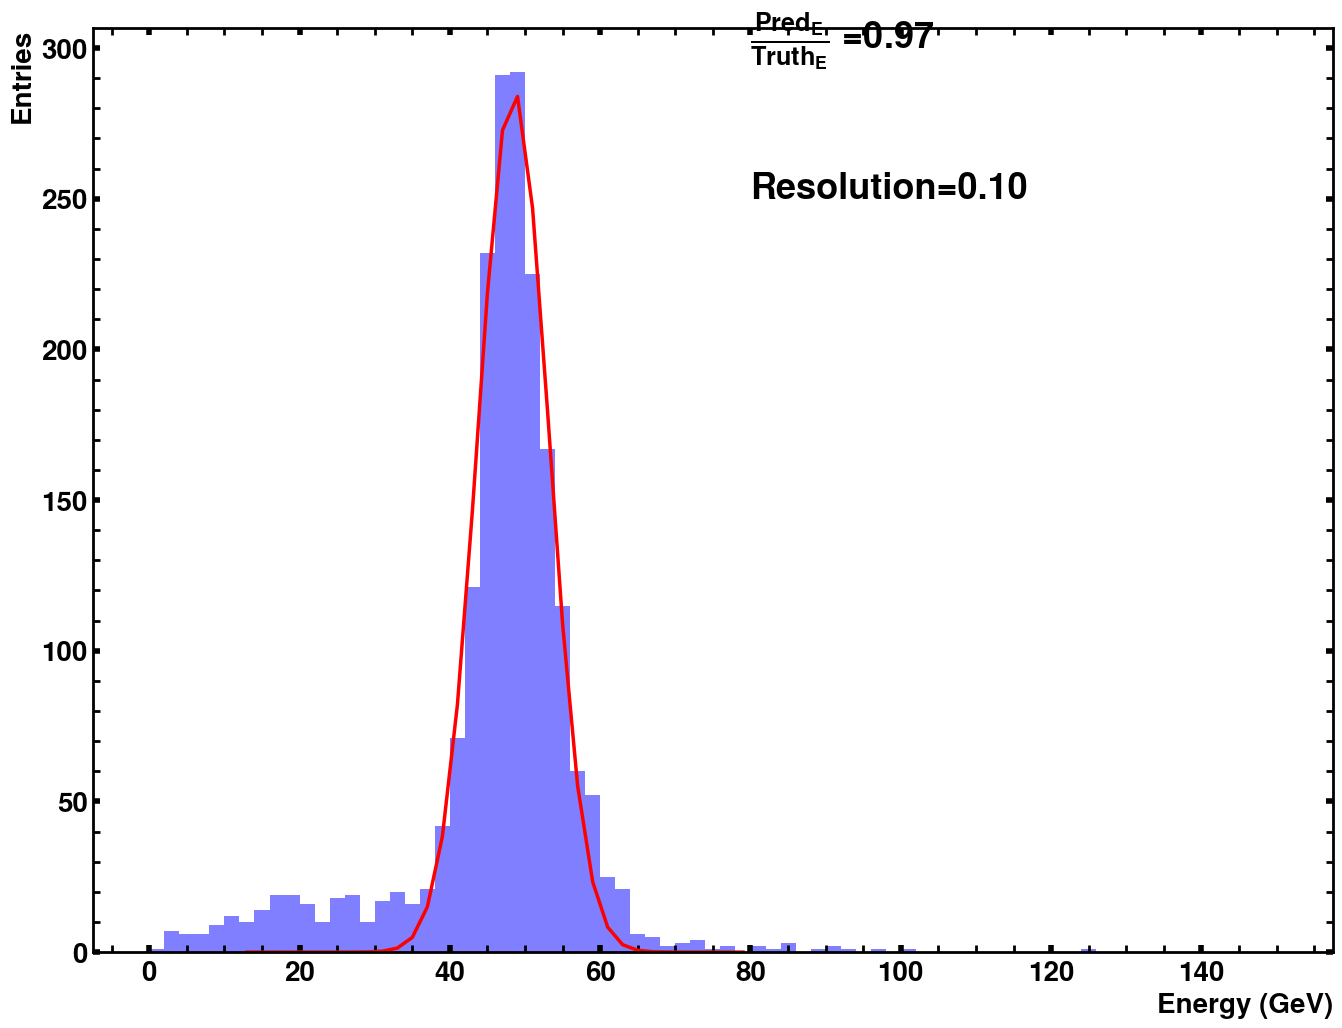

pi_means_30W_24Fe=[19.23,48.45 ]
pi_means_error_30W_24Fe=[0.155,0.166 ]
pi_stds_30W_24Fe=[ 2.88,4.71 ]
pi_stds_error_30W_24Fe=[ 0.155,0.166 ]
pi_leaks_per_30W_24Fe=[ 12.233,11.450 ]
pi_leaks_per_error_30W_24Fe=[ 0.6765,0.7988 ]
pi_resolutions_30W_24Fe=[ 0.15,0.10 ]
pi_resolutions_errors_30W_24Fe=[ 0.0081,0.0034 ]


In [13]:
def get_fitted_mean_std(wt):
    ## This is for the weighted sum of the hcal and hcali
   
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(1/10 of event is selected)
    
    #fileindex="deg_Fe-W" ## for insert file or HCAL orginal file
    absorber_layers=["0W_54Fe","20W_34Fe","25W_29Fe","30W_24Fe","40W_14Fe", "30W_20Fe"]
    index=3
    #fileindex=f"deg_Fernando"
    #fileindex=f"deg_30W_20Fe"
    fileindex=f"deg_Athena_30W_24Fe"
    #fileindex=f"deg_{absorber_layers[index]}"
    
    #fileindex="deg_Fe-W_Sc35_Ab156" ## for insert with absorber 15.6 mm and Sc = 0.35 mm
    #fileindex="deg_Fe-W" ## for insert WITH W 30 LAYER AND FE 20 LAYERS
    energies=[20,50]
    #energies=[10,20,30,50,60,80,100]
    particle='pi-'
    
    for ienergy in energies:
             
        ## FOR THE HCAL Insert reading
        ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
        phi_wFe,ene_good_wFe=plots.read_rootfile_HCAL_Insert(fileindex,fraction,FilePathReco,ienergy,theta,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        ## THIS IS ONLY FOR THE RESOLUTION OF THE HCAL INSERT
        
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error,\
        pi_resolution,pi_resolution_error=plots.get_resolution(ene_good_wFe, ienergy, particle, Sigma_For_leakage, wt)
        
        
        
    
        '''
        ## READ HCAL 
        ene_wFe_h,time_wFe_h,PosRecoX_wFe_h,PosRecoY_wFe_h,PosRecoZ_wFe_h,mass_wFe_h,mom_wFe_h,energy_gen_wFe_h, \
        phi_wFe_h,ene_good_wFe_h=plots.read_rootfile_HCAL(fileindex,fraction,FilePathReco,ienergy,theta,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        ## RESOLUTION HCAL + HCAL INSERT
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error, pi_resolution,\
        pi_resolution_error=plots.get_resolution_hcalall_weighted(wt,ene_good_wFe_h,ene_good_wFe, ienergy, \
                                                         particle,Sigma_For_leakage) 
        '''
        
    
        pi_means.append(pi_mean)
        pi_stds.append(pi_std)
        pi_means_error.append(pi_mean_error)
        pi_stds_error.append(pi_sigma_error)
        pi_resolutions.append(pi_resolution)
        pi_resolution_errors.append(pi_resolution_error)
        pi_leaks_per.append(pi_leak_per)
        pi_leaks_per_error.append(pi_leak_per_error)
    
        
    plots.print_decimal_pi_update('{0}'.format(absorber_layers[index]), particle, pi_means,  pi_means_error,  pi_stds,pi_stds_error, pi_leaks_per, \
                         pi_leaks_per_error, pi_resolutions, pi_resolution_errors)   
    
### WT ON IS FOR THE WEIGHTED SUM OF HCAL AND HCAL INSERT
get_fitted_mean_std('on')  


## Different Scintillator and tungsten layers

In [ ]:
pi_means_30W_20Fe=[180.28 ]
pi_means_error_30W_20Fe=[1.059 ]
pi_stds_30W_20Fe=[ 26.82 ]
pi_stds_error_30W_20Fe=[ 1.059 ]
pi_leaks_per_30W_20Fe=[ 11.400 ]
pi_leaks_per_error_30W_20Fe=[ 0.6506 ]
pi_resolutions_30W_20Fe=[ 0.14877 ]
pi_resolutions_errors_30W_20Fe=[ 0.0059 ]




pi_means_30W_20Fe=[181.82 ]
pi_means_error_30W_20Fe=[1.370 ]
pi_stds_30W_20Fe=[ 28.16 ]
pi_stds_error_30W_20Fe=[ 1.370 ]
pi_leaks_per_30W_20Fe=[ 13.267 ]
pi_leaks_per_error_30W_20Fe=[ 1.0009 ]
pi_resolutions_30W_20Fe=[ 0.15487 ]
pi_resolutions_errors_30W_20Fe=[ 0.0076 ]

HELLO JELLO 2000
HELLO JELLO 3000
HELLO JELLO 2000
HELLO JELLO 3000
HELLO JELLO 3000
HELLO JELLO 2000
HELLO JELLO 3000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 3000
HELLO JELLO 2000
HELLO JELLO 3000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 3000
HELLO JELLO 2000
HELLO JELLO 1000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 3000


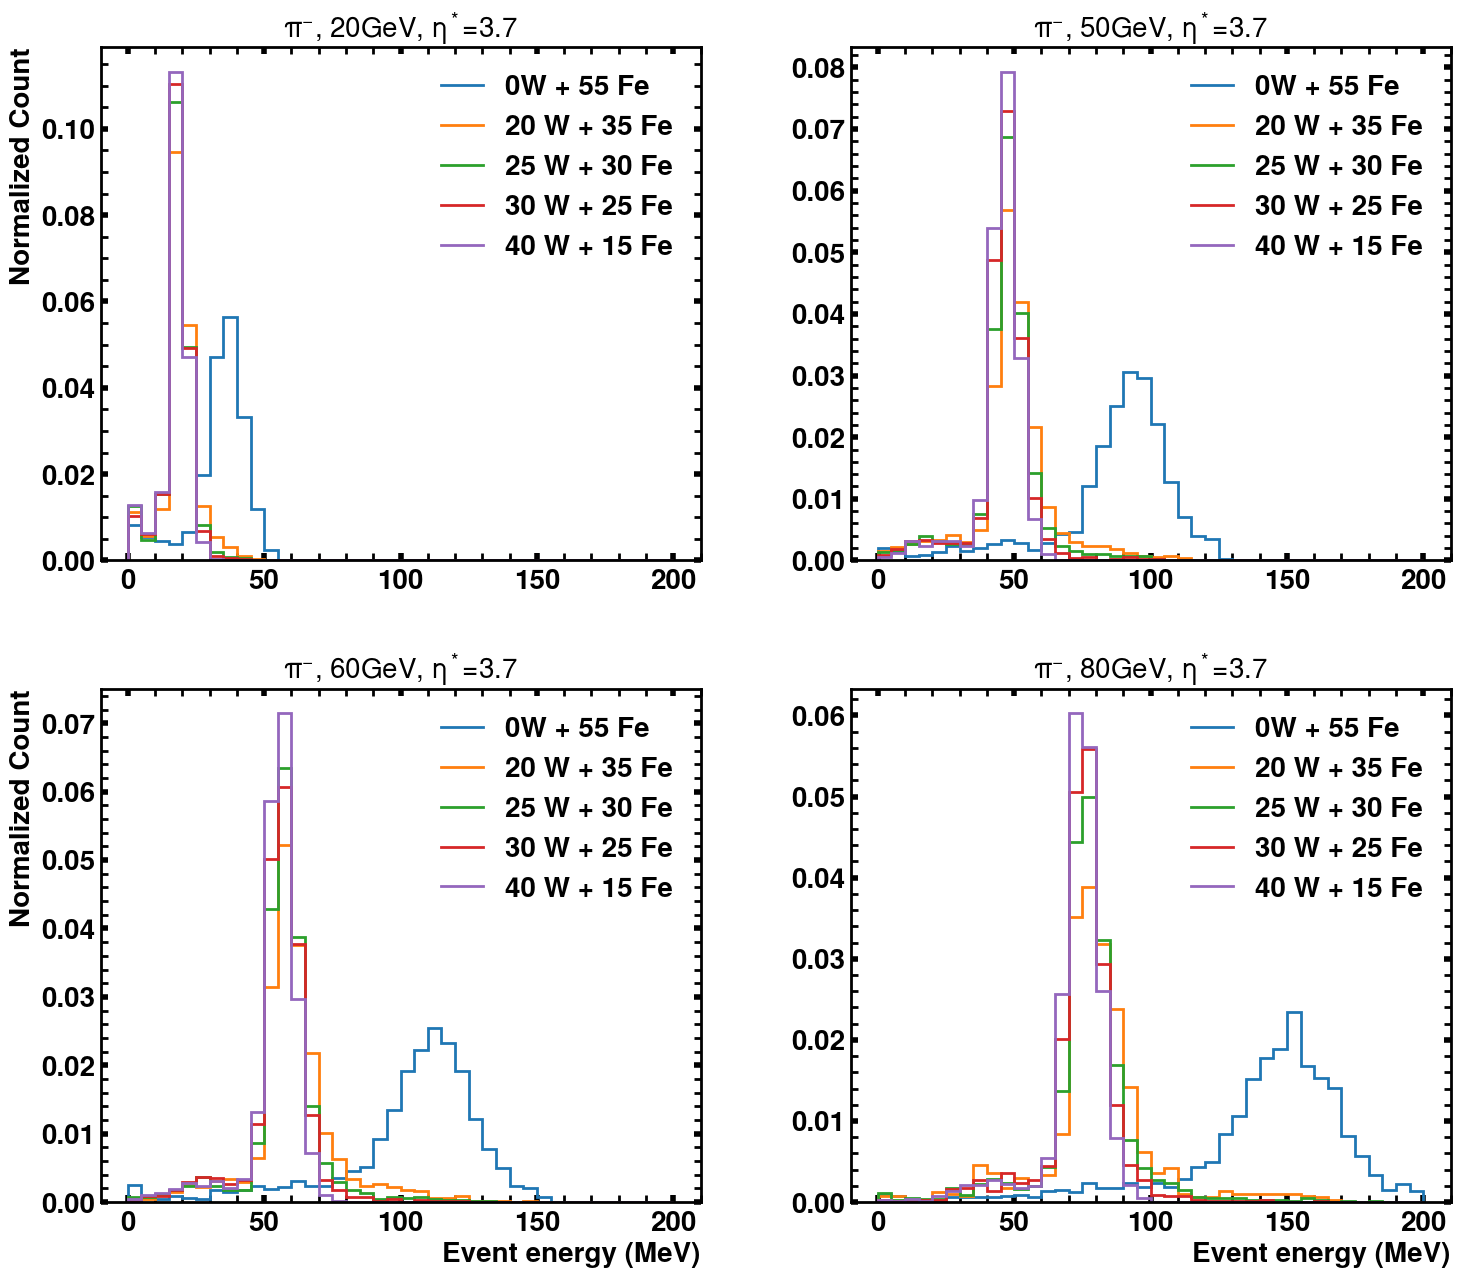

In [7]:
#FilePathReco="/Users/bishnukarki/EIC/HCAL_Insert_Sim_Files/FTFP_BERT_HP/"
#theta=2.83
#eta=plots.get_eta(theta)

from matplotlib.lines import Line2D
def get_fitted_mean_std():
   
    fraction=1
    energies=[20, 50,60, 80]
    #energies=[30] #,20,30,40,50,60,80,100]
    bin_width=10
    #max_range=1200
    
    particle='pi-'
    greek_particle=plots.get_greek_particle(particle) 
    
    
    #extensions=['40W_10Fe', '30W_20Fe', '20W_30Fe','10W_40Fe','5W_45Fe', '0W_50Fe']
    #Name_leg=['40 W + 10 Fe', '30 W + 20 Fe', '20 W + 30 Fe', '10 W + 40 Fe','5 W + 45 Fe','0 W + 50 Fe']
    #colors=['C3','C2','C6', 'C8','C5','C0','C9']
    extensions=["0W_54Fe","20W_34Fe","25W_29Fe","30W_24Fe","40W_14Fe"]
    Name_leg=['0W + 55 Fe','20 W + 35 Fe', '25 W + 30 Fe', '30 W + 25 Fe', '40 W + 15 Fe']
    colors=['C9','C3','C2','C6', 'C8']
    
    #fileindex='deg_'+'{0}'.format(extension)
    nrows=2
    ncols=2
    fig,ax = plt.subplots(nrows,ncols,figsize=(15,15))#,sharex=True, sharey=True)
    plt.subplots_adjust(left=0.0,  wspace=0.25, hspace=0.25)
    
    if particle=="pi-":
        sampling_fraction_hcali=0.0098*1000
        max_range=200
        bin_width=5
    else: 
        sampling_fraction_hcali=1
        max_range=3000
        bin_width=40
        
    
    for ienergy in energies:
        iE=energies.index(ienergy)
        '''
        if ienergy<30:
            max_range=800#50
           
        else:
            max_range=3000#100
            bin_width=40#4
        '''
        if iE<nrows:
            irow=0
            icol=iE
        else:
            irow=1
            icol=iE-ncols
            
        nbins=int (max_range/bin_width)
        
        for extension in extensions:
            '''
            if (extension=='30W_20Fe') and (theta==2.83):
                fileindex='deg'
            else:
                fileindex='deg_'+'{0}'.format(extension)
            '''
            index = extensions.index(extension)
            fileindex=f"deg_Athena_{extensions[index]}"
            #print(fileindex)
            
            #print(index)
            ## FOR THE HCAL Insert mixture W-Fe
            ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile_HCAL_Insert\
            (fileindex,fraction,FilePathReco,ienergy,theta,particle,Time_Threshold,Energy_Threshold)


            ene_total_temp = ak.sum(ene_good,axis=-1)
           
            ene_total = np.divide(ene_total_temp,sampling_fraction_hcali)
            
            
            
            count, bins,_= ax[irow][icol].hist(np.array(ene_total),bins=nbins,alpha=1.0,range=(0,max_range),\
            label=Name_leg[index],linewidth='2', histtype='step', density=True)#,color=colors[index],
            binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
            ax[1][icol].set_xlabel("Event energy (MeV)",fontsize=20)
            ax[irow][0].set_ylabel("Normalized Count",fontsize=20)
            ax[irow][icol].set_title("{0}, {1}GeV, $\eta^*$={2:.1f}".format(greek_particle,ienergy,eta))

            # Create new legend handles but use the colors from the existing ones
            handles, labels = ax[0][0].get_legend_handles_labels()
            new_handles = [Line2D([], [], c=h.get_edgecolor(), linewidth=2) for h in handles] 
            
            ax[irow][icol].legend(handles=new_handles, labels=labels)            
            
    plt.show()     
        
get_fitted_mean_std()  

## No any fitting just plot the energy histogram
### Compare the Guassian plot for HCALI with W only and W-Fe

In [ ]:
def get_fitted_mean_std():
   
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(1/10 of event is selected)
    energies=[50]
    #energies=[30] #,20,30,40,50,60,80,100]
    #fileindex_W="deg" ## for insert file or HCAL orginal file
    fileindex_W_Fe="deg_Athena_40W_14Fe" ## for insert WITH W 30 LAYER AND FE 20 LAYERS
    nbins=100
    max_range=1200
    
    particle='pi-'
    greek_particle=plots.get_greek_particle(particle) 
    
    
    
    for ienergy in energies:
       
        fig,ax = plt.subplots(1,1,figsize=(20,18),sharey=True,sharex=True)
        
        ## FOR THE HCAL Insert mixture W-Fe
        ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
        phi_wFe,ene_good_wFe=plots.read_rootfile_HCAL_Insert(fileindex_W_Fe,fraction,FilePathReco,ienergy,theta,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
       
       
        ## COMPUTE THE SUM OF W-FE INSERT
        ene_total_wFe = ak.sum(ene_good_wFe,axis=-1)
        ene_average = ak.mean(ene_good_wFe,axis=-1)
        mean_guess_wFe=np.mean(ene_total_wFe)
        sigma_guess_wFe=np.std(ene_total_wFe)
        
        
        
        
        count_wFe, bins_wFe,_= ax.hist(np.array(ene_total_wFe),bins=nbins,alpha=0.5,range=(0,max_range),\
                                                    label='HCALI (W-Fe)',linewidth='3',color='red', histtype='step')
        binscenters_wFe = np.array([0.5 * (bins_wFe[i] + bins_wFe[i+1]) for i in range(len(bins_wFe)-1)])
           
        mask_wFe=(binscenters_wFe>(mean_guess_wFe-FIT_SIGMA*sigma_guess_wFe)) & \
            (binscenters_wFe<(mean_guess_wFe+FIT_SIGMA*sigma_guess_wFe))
        

        
        
        ##Now for the tungsten only 
        
        
        ## FOR THE HCAL reading
        ene_w,time_w,PosRecoX_w,PosRecoY_w,PosRecoZ_w,mass_w,mom_w,energy_gen_w, phi_w,ene_good_w\
        =plots.read_rootfile_HCAL_Insert(fileindex_W_Fe,fraction,FilePathReco,ienergy,theta,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        ## COMPUTE THE SUM OF W ONLY INSERT
        ene_total_w = ak.sum(ene_good_w,axis=-1)
        ene_average = ak.mean(ene_good_w,axis=-1)
        mean_guess_w=np.mean(ene_total_w)
        sigma_guess_w=np.std(ene_total_w)
        
        
        
        
        count_w, bins_w,_= ax.hist(np.array(ene_total_w),bins=nbins,alpha=0.5,range=(0,max_range),\
                                                    label='HCALI (W)',linewidth='3',color='blue', histtype='step')
        
        binscenters_w = np.array([0.5 * (bins_w[i] + bins_w[i+1]) for i in range(len(bins_w)-1)])
        
        mask_w=(binscenters_w>(mean_guess_w-FIT_SIGMA*sigma_guess_w)) & (binscenters_w<(mean_guess_w+FIT_SIGMA*sigma_guess_w))
        
        
        
        
        ax.set_xlabel("Event energy (MeV)",fontsize=50)
        ax.set_ylabel("Entries",fontsize=50)
        ax.set_title("{0}, {1}GeV".format(greek_particle,ienergy))
        
        plt.legend(loc='upper right')
        plt.show()
        
        
get_fitted_mean_std()        

## Resolution HCAL Insert  (51 W layers, 16 mm W + 3mm Sc)
## Resolution HCAL Insert (30 layers of W + 20 layers of Fe + 1 Fe)

In [2]:
energies_pi=[10,20,30,40,50,60,80, 100]
energies_el=[10,20,30,40,50,60,80]


## ONLY TUNGSTEN ABSORBER 16 MM + 3MM SC  Timing cut is 200 ns and MIP cut 0.1*0.6
pi_means_W=[97.25,196.72,294.79,395.58,493.20,592.98,794.22,991.64 ]
pi_means_error_W=[0.354,0.537,0.524,0.583,0.696,0.750,0.895,1.081 ]
pi_stds_W=[ 17.29,25.11,31.70,36.07,42.73,47.55,56.82,66.85 ]
pi_stds_error_W=[ 0.354,0.537,0.524,0.583,0.696,0.750,0.895,1.081 ]
pi_leaks_per_W=[ 9.960,10.560,9.660,10.440,9.440,9.720,9.380,10.560 ]
pi_leaks_per_error_W=[ 0.4680,0.4832,0.4603,0.4802,0.4546,0.4618,0.4530,0.4832 ]
pi_resolutions_W=[ 0.17783,0.12763,0.10753,0.09119,0.08663,0.08019,0.07155,0.06742 ]
pi_resolutions_errors_W=[ 0.0037,0.0028,0.0018,0.0015,0.0014,0.0013,0.0011,0.0011 ]

### ELECTTRON 
e_means_W=[86.57,177.42,268.60,359.52,449.59,535.37,671.58,0 ]
e_means_error_W=[0.349,0.371,0.395,0.505,0.412,0.551,0.796,0 ]
e_stds_W=[ 13.72,19.35,23.25,26.47,28.59,31.83,49.57,0 ]
e_stds_error_W=[ 0.349,0.372,0.396,0.505,0.412,0.551,0.799 ,0]
e_leaks_per_W=[ 1.220,0.460,0.820,0.840,0.480,0.660,0.020 ,0]
e_leaks_per_error_W=[ 0.1572,0.0961,0.1286,0.1302,0.0982,0.1153,0.0200,0 ]
e_resolutions_W=[ 0.15852,0.10905,0.08657,0.07364,0.06359,0.05945,0.07381,0 ]
e_resolutions_errors_W=[ 0.0041,0.0021,0.0015,0.0014,0.0009,0.0010,0.0012,0 ]




  


## TUNGSTEN (30) + STEEL LAYER (30) ABSORBER 16 MM + 3MM SC 200 ns 
## P
pi_means_FeW=[97.49,197.61,298.72,398.67,497.37,599.48,802.89,1002.94 ]
pi_means_error_FeW=[0.490,0.521,0.602,0.718,0.893,1.077,1.149,1.212 ]
pi_stds_FeW=[ 18.61,27.08,33.92,41.13,46.50,54.08,64.54,73.45 ]
pi_stds_error_FeW=[ 0.490,0.521,0.602,0.718,0.893,1.077,1.149,1.212 ]
pi_leaks_per_FeW=[ 10.500,10.660,10.340,9.900,10.160,9.720,10.286,9.854 ]
pi_leaks_per_error_FeW=[ 0.4817,0.4857,0.4777,0.4665,0.4731,0.4618,0.4765,0.4661 ]
pi_resolutions_FeW=[ 0.19085,0.13705,0.11354,0.10318,0.09350,0.09022,0.08038,0.07324 ]
pi_resolutions_errors_FeW=[ 0.0051,0.0027,0.0020,0.0018,0.0018,0.0018,0.0014,0.0012 ]








### ELECTTRON 
e_means_FeW=[87.01,177.75,269.06,359.55,451.51,535.55,670.76,785.89 ]
e_means_error_FeW=[0.334,0.396,0.346,0.327,0.615,0.443,1.014, 2.276 ]
e_stds_FeW=[ 13.32,18.75,23.11,26.84,29.23,31.59,48.81 ,75.82 ]
e_stds_error_FeW=[ 0.334,0.396,0.346,0.327,0.616,0.443,1.017, 2.289  ]
e_leaks_per_FeW=[ 0.840,0.700,0.820,0.660,0.800,0.760,0.020,  0.000]
e_leaks_per_error_FeW=[ 0.1302,0.1187,0.1286,0.1153,0.1270,0.1238,0.0200, 0.0000  ]
e_resolutions_FeW=[ 0.15309,0.10549,0.08591,0.07465,0.06473,0.05899,0.07277, 0.09648]
e_resolutions_errors_FeW=[ 0.0039,0.0022,0.0013,0.0009,0.0014,0.0008,0.0015, 0.0029  ]




### THIS IS THE MIXTURE OF FE-W HCAL (resolution with simple sum ) 16.1 mm absorber + 3mm scintillator
pi_means_E_Sum=[114.60,230.38,348.39,463.75,579.15,696.18,930.31,1150.58 ]
pi_means_error_E_Sum=[0.701,0.747,0.850,0.985,1.197,1.318,1.462,3.911 ]
pi_stds_E_Sum=[ 23.14,34.98,46.72,58.47,67.86,76.33,95.61,102.01 ]
pi_stds_error_E_Sum=[ 0.701,0.747,0.850,0.985,1.197,1.318,1.465,3.315 ]
pi_leaks_per_E_Sum=[ 1.000,1.140,0.740,0.880,0.824,0.792,1.010,2.752 ]
pi_leaks_per_error_E_Sum=[ 0.1421,0.1519,0.1221,0.1332,0.1293,0.1273,0.1481,0.3080 ]
pi_resolutions_E_Sum=[ 0.20193,0.15182,0.13409,0.12609,0.11716,0.10964,0.10278,0.08866 ]
pi_resolutions_errors_E_Sum=[ 0.0062,0.0033,0.0025,0.0021,0.0021,0.0019,0.0016,0.0029 ]




e_means_E_Sum=[89.03,179.86,271.70,362.59,454.60,539.31,677.53,785.89 ]
e_means_error_E_Sum=[0.240,0.164,0.350,0.348,0.485,0.394,1.104,2.276 ]
e_stds_E_Sum=[ 11.95,16.84,21.17,24.04,26.36,29.37,48.82,75.82 ]
e_stds_error_E_Sum=[ 0.240,0.164,0.350,0.348,0.485,0.395,1.108,2.289 ]
e_leaks_per_E_Sum=[ 0.220,0.160,0.180,0.280,0.320,0.320,0.000,0.000 ]
e_leaks_per_error_E_Sum=[ 0.0664,0.0566,0.0601,0.0749,0.0801,0.0801,0.0000,0.0000 ]
e_resolutions_E_Sum=[ 0.13419,0.09362,0.07793,0.06630,0.05798,0.05446,0.07205,0.09648 ]
e_resolutions_errors_E_Sum=[ 0.0027,0.0009,0.0013,0.0010,0.0011,0.0007,0.0016,0.0029 ]

## Taking weighted sum of HCAL  and HCAL insert (Fe-W) 16.1 mm absorber + 3mm scintillator
pi_means_E_Sum_wt=[11.41,23.02,34.75,46.29,57.78,69.40,92.77,115.74 ]
pi_means_error_E_Sum_wt=[0.042,0.068,0.055,0.087,0.096,0.100,0.100,0.130 ]
pi_stds_E_Sum_wt=[ 2.11,3.15,4.10,5.09,5.81,6.61,8.06,9.63 ]
pi_stds_error_E_Sum_wt=[ 0.042,0.068,0.055,0.087,0.096,0.100,0.100,0.130 ]
pi_leaks_per_E_Sum_wt=[ 1.260,1.440,1.340,1.580,1.780,1.760,2.104,2.250 ]
pi_leaks_per_error_E_Sum_wt=[ 0.1597,0.1709,0.1648,0.1792,0.1904,0.1893,0.2075,0.2160 ]
pi_resolutions_E_Sum_wt=[ 0.18510,0.13684,0.11796,0.10991,0.10054,0.09522,0.08688,0.08323 ]
pi_resolutions_errors_E_Sum_wt=[ 0.0037,0.0030,0.0016,0.0019,0.0017,0.0014,0.0011,0.0011 ]

e_means_E_Sum_wt=[9.52,19.39,29.34,39.18,49.19,58.36,73.22,85.04 ]
e_means_error_E_Sum_wt=[0.028,0.023,0.038,0.041,0.054,0.047,0.087,0.201 ]
e_stds_E_Sum_wt=[ 1.36,1.94,2.41,2.78,3.03,3.31,5.26,8.17 ]
e_stds_error_E_Sum_wt=[ 0.028,0.023,0.038,0.041,0.054,0.047,0.087,0.202 ]
e_leaks_per_E_Sum_wt=[ 0.340,0.400,0.340,0.380,0.340,0.440,0.000,0.000 ]
e_leaks_per_error_E_Sum_wt=[ 0.0826,0.0896,0.0826,0.0873,0.0826,0.0940,0.0000,0.0000 ]
e_resolutions_E_Sum_wt=[ 0.14315,0.10019,0.08213,0.07082,0.06165,0.05671,0.07184,0.09609 ]
e_resolutions_errors_E_Sum_wt=[ 0.0030,0.0012,0.0013,0.0010,0.0011,0.0008,0.0012,0.0024 ]


#### HCal insert scintillator thickness +0.5 mm (brings to 3.5 mm and 15.6 mm absorber) 
#### and - 0.5 mm smaller absorber thickness
pi_means_Sc35_Ab156=[114.78,233.38,352.94,473.50,589.26,707.75,947.11,1182.92 ]
pi_means_error_Sc35_Ab156=[1.061,0.711,0.744,0.768,0.756,0.820,1.152,1.659 ]
pi_stds_Sc35_Ab156=[ 21.33,32.43,38.81,46.97,53.01,57.31,72.91,88.89 ]
pi_stds_error_Sc35_Ab156=[ 1.061,0.711,0.744,0.768,0.756,0.820,1.152,1.659 ]
pi_leaks_per_Sc35_Ab156=[ 11.371,9.829,9.657,9.971,10.886,9.951,10.069,10.590 ]
pi_leaks_per_error_Sc35_Ab156=[ 0.6015,0.5554,0.5501,0.5597,0.5873,0.5594,0.5638,0.5821 ]
pi_resolutions_Sc35_Ab156=[ 0.18580,0.13896,0.10997,0.09920,0.08996,0.08098,0.07698,0.07514 ]
pi_resolutions_errors_Sc35_Ab156=[ 0.0094,0.0031,0.0021,0.0016,0.0013,0.0012,0.0012,0.0014 ]

e_means_Sc35_Ab156=[102.94,212.23,319.16,427.80,531.29,619.91,763.32,0 ]
e_means_error_Sc35_Ab156=[0.297,0.481,0.536,0.575,0.632,0.888,1.332,0 ]
e_stds_Sc35_Ab156=[ 15.77,21.83,25.42,29.03,33.45,39.57,64.91,0 ]
e_stds_error_Sc35_Ab156=[ 0.298,0.481,0.536,0.575,0.633,0.890,1.337,0 ]
e_leaks_per_Sc35_Ab156=[ 0.400,0.914,0.829,1.114,0.486,0.171,0.029,0 ]
e_leaks_per_error_Sc35_Ab156=[ 0.1071,0.1624,0.1545,0.1794,0.1181,0.0700,0.0286,0 ]
e_resolutions_Sc35_Ab156=[ 0.15323,0.10285,0.07964,0.06787,0.06295,0.06384,0.08504,0 ]
e_resolutions_errors_Sc35_Ab156=[ 0.0029,0.0023,0.0017,0.0013,0.0012,0.0014,0.0018,0 ]




energies_el=[10,20,30,40,50,60,80] 
particles='e-'




## Function to give e/h ratio and error

[0.77687609 0.78071013 0.77987313 0.78186523 0.78494345 0.77467034
 0.72828412 0.68303812]
[0.83435583 0.84231103 0.84431655 0.84640311 0.85133264 0.84092219
 0.78926377 0.7347503 ]


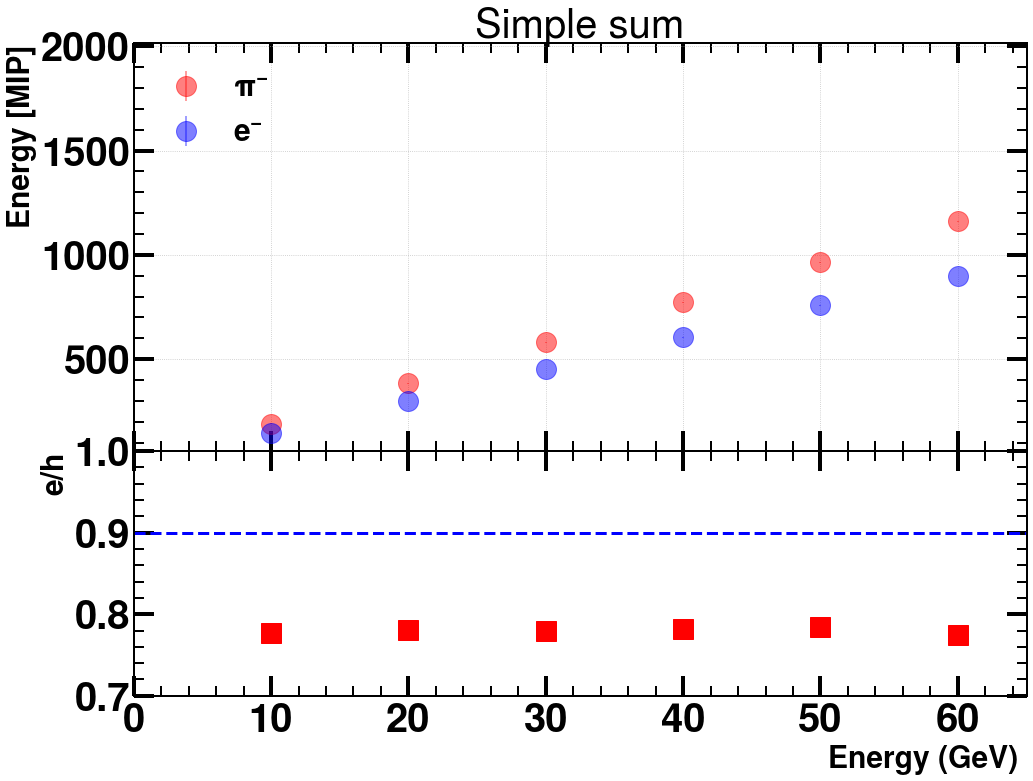

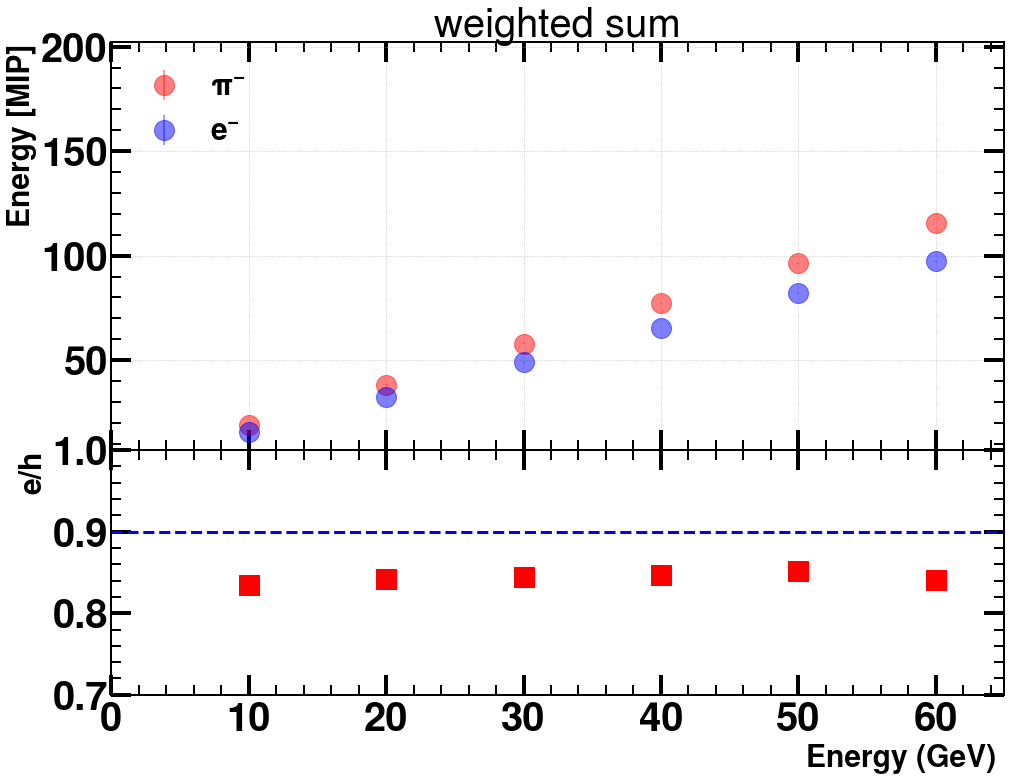

In [56]:
def e_hratio(thickness_description,energies,pi_mean,pi_mean_error,e_mean, e_mean_error):
    
    
    MIP_insert=0.6
    pi_means=np.divide(pi_mean,MIP_insert)
    e_means=np.divide(e_mean,MIP_insert)
    pi_means_error=np.divide(pi_mean_error,MIP_insert)
    e_means_error=np.divide(e_mean_error,MIP_insert)

    ratio_hole=np.divide(e_means,pi_means)
    error_A=(pi_means_error/pi_means)**2 + (e_means_error/e_means)**2
    ratio_hole_error=np.sqrt(error_A)*ratio_hole
    
    fig,(ax,ax1) = plt.subplots(2,1,figsize=(16, 12),gridspec_kw={'height_ratios': [2.5, 1.5]},sharex=True)

    ax.errorbar(energies, pi_means, pi_means_error ,color="red",alpha=0.5,marker='o',linestyle='None',\
                markersize=20,label='$\pi^{-}$')
    
    ax.errorbar(energies,e_means, e_means_error,color="blue",alpha=0.5,marker='o',linestyle='None',\
                markersize=20,label='$e^{-}$')
    ax.set_ylabel('Energy [MIP]')
    #ax.set_xlabel('Energy (GeV) ')
   
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #ax.set_ylim(0,3500)
    ax.set_xlim(0,90)
    #ax.set_title("Fe-AHCAL ($\pi^-$)")

    ax.xaxis.set_major_locator(MultipleLocator(10))
    #ax.yaxis.set_major_locator(MultipleLocator(2))   
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_title(thickness_description)


    ax1.plot(energies,ratio_hole,ratio_hole_error,marker='s',markersize='20',color='r',linestyle='None')
    ax1.set_ylim(0.7,1.0)
    ax1.set_xlim(0,65)
    ax1.yaxis.set_major_locator(MultipleLocator(0.1))   
    ax1.set_xlabel('Energy (GeV) ')
    ax1.set_ylabel('e/h')
    ax1.axhline(0.90,color='blue',linewidth=3, linestyle='dashed')


    plt.subplots_adjust(wspace=0, hspace=0)
    #plt.tight_layout()
    ax.legend(loc='upper left')

    
    
    


e_hratio('Simple sum',energies_pi,pi_means_E_Sum,pi_means_error_E_Sum, e_means_E_Sum,e_means_error_E_Sum) 
e_hratio('weighted sum',energies_pi,pi_means_E_Sum_wt,pi_means_error_E_Sum_wt, e_means_E_Sum_wt,\
         e_means_error_E_Sum_wt)   
#e_hratio('Absorber=16 mm Sc=3 mm',energies_pi,pi_means_FeW,pi_means_error_FeW, e_means_FeW,e_means_error_FeW)   
#e_hratio('Absorber=15.5 mm Sc=3.5 mm',energies_pi,pi_means_Sc35_Ab156,pi_means_error_Sc35_Ab156, e_means_Sc35_Ab156,e_means_error_Sc35_Ab156)

deg_Athena_20W_34Fe


[0.89017995 0.90189101 0.91115709 0.90884271 0.91157745 0.90284664
 0.84558435 0.        ]
[0.8925018  0.89949901 0.90070969 0.90187373 0.907795   0.89335758
 0.835432   0.78358626]


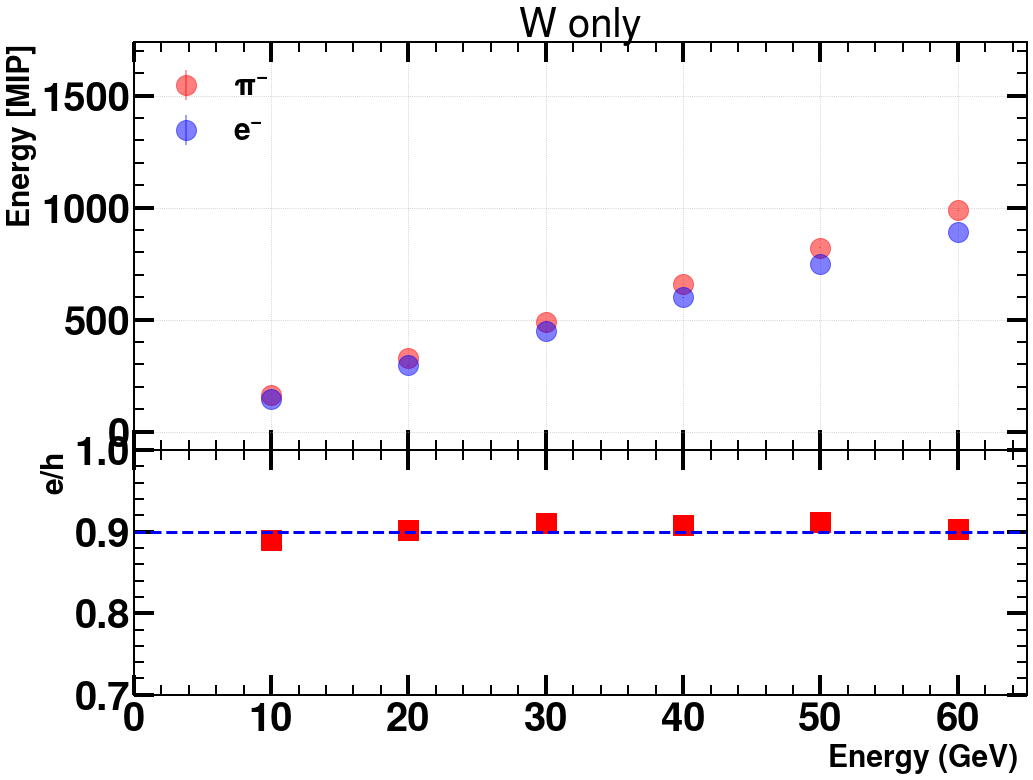

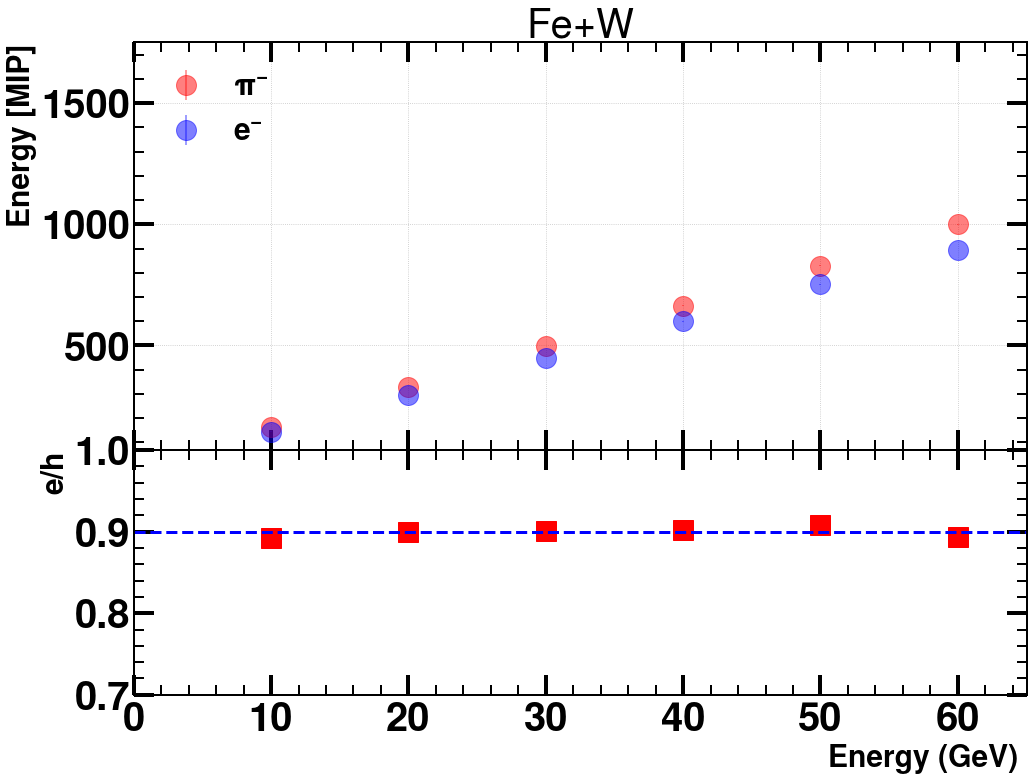

In [57]:
e_hratio('W only',energies_pi,pi_means_W,pi_means_error_W, e_means_W,e_means_error_W) 
e_hratio('Fe+W',energies_pi,pi_means_FeW,pi_means_error_FeW, e_means_FeW,\
         e_means_error_FeW) 

## Plot the resolution with different absorber and radiator thickness for insert

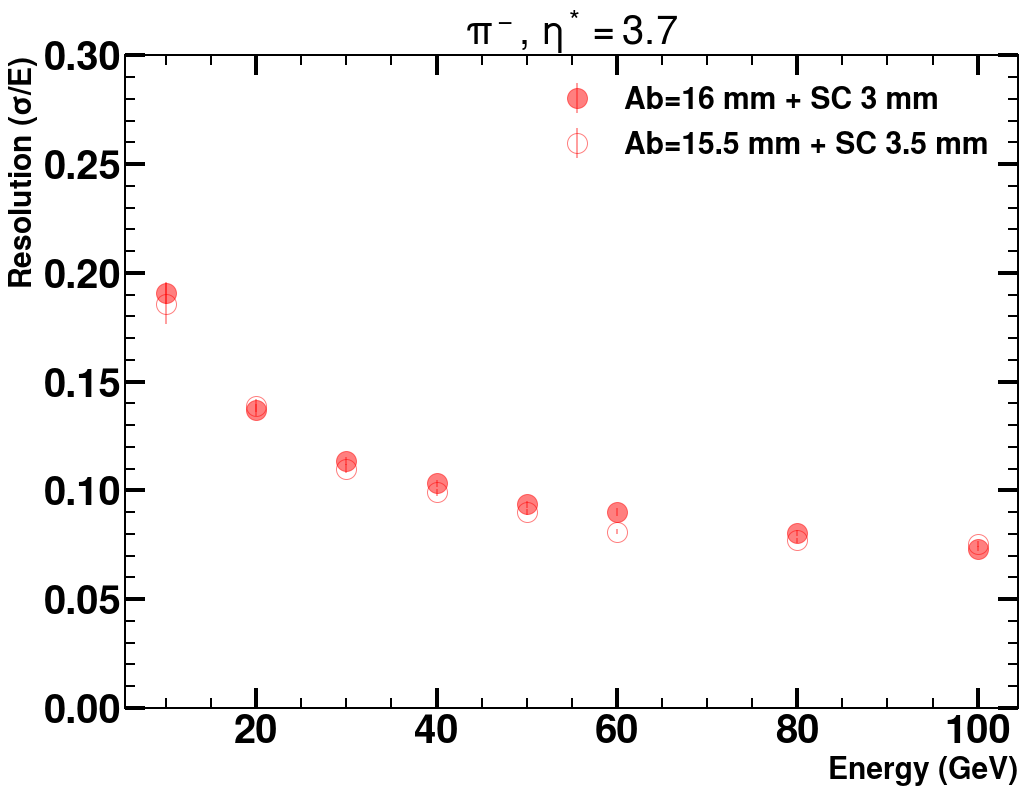

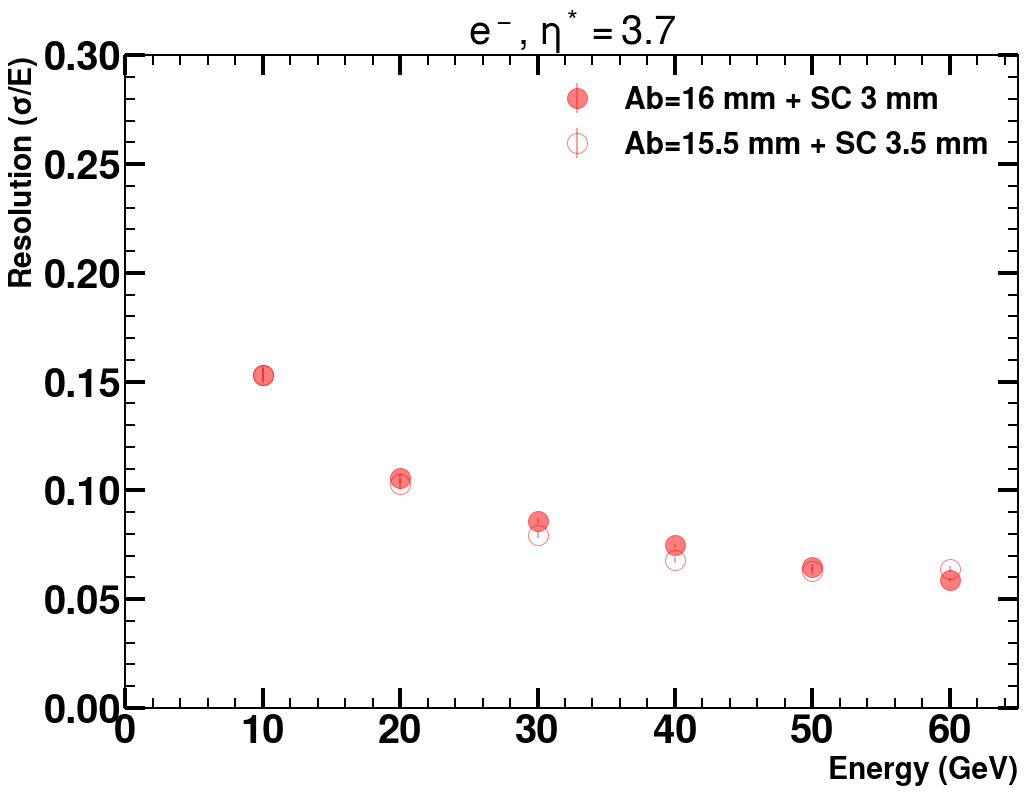

In [40]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    
ax.errorbar(energies_pi,pi_resolutions_FeW, pi_resolutions_errors_FeW ,alpha=0.5,color="red",marker='o',markersize=20,\
           label='Ab=16 mm + SC 3 mm', linestyle='None')

ax.errorbar(energies_pi,pi_resolutions_Sc35_Ab156,pi_resolutions_errors_Sc35_Ab156 ,color="red",alpha=0.5,marker='o',\
            mfc='none',markersize=20,label='Ab=15.5 mm + SC 3.5 mm',linestyle='None' )

    

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Resolution ($\sigma$/E)')
ax.set_title('$\pi^-$, $\eta^*=3.7$')
ax.set_ylim(0,0.30)

plt.legend()
plt.show() 




fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    
ax.errorbar(energies_pi,e_resolutions_FeW, e_resolutions_errors_FeW ,alpha=0.5,color="red",marker='o',markersize=20,\
           label='Ab=16 mm + SC 3 mm', linestyle='None')

ax.errorbar(energies_pi,e_resolutions_Sc35_Ab156,e_resolutions_errors_Sc35_Ab156 ,color="red",alpha=0.5,marker='o',\
            mfc='none',markersize=20,label='Ab=15.5 mm + SC 3.5 mm',linestyle='None' )

    

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Resolution ($\sigma$/E)')
ax.set_title('$e^-$, $\eta^*=3.7$')
ax.set_ylim(0,0.30)
ax.set_xlim(0,65)

plt.legend()
plt.show() 


## Plot the leakage with different radiator and scintillator thickness

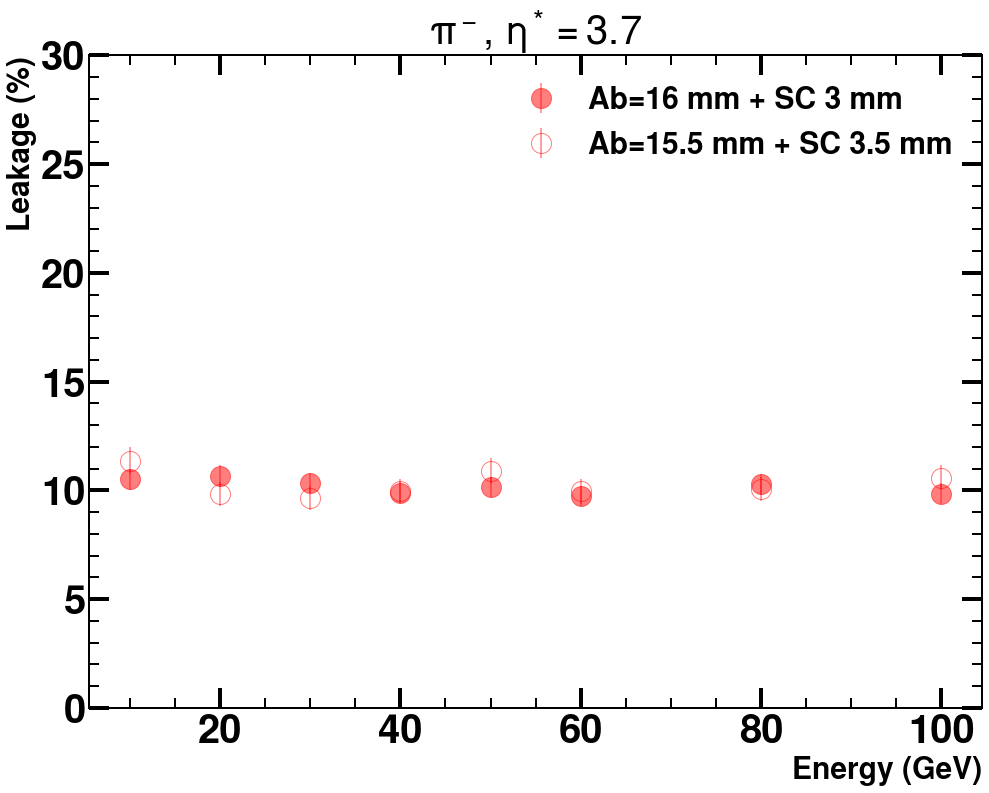

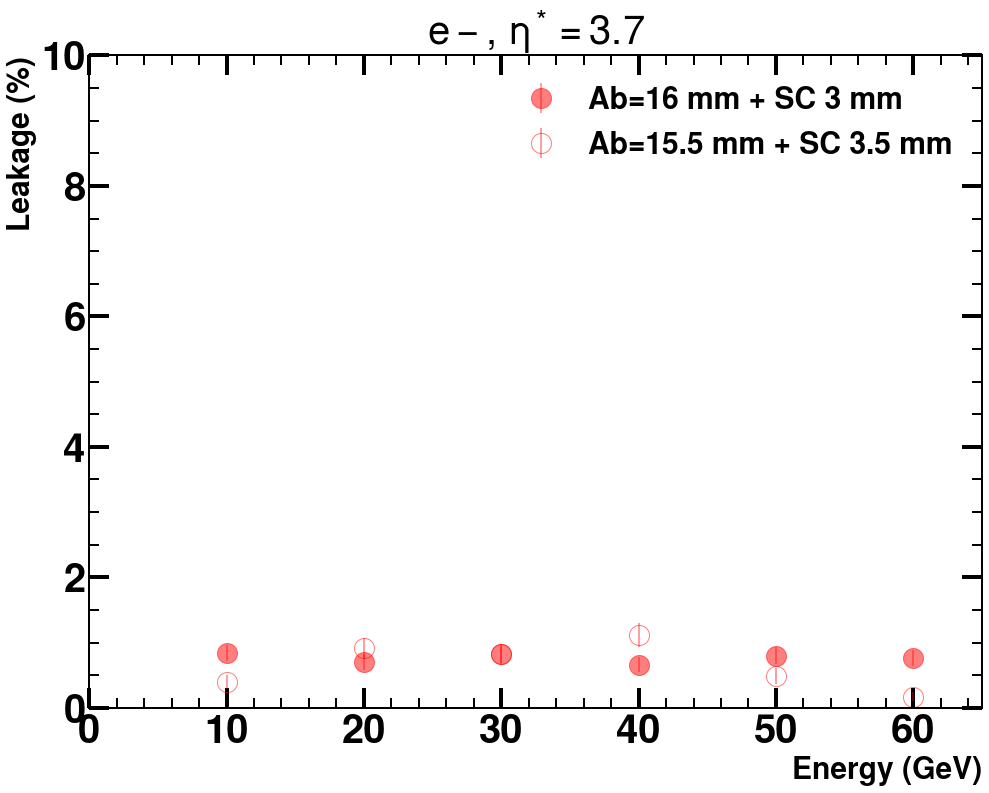

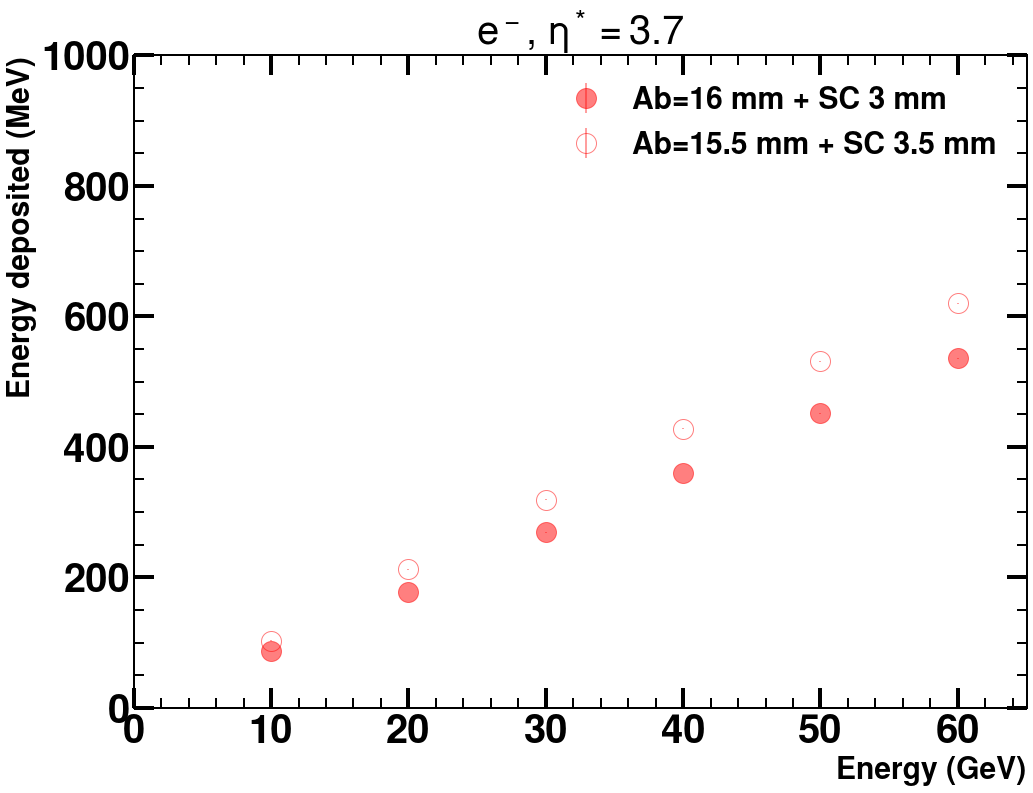

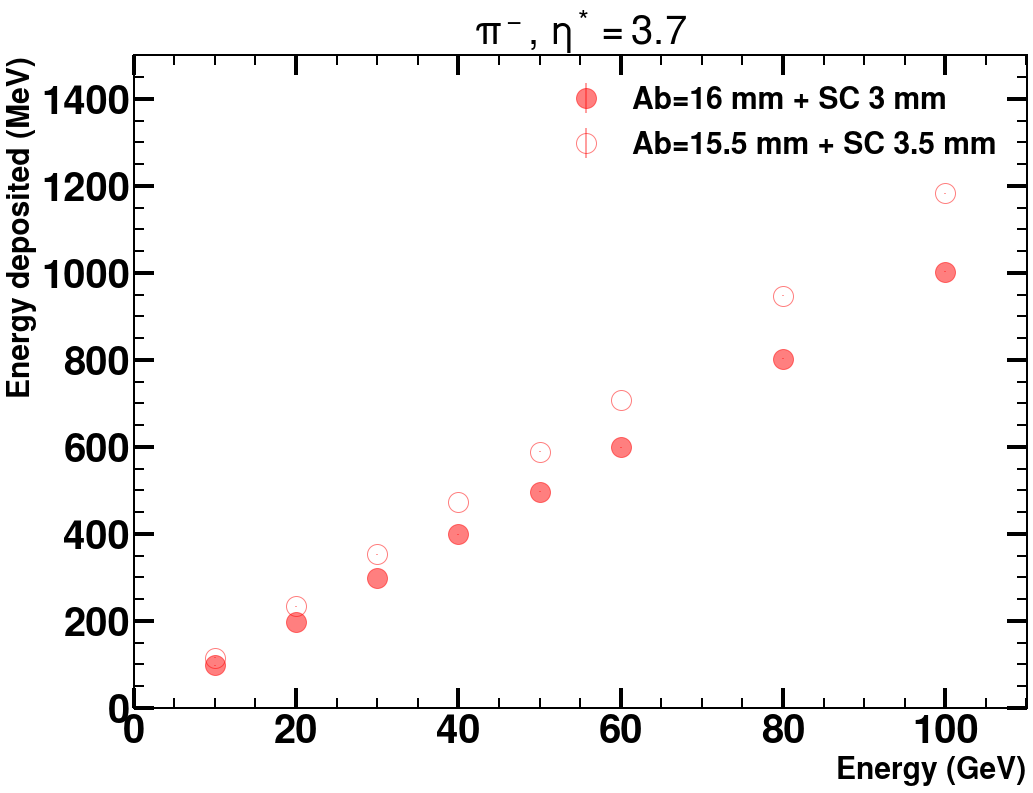

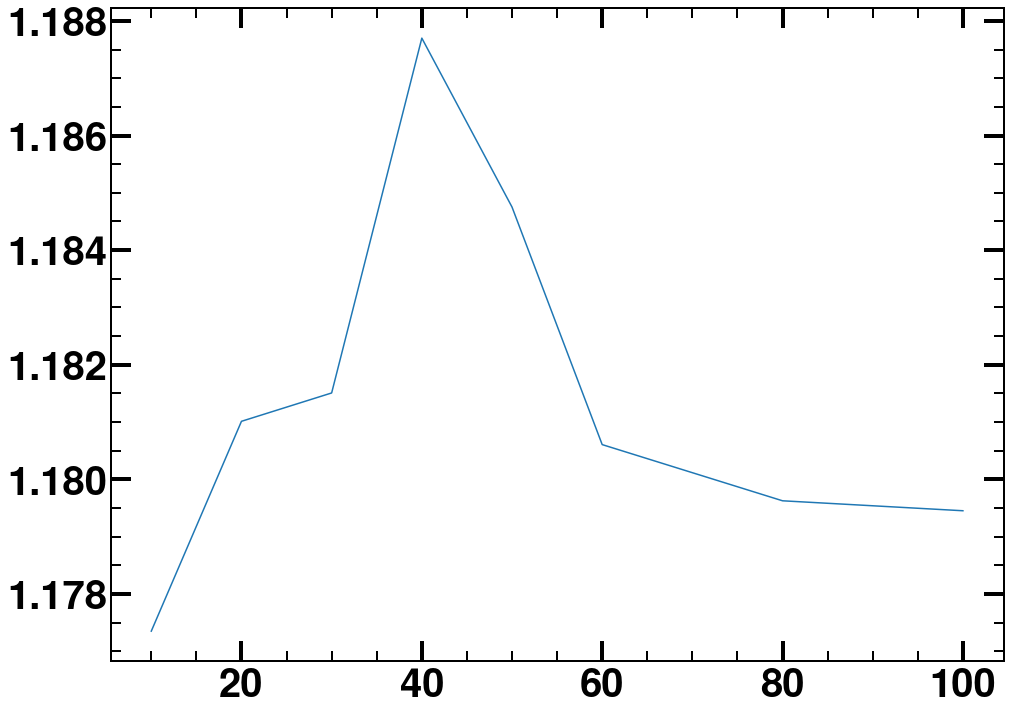

In [56]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    
ax.errorbar(energies_pi,pi_leaks_per_FeW, pi_leaks_per_error_FeW ,alpha=0.5,color="red",marker='o',markersize=20,\
           label='Ab=16 mm + SC 3 mm', linestyle='None')

ax.errorbar(energies_pi,pi_leaks_per_Sc35_Ab156,pi_leaks_per_error_Sc35_Ab156 ,color="red",alpha=0.5,marker='o',\
            mfc='none',markersize=20,label='Ab=15.5 mm + SC 3.5 mm',linestyle='None' )

    

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Leakage (%)')
ax.set_title('$\pi^-$, $\eta^*=3.7$')
ax.set_ylim(0,30)

plt.legend()
plt.show() 



fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    
ax.errorbar(energies_pi,e_leaks_per_FeW, e_leaks_per_error_FeW ,alpha=0.5,color="red",marker='o',markersize=20,\
           label='Ab=16 mm + SC 3 mm', linestyle='None')

ax.errorbar(energies_pi,e_leaks_per_Sc35_Ab156,e_leaks_per_error_Sc35_Ab156 ,color="red",alpha=0.5,marker='o',\
            mfc='none',markersize=20,label='Ab=15.5 mm + SC 3.5 mm',linestyle='None' )

    

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Leakage (%)')
ax.set_title('$e-$, $\eta^*=3.7$')
ax.set_ylim(0,10)
ax.set_xlim(0,65)

plt.legend()
plt.show() 

fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    
ax.errorbar(energies_pi,e_means_FeW, e_means_error_FeW ,alpha=0.5,color="red",marker='o',markersize=20,\
           label='Ab=16 mm + SC 3 mm', linestyle='None')

ax.errorbar(energies_pi,e_means_Sc35_Ab156,e_means_error_Sc35_Ab156 ,color="red",alpha=0.5,marker='o',\
            mfc='none',markersize=20,label='Ab=15.5 mm + SC 3.5 mm',linestyle='None' )

    

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Energy deposited (MeV)')
ax.set_title('$e^-$, $\eta^*=3.7$')
ax.set_ylim(0,1000)
ax.set_xlim(0,65)

plt.legend()
plt.show() 


fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    
ax.errorbar(energies_pi,pi_means_FeW, pi_means_error_FeW ,alpha=0.5,color="red",marker='o',markersize=20,\
           label='Ab=16 mm + SC 3 mm', linestyle='None')

ax.errorbar(energies_pi,pi_means_Sc35_Ab156,pi_means_error_Sc35_Ab156 ,color="red",alpha=0.5,marker='o',\
            mfc='none',markersize=20,label='Ab=15.5 mm + SC 3.5 mm',linestyle='None' )

    

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Energy deposited (MeV)')
ax.set_title('$\pi^-$, $\eta^*=3.7$')
ax.set_ylim(0,1500)
ax.set_xlim(0,110)

plt.legend()
plt.show() 

ratio=np.divide(pi_means_Sc35_Ab156,pi_means_FeW)
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.plot(energies_pi,ratio)
plt.show()

## HCal Insert (Fe-W) data comparing with CALICE test beam data and YR requirement

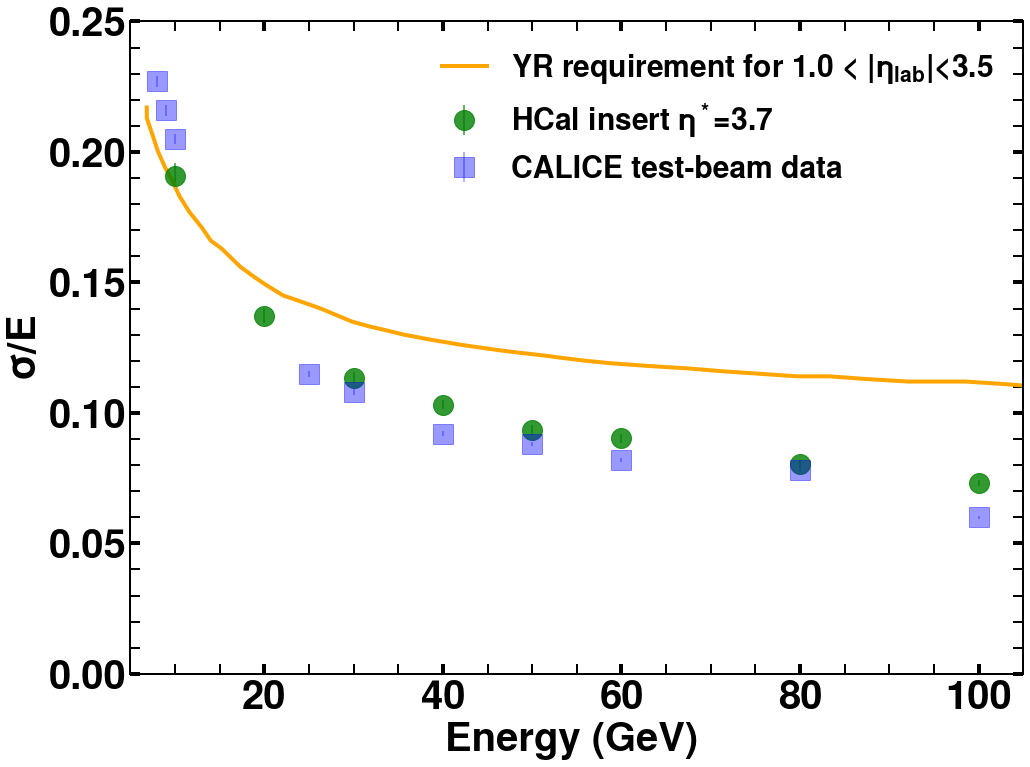

In [23]:
import pandas as pd
##cal_pi_res= 3.01,4.01,  4.98, 6.01,7.01,]
##energy_cal_pi=0.362,   0.325, 0.288,0.263,0.245,]
energy_cal_pi=[  8.02,   9.01,  9.99,  25,  30,     40,50,60,   80,100]
cal_pi_res=[   0.227,  0.216, 0.205, 0.115,0.108, 0.092,0.088,0.082,0.078,0.06]
cal_pi_res_err=np.multiply(cal_pi_res,0.01)

path_file = '/Users/bishnukarki/EIC/EIC_Analysis/YR_report_pion.csv'
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
df = pd.read_csv(f'{path_file}',header=None, names=['energy', 'resolution'], index_col=False)
df=df.sort_values(by=['energy'],ascending =True)

ax.errorbar(energies_pi,pi_resolutions_FeW, pi_resolutions_errors_FeW,color="green",alpha=0.8,\
            linestyle='None',marker='o',markersize=30,label='HCal insert $\eta^*$=3.7')

ax.errorbar(energy_cal_pi,cal_pi_res, cal_pi_res_err,color="blue",marker='s',alpha=0.4,linestyle='None',\
            markersize=25,label='CALICE test-beam data')
df.plot(x='energy',y='resolution',linestyle='solid',linewidth=4,color='orange',ax=ax,\
        label='YR requirement for 1.0 < $|\eta_{lab}|$<3.5')
ax.set_ylabel('$\sigma$/E', loc='center')
ax.set_xlabel('Energy (GeV) ', loc='center')
#ax.set_title("HCAL insert")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,0.25)
ax.set_xlim(5,105)
plt.legend()
plt.show()

## Plot the leakage HCal Insert  with W only + Mixture of W/Fe
## plots all four at once (HCALI-W_electron, HCALI-WFe_electron, HCALI-W_pi HCALI-WFe_pion

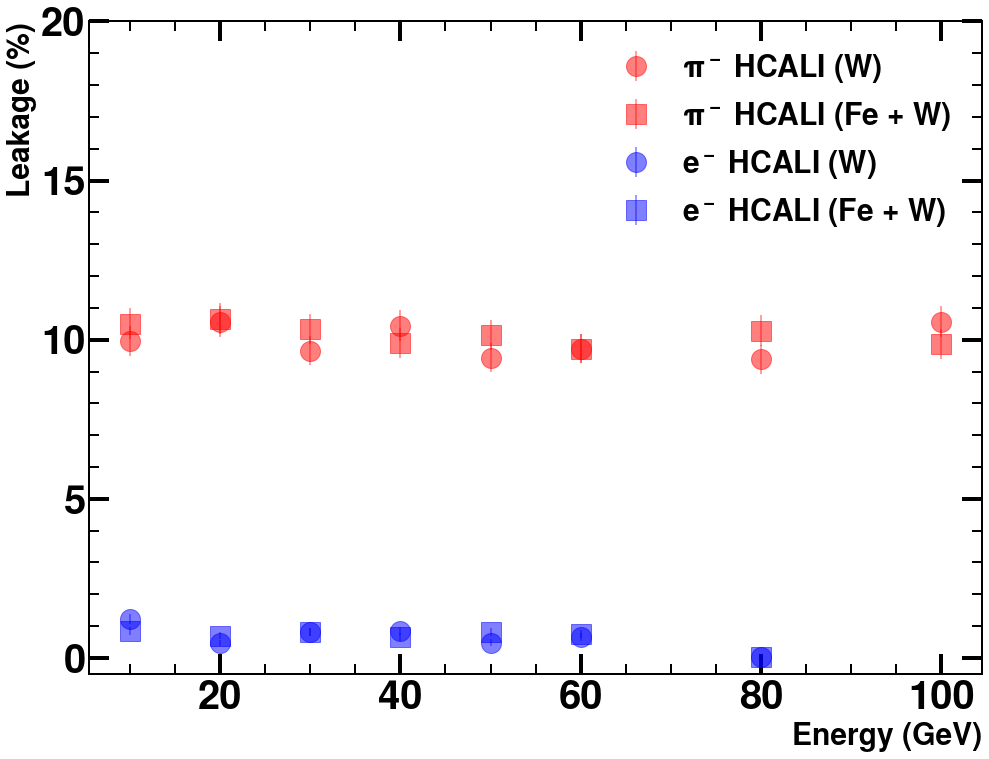

In [26]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_leaks_per_W, pi_leaks_per_error_W ,alpha=0.5,color="red",marker='o',markersize=20,\
            label='$\pi^-$ HCALI (W)',linestyle='None')

ax.errorbar(energies_pi,pi_leaks_per_FeW, pi_leaks_per_error_FeW,color="red",alpha=0.5,marker='s',markersize=20,\
            label='$\pi^-$ HCALI (Fe + W)',linestyle='None' )


ax.errorbar(energies_el,e_leaks_per_W, e_leaks_per_error_W ,color="blue",alpha=0.5,marker='o',markersize=20,\
            label='$e^-$ HCALI (W)',linestyle='None')
            
           
ax.errorbar(energies_el,e_leaks_per_FeW, e_leaks_per_error_FeW,color="blue",alpha=0.5,marker='s',markersize=20,\
            label='$e^-$ HCALI (Fe + W)',linestyle='None' )



ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Leakage (%)")
ax.set_ylim(-0.5,20)

plt.legend()
plt.show()

## Study of resolution with and without mixtures

## comparese with W only HCALI + W/Fe CALI

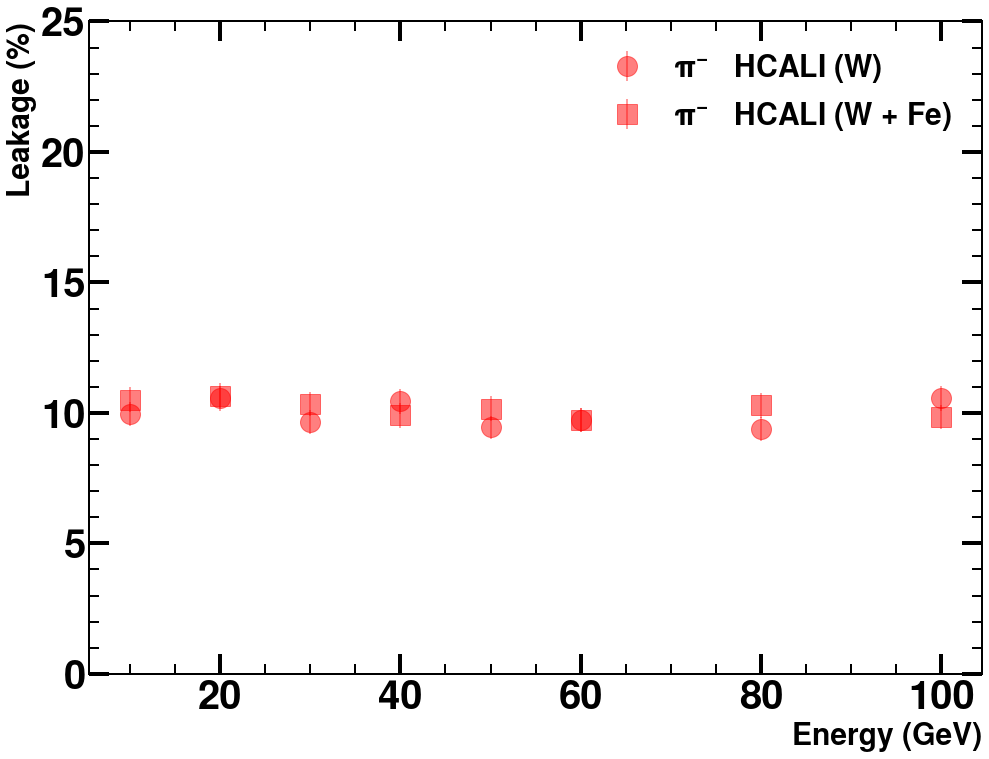

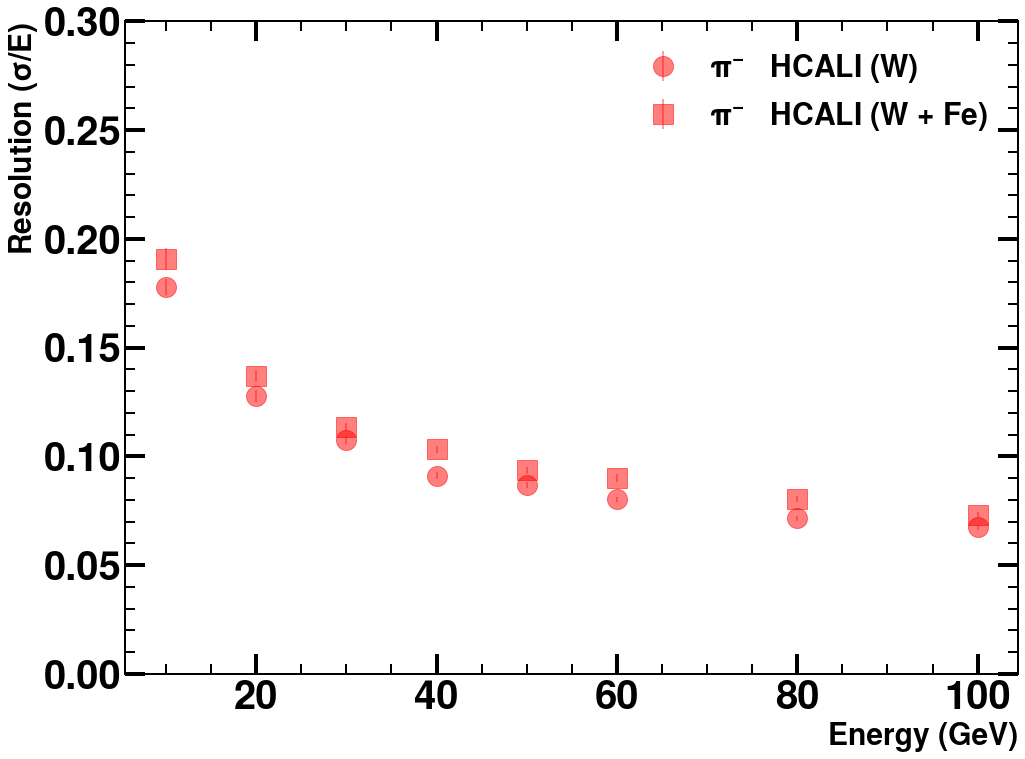

In [10]:

def get_comp_wFe_W_CALI(particle, energies, var_W, var_error_W, var_FeW, var_error_FeW):
    
    if var_W==(pi_resolutions_W) or (var_W== e_resolutions_W):
        Ytitle='Resolution ($\sigma$/E)'
        Ylim=0.30
        
    elif (var_W==pi_leaks_per_W) or (var_W==e_leaks_per_W):
        Ytitle='Leakage (%)'
        Ylim=25
        
    elif (var_W==pi_means_W) or (var_W==e_means_W) :
        Ytitle='Mean Energy (MeV)'
        Ylim=3000
    
    elif (var_W==(pi_resolutions_E_Sum_wt) or (var_W== e_resolutions_E_Sum_wt)) :
        Ytitle='Resolution ($\sigma$/E)'
        Ylim=0.30
    
    else:
        print("PLEASE CHECK THE VARIABLE INPUT")
            
    
    greek_particle=plots.get_greek_particle(particles)
    
    label_W  =greek_particle +'   '+ 'HCALI (W)'
    label_FeW=greek_particle +'   '+ 'HCALI (W + Fe)'
    
    fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    
    ax.errorbar(energies,var_W, var_error_W ,alpha=0.5,color="red",marker='o',markersize=20,\
            label=label_W, linestyle='None')

    ax.errorbar(energies,var_FeW, var_error_FeW,color="red",alpha=0.5,marker='s',markersize=20,\
            label=label_FeW,linestyle='None' )

    

    ax.set_xlabel("Energy (GeV)")
    ax.set_ylabel(Ytitle)
    ax.set_ylim(0,Ylim)

    plt.legend()
    plt.show() 
    
energies_pi=[10,20,30,40,50,60,80, 100] 
particles='pi-'


get_comp_wFe_W_CALI(particles,energies_pi,pi_leaks_per_W, pi_leaks_per_error_W, pi_leaks_per_FeW, pi_leaks_per_error_FeW)   

get_comp_wFe_W_CALI(particles,energies_pi,pi_resolutions_W,pi_resolutions_errors_W ,\
                    pi_resolutions_FeW,pi_resolutions_errors_FeW )  


 




## This program plots the resolution for HCal + HCal Insert (w/wo weighted sum)

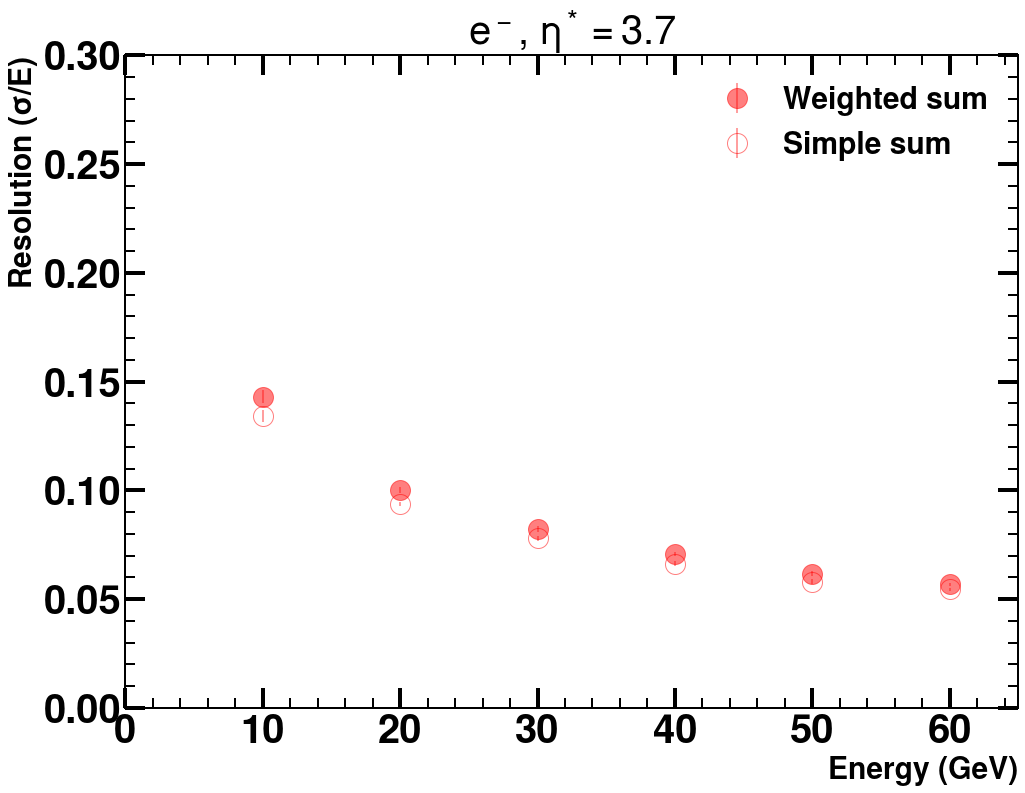

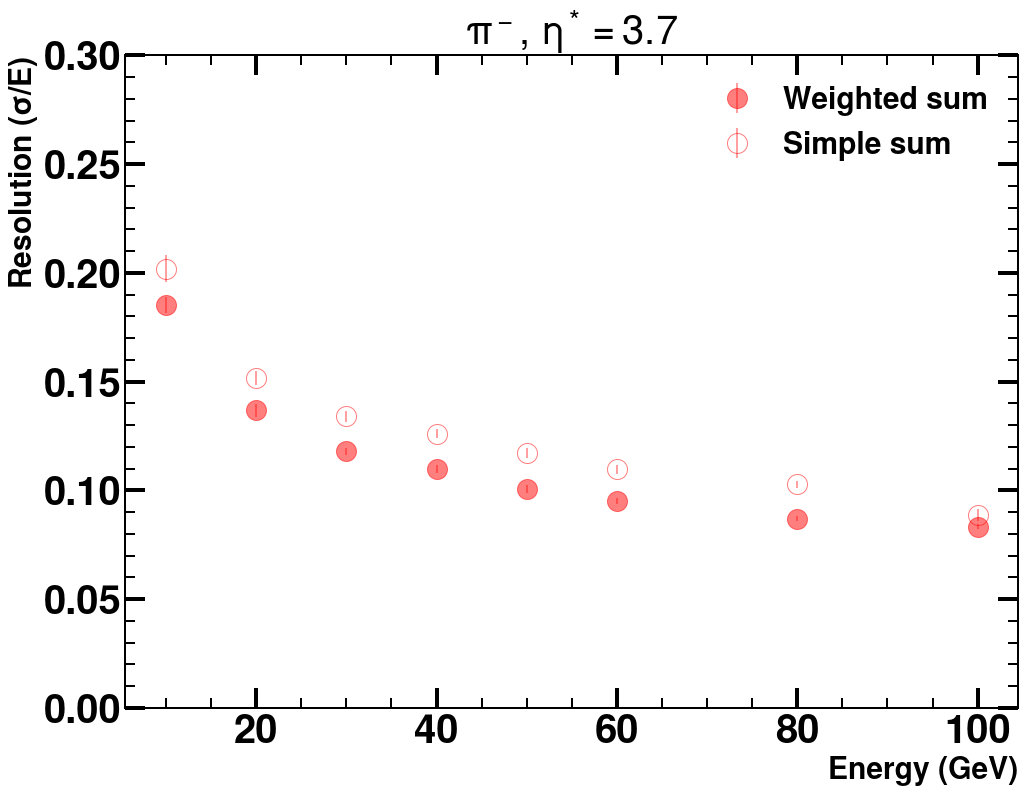

In [34]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    
ax.errorbar(energies_pi,e_resolutions_E_Sum_wt, e_resolutions_errors_E_Sum_wt ,alpha=0.5,color="red",marker='o',markersize=20,\
           label='Weighted sum', linestyle='None')

ax.errorbar(energies_pi,e_resolutions_E_Sum,e_resolutions_errors_E_Sum ,color="red",alpha=0.5,marker='o',\
            mfc='none',markersize=20,label='Simple sum',linestyle='None' )

    

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Resolution ($\sigma$/E)')
ax.set_ylim(0,0.30)
ax.set_xlim(0,65)
ax.set_title('$e^-$, $\eta^*=3.7$')
plt.legend()
plt.show() 



fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    
ax.errorbar(energies_pi,pi_resolutions_E_Sum_wt, pi_resolutions_errors_E_Sum_wt ,alpha=0.5,color="red",marker='o',markersize=20,\
           label='Weighted sum', linestyle='None')

ax.errorbar(energies_pi,pi_resolutions_E_Sum,pi_resolutions_errors_E_Sum ,color="red",alpha=0.5,marker='o',\
            mfc='none',markersize=20,label='Simple sum',linestyle='None' )

    

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Resolution ($\sigma$/E)')
ax.set_title('$\pi^-$, $\eta^*=3.7$')
ax.set_ylim(0,0.30)

plt.legend()
plt.show() 



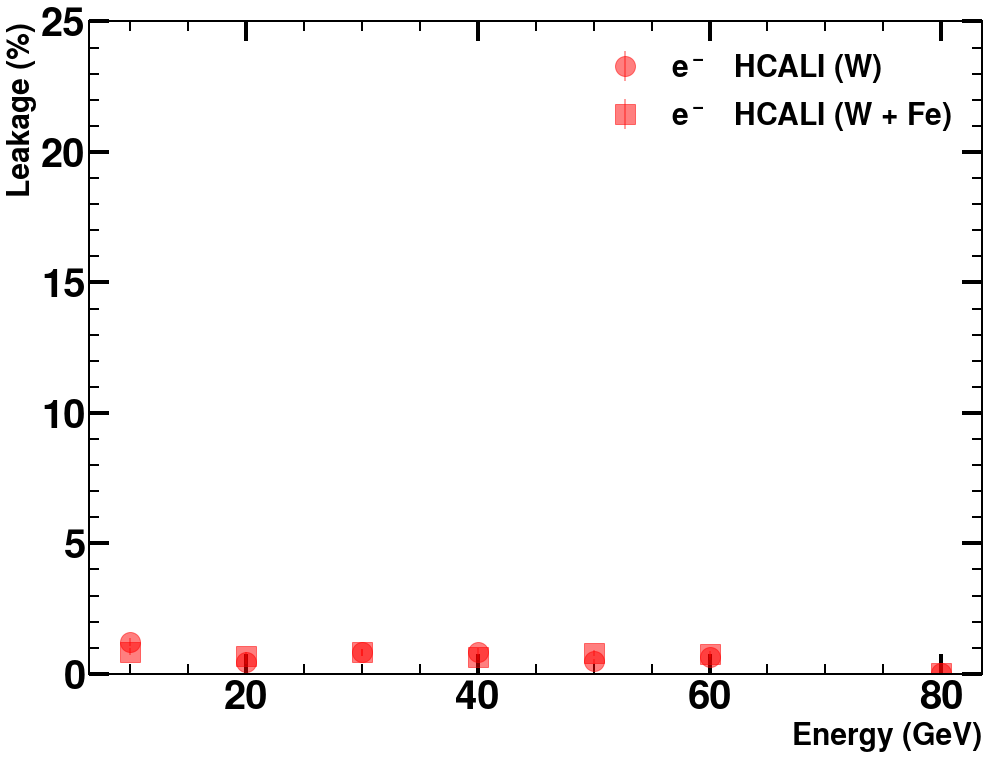

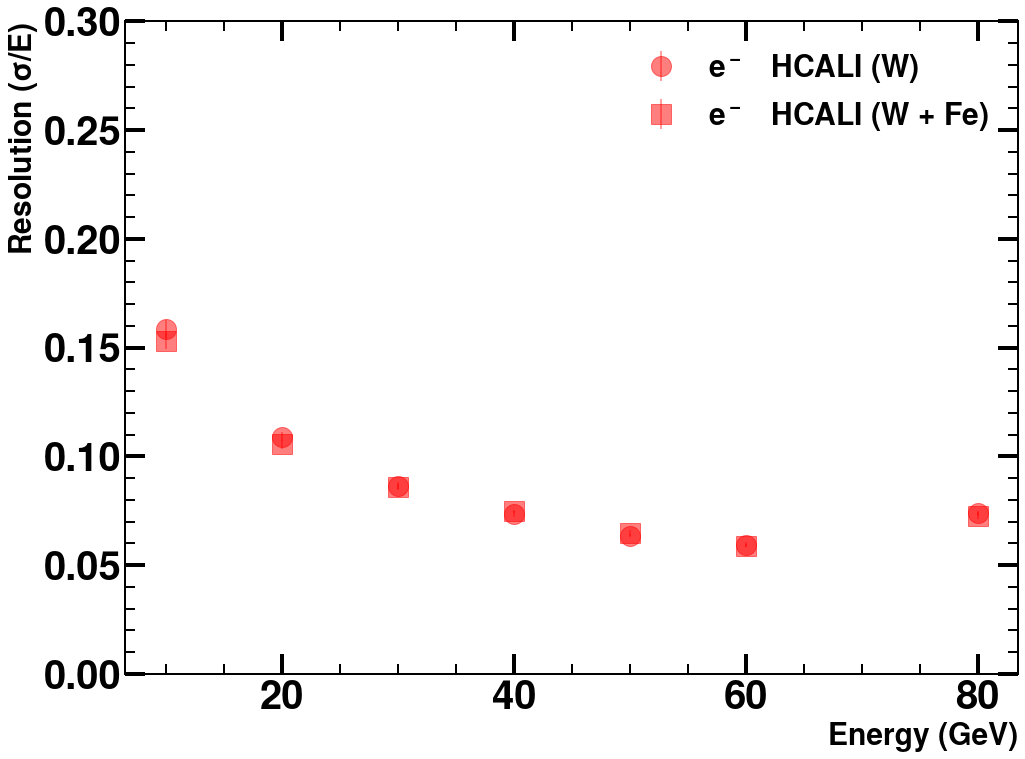

In [38]:
energies_el=[10,20,30,40,50,60,80] 
particles='e-'
get_comp_wFe_W_CALI(particles,energies_el,e_leaks_per_W, e_leaks_per_error_W, e_leaks_per_FeW, e_leaks_per_error_FeW)   

get_comp_wFe_W_CALI(particles,energies_el,e_resolutions_W,e_resolutions_errors_W ,\
                    e_resolutions_FeW,e_resolutions_errors_FeW )  

## Plot HCal and HCAl +HCALI (Fe-W) leakage with energy at n=3.7

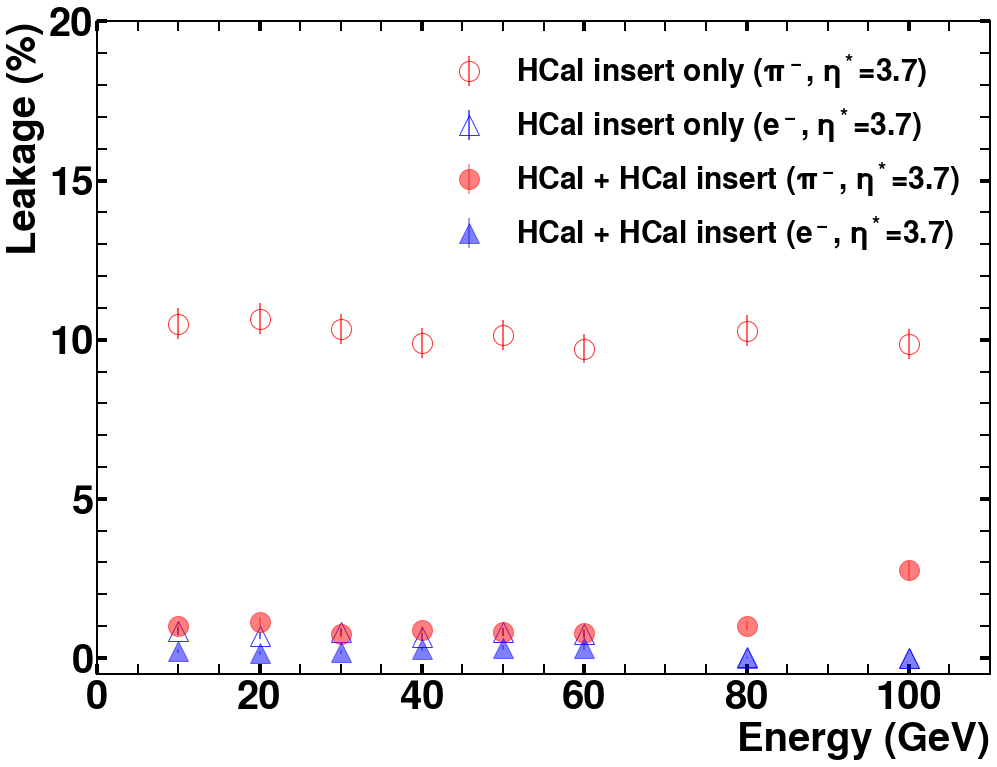

In [26]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_leaks_per_FeW, pi_leaks_per_error_FeW ,alpha=0.8,color="red",mfc='none',marker='o',markersize=20,\
            label='HCal insert only ($\pi^-$, $ \eta^*$=3.7) ',linestyle='None')

ax.errorbar(energies_pi,e_leaks_per_FeW, e_leaks_per_error_FeW,color="blue",alpha=0.8,marker='^',mfc='none',markersize=20,\
            label='HCal insert only ($e^-$, $ \eta^*$=3.7) ',linestyle='None' )

ax.errorbar(energies_pi,pi_leaks_per_E_Sum, pi_leaks_per_error_E_Sum,color="red",alpha=0.5,marker='o',markersize=20,\
            label='HCal + HCal insert ($\pi^-$, $ \eta^*$=3.7)',linestyle='None' )



ax.errorbar(energies_pi,e_leaks_per_E_Sum, e_leaks_per_error_E_Sum ,color="blue",alpha=0.5,marker='^',markersize=20,\
            label='HCal + HCal insert ($e^-$, $ \eta^*$=3.7) ',linestyle='None')



ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Leakage (%)")
ax.set_ylim(-0.5,20)
ax.set_xlim(0,110)

plt.legend()
plt.show()

## Study the leakage with rapidity 

HELLO JELLO 2000
I am wt


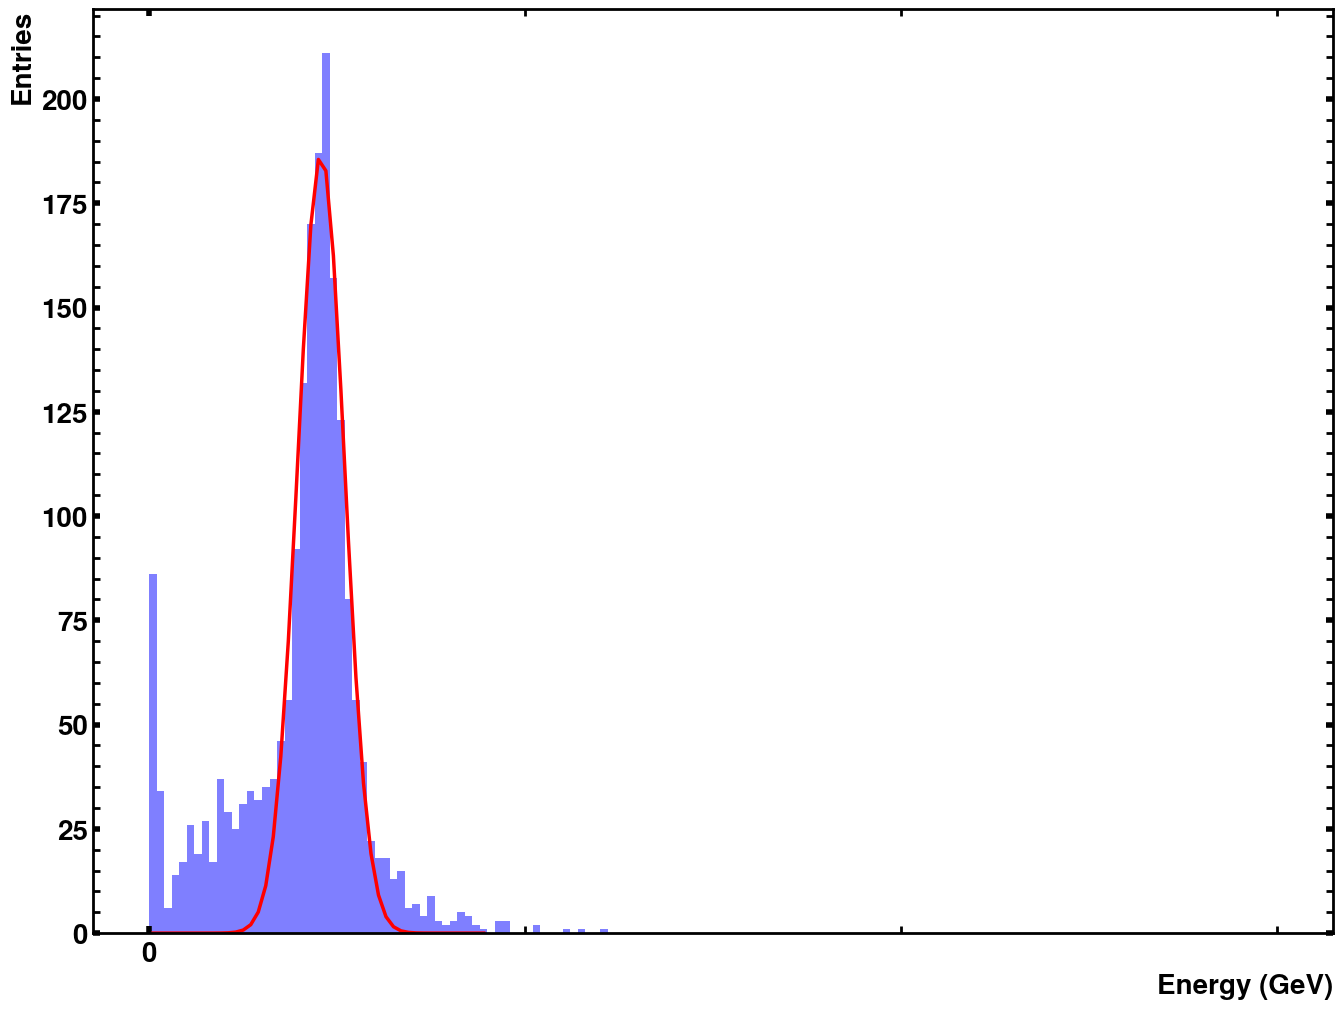

HELLO JELLO 2000
I am wt


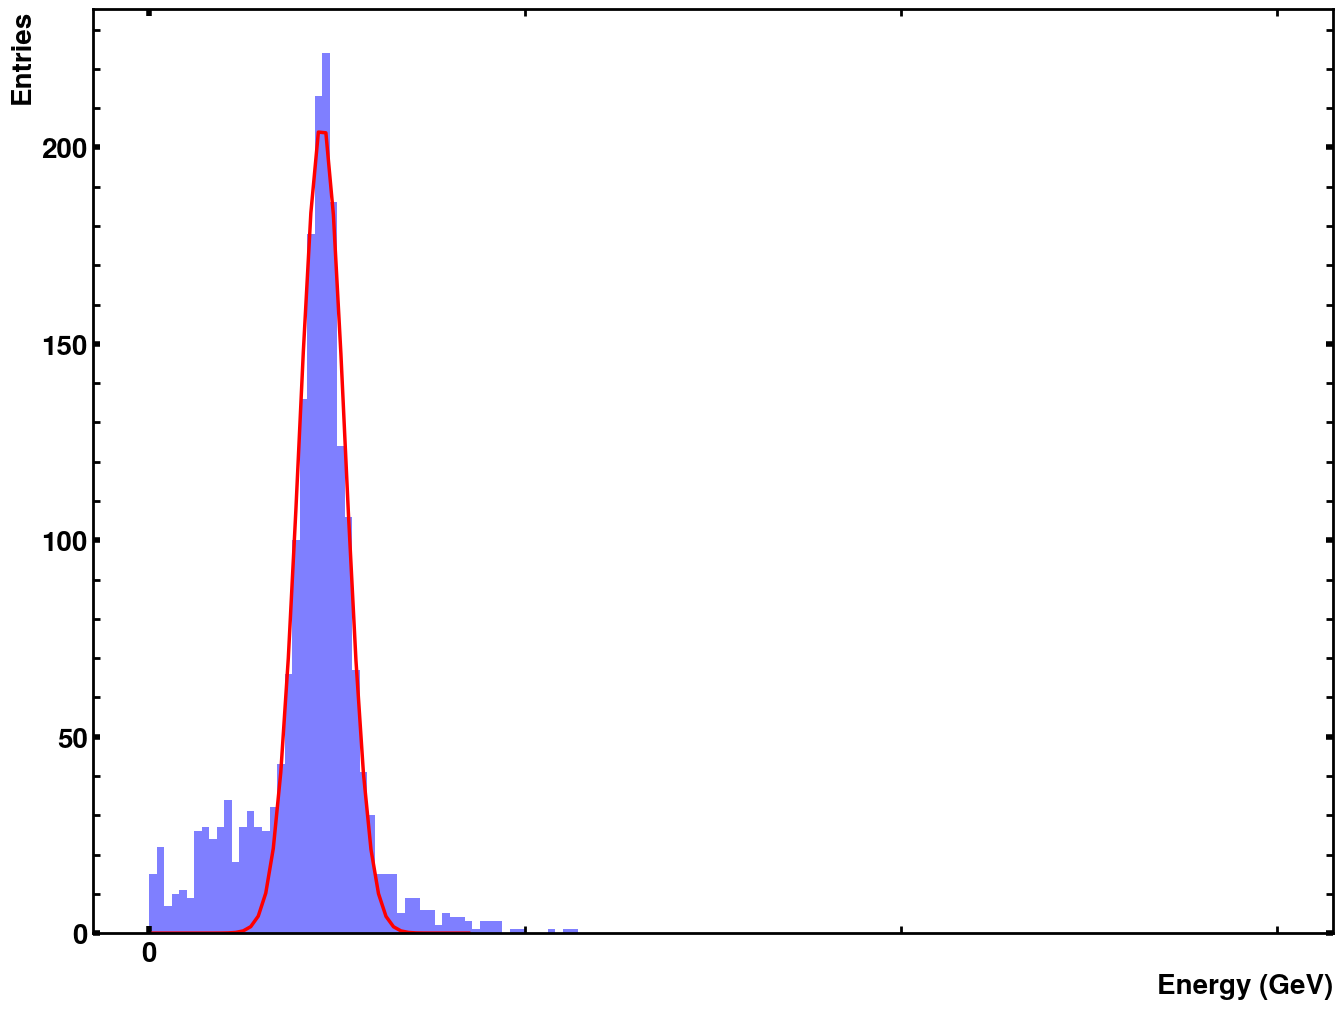

HELLO JELLO 2000
I am wt


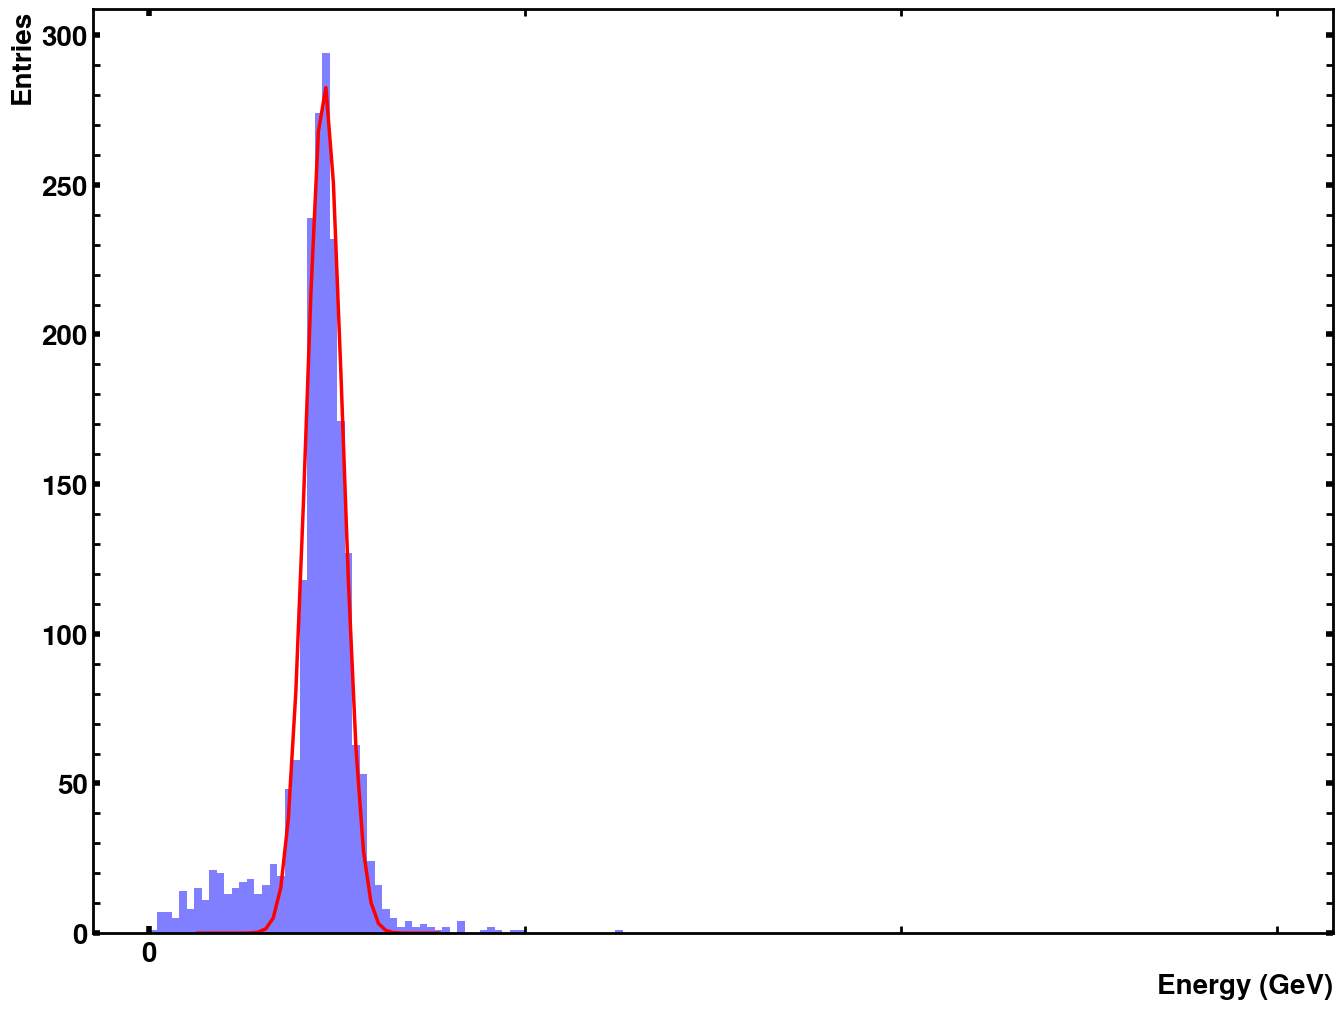

HELLO JELLO 2000
I am wt


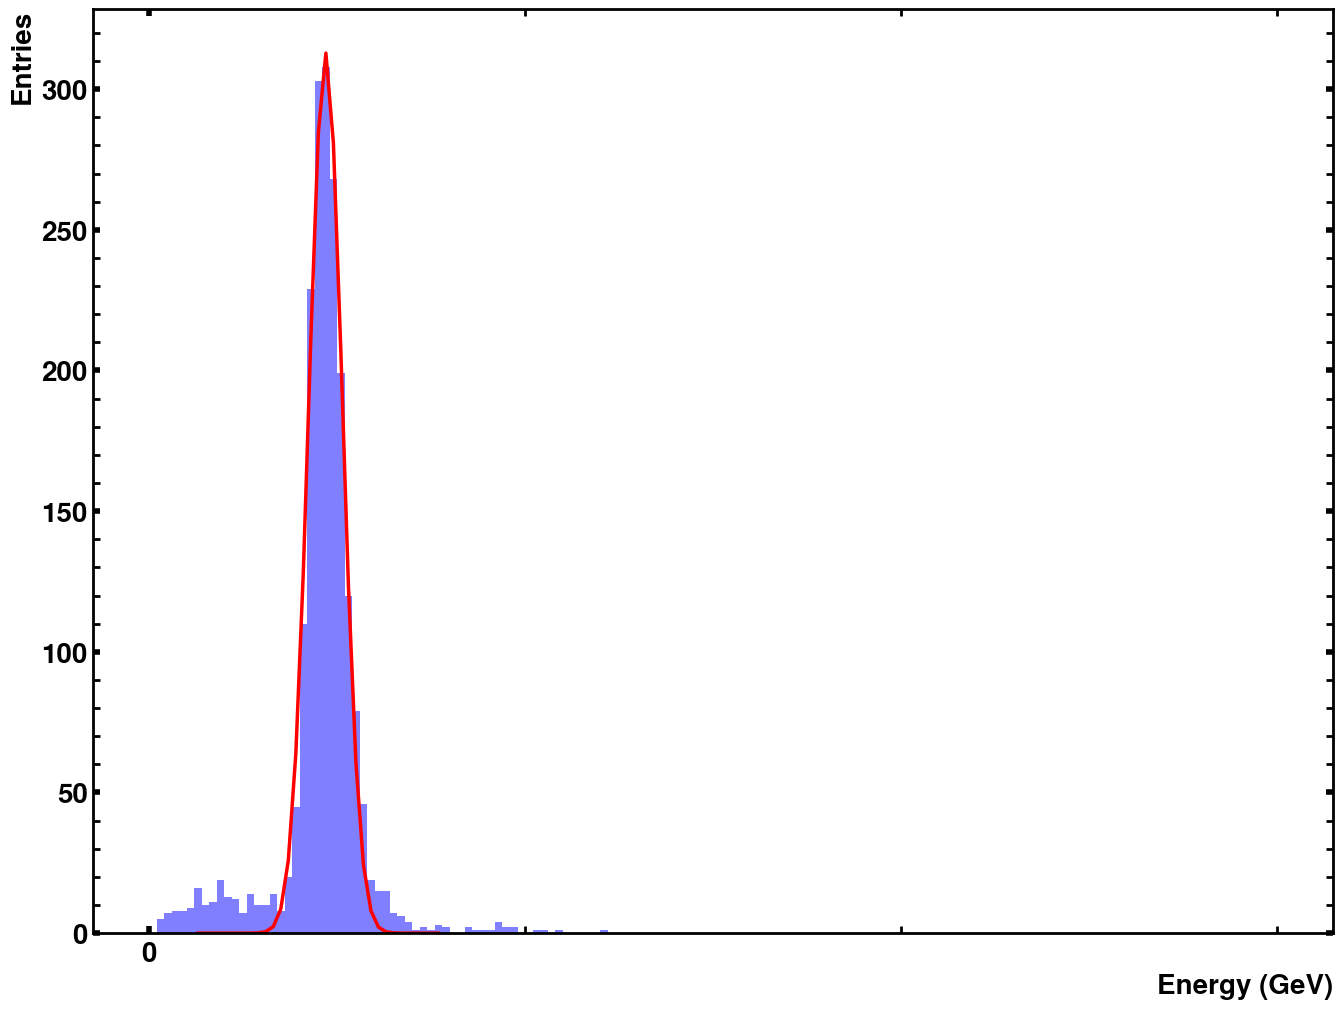

HELLO JELLO 2000
I am wt


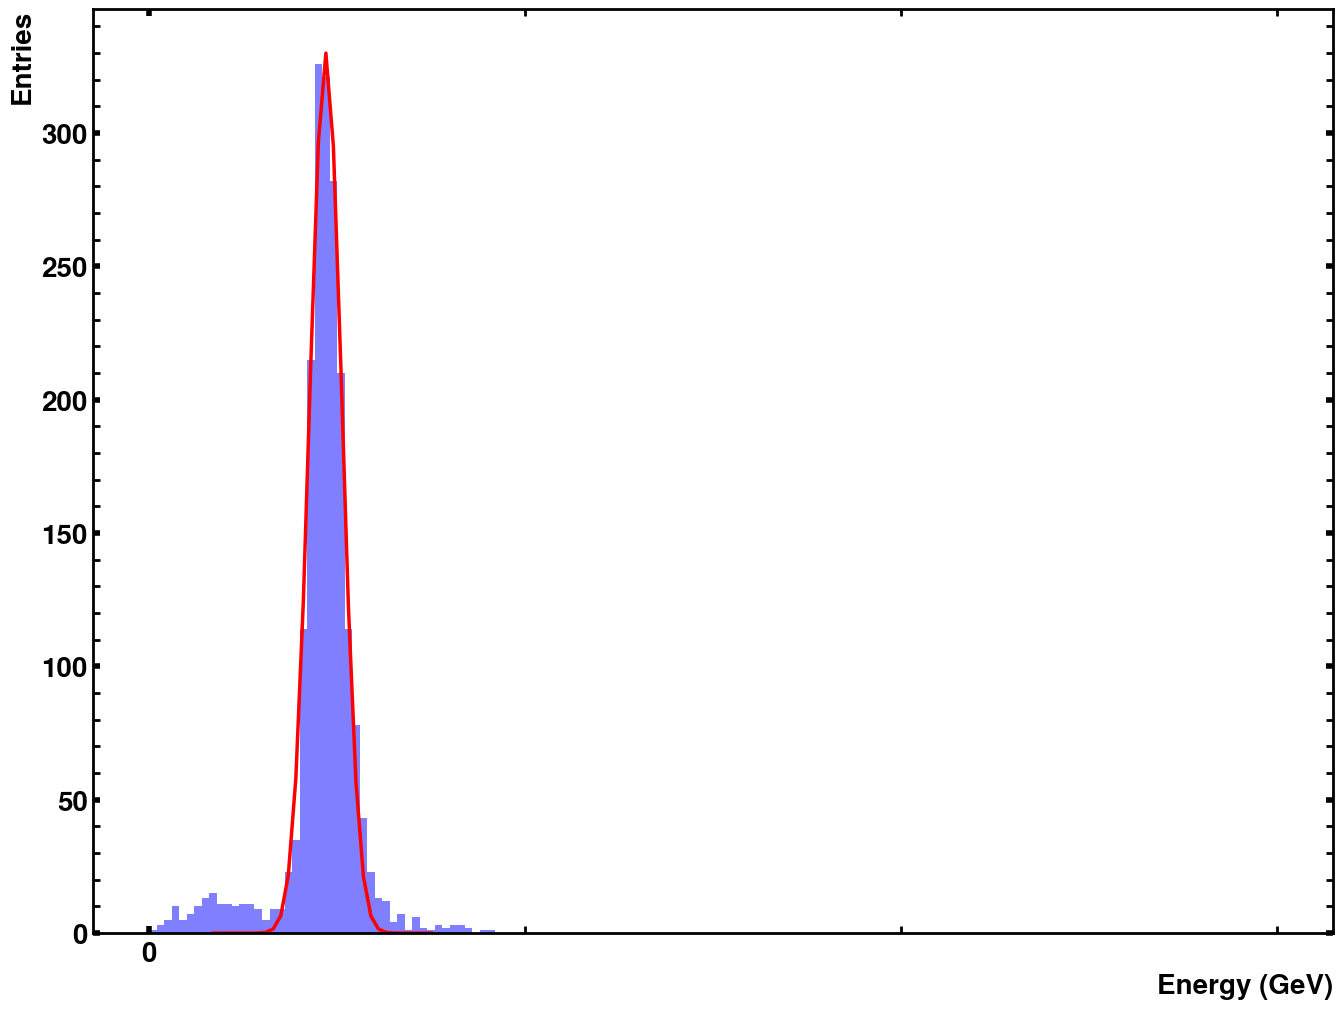

HELLO JELLO 2000
I am wt


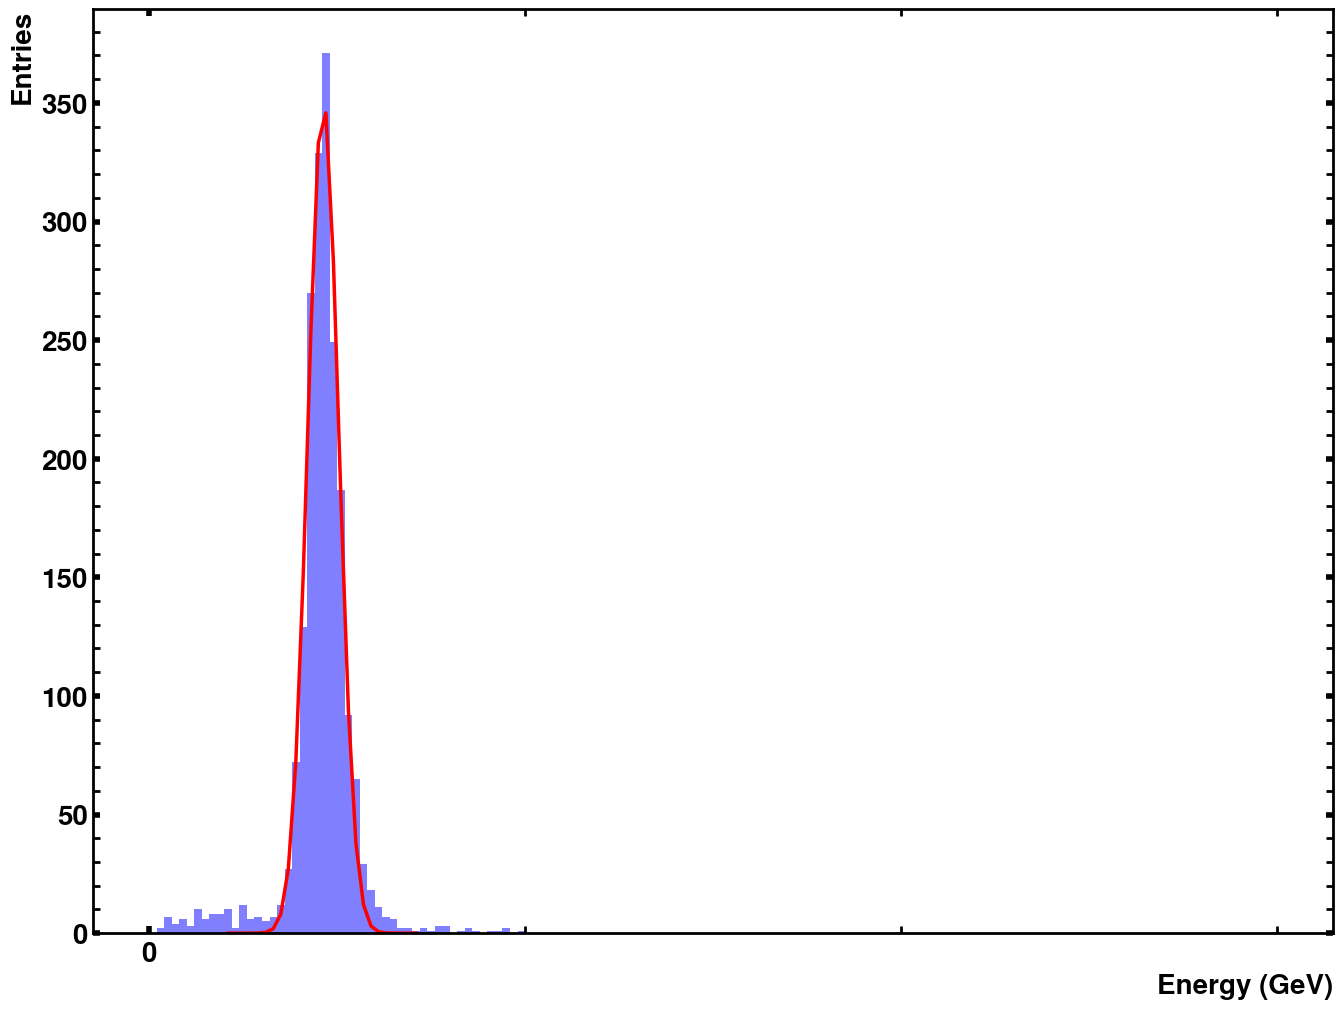

HELLO JELLO 2000
I am wt


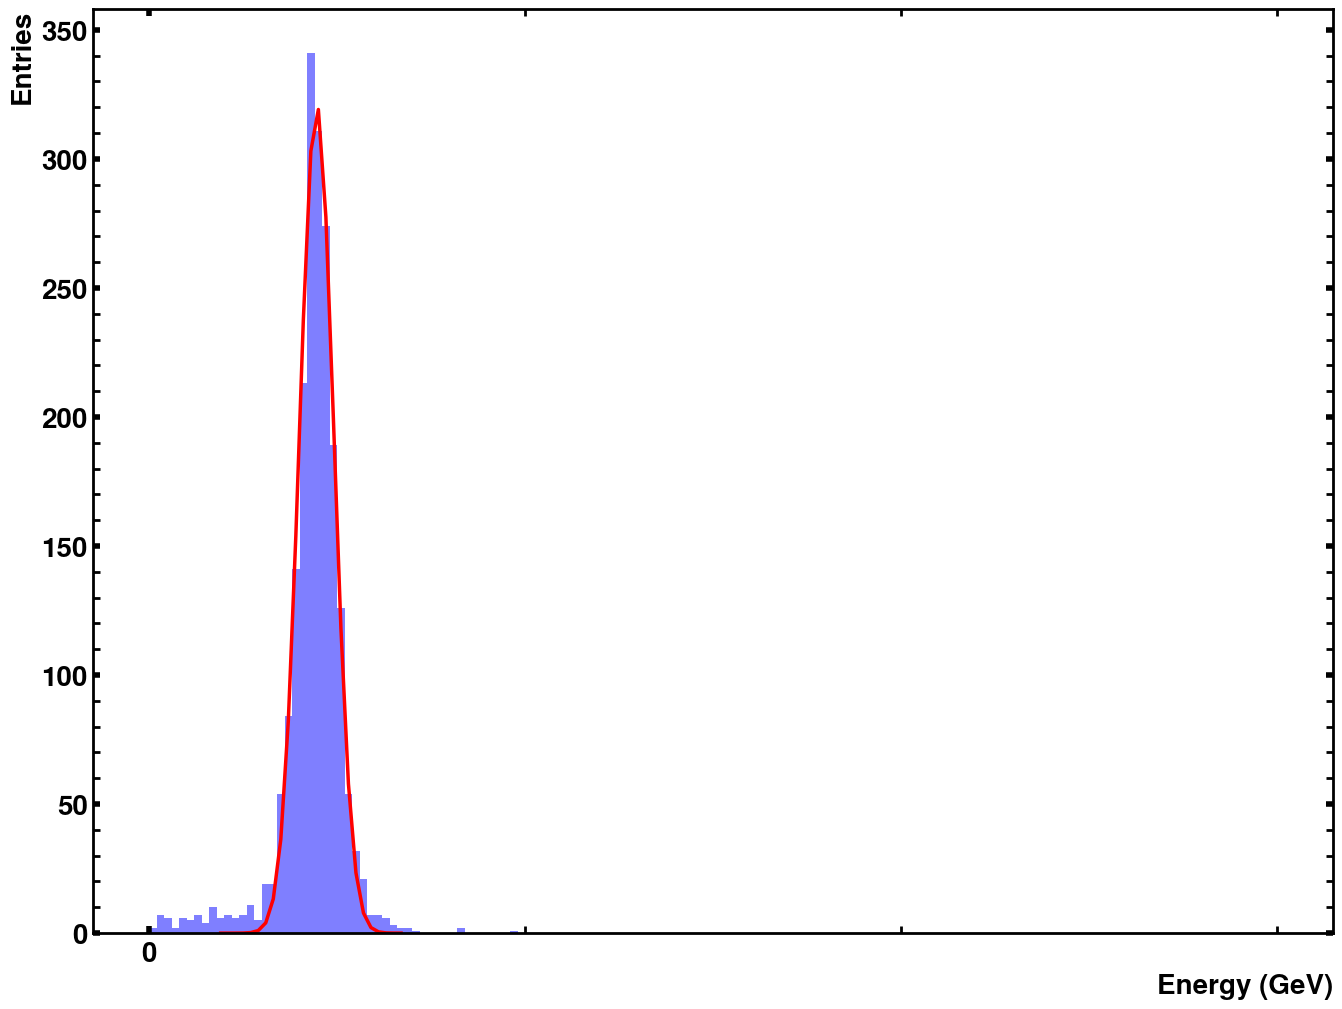

HELLO JELLO 2000
I am wt


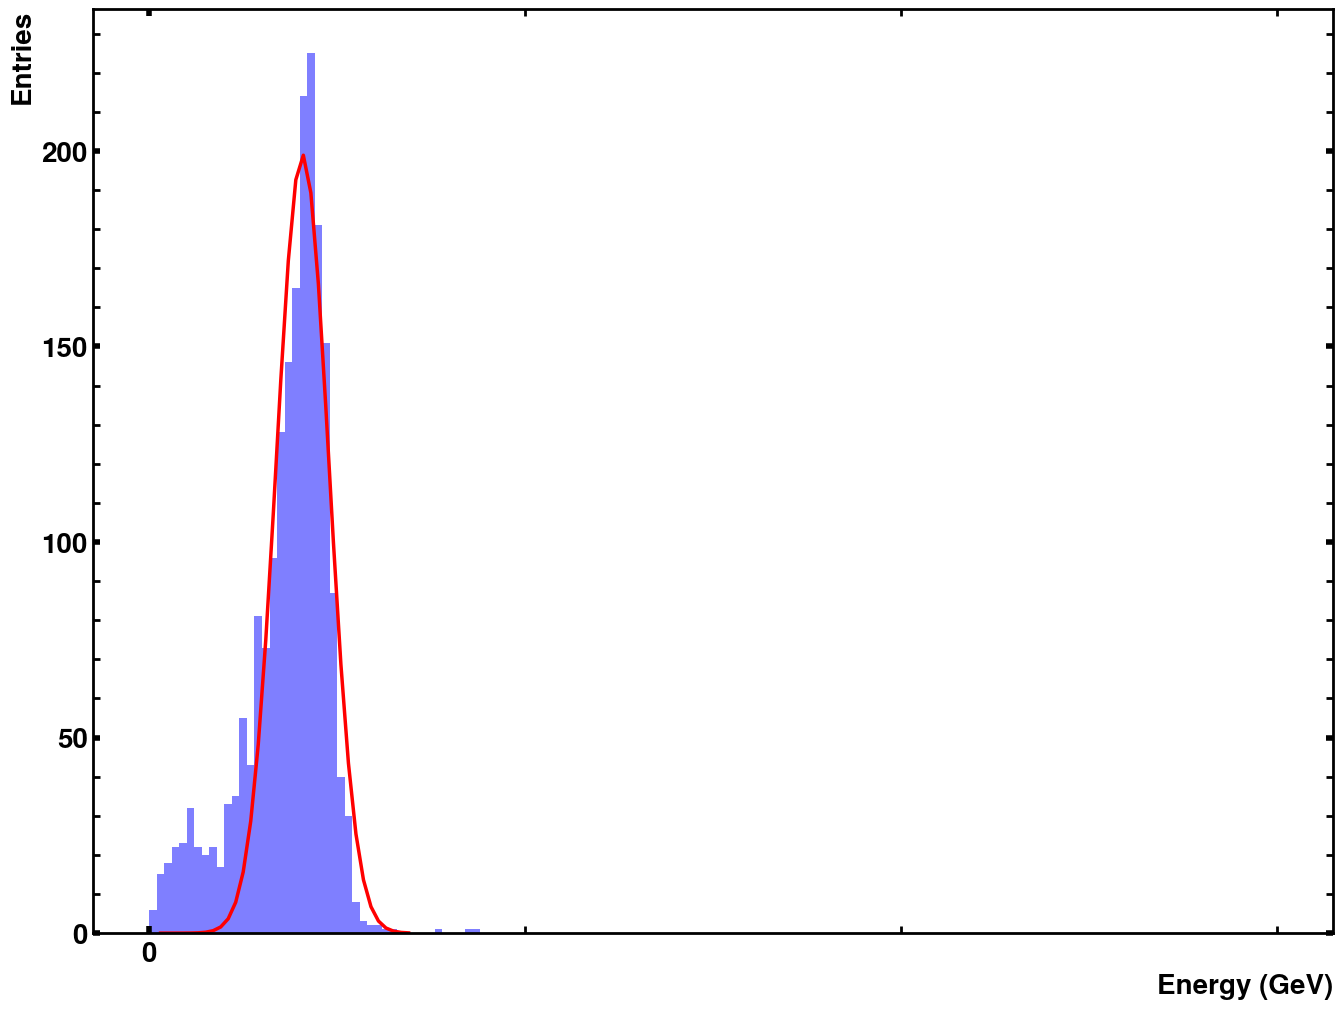

pi_means_hcali=[45.71,45.98,46.62,46.93,46.98,46.31,44.54,40.79 ]
pi_means_error_hcali=[0.436,0.280,0.175,0.128,0.120,0.122,0.130,0.424 ]
pi_stds_hcali=[ 6.22,6.11,4.80,4.45,4.28,4.11,4.57,7.00 ]
pi_stds_error_hcali=[ 0.436,0.280,0.175,0.128,0.120,0.122,0.130,0.424 ]
pi_leaks_per_hcali=[ 20.100,14.400,11.200,8.650,7.750,5.150,5.500,9.850 ]
pi_leaks_per_error_hcali=[ 1.0986,0.9076,0.7891,0.6855,0.6462,0.5203,0.5386,0.7355 ]
pi_resolutions_hcali=[ 0.13606,0.13279,0.10304,0.09479,0.09102,0.08884,0.10261,0.17164 ]
pi_resolutions_errors_hcali=[ 0.0096,0.0061,0.0038,0.0027,0.0026,0.0026,0.0029,0.0105 ]


In [4]:
def get_fitted_mean_std(wt='on'):
   
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(1/10 of event is selected)
    #energies=[10,20,30,40,50,60,80,100]
    #energies=[10,20,30,40,50,60,80, 100]
    #fileindex="deg" ## for insert file or HCAL orginal file
    
    absorber_layers=["0W_54Fe","20W_34Fe","25W_29Fe","30W_24Fe","40W_14Fe"]
    index=3
    fileindex=f"deg_Athena_{absorber_layers[index]}"
    
    #fileindex="deg_Fe-W_Sc35_Ab156" ## for insert with absorber 15.6 mm and Sc = 0.35 mm
    #fileindex="deg_Fe-W" ## for insert WITH W 30 LAYER AND FE 20 LAYERS
    '''
    if fileindex=='deg':
        prefix='W'
    elif fileindex=='deg_Fe-W':
        prefix='FeW'
    '''
    #energies=[50]
    particle='pi-'
    
   
    energies=50 
   
    thetas=[ 2.25, 2.32, 2.56, 2.83, 3.13, 3.46, 3.82, 4.23]#2.25,
    for ithetas in thetas:
        
        
 
        ## FOR THE HCAL Insert reading
        ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
        phi_wFe,ene_good_wFe=plots.read_rootfile_HCAL_Insert(fileindex,fraction,FilePathReco,energies,ithetas,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error,\
        pi_resolution,pi_resolution_error=plots.get_resolution(ene_good_wFe, energies, particle, Sigma_For_leakage, wt)
        
        '''
        ## READ HCAL 
        ene_wFe_h,time_wFe_h,PosRecoX_wFe_h,PosRecoY_wFe_h,PosRecoZ_wFe_h,mass_wFe_h,mom_wFe_h,energy_gen_wFe_h, \
        phi_wFe_h,ene_good_wFe_h=plots.read_rootfile_HCAL(fileindex,fraction,FilePathReco,energies,ithetas,particle,\
                                                         Time_Threshold,Energy_Threshold)
       
         ## RESOLUTION HCAL + HCAL INSERT with weighted sum
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error, pi_resolution,\
        pi_resolution_error=plots.get_resolution_hcalall_weighted(wt, ene_good_wFe_h,ene_good_wFe, ithetas, \
                                                         particle,Sigma_For_leakage) 
        
        '''
        
        
        
        
        pi_means.append(pi_mean)
        pi_stds.append(pi_std)
        pi_means_error.append(pi_mean_error)
        pi_stds_error.append(pi_sigma_error)
        pi_resolutions.append(pi_resolution)
        pi_resolution_errors.append(pi_resolution_error)
        pi_leaks_per.append(pi_leak_per)
        pi_leaks_per_error.append(pi_leak_per_error)
        
    plots.print_decimal_pi_update('hcali', particle, pi_means,  pi_means_error,  pi_stds,pi_stds_error, pi_leaks_per, \
                           pi_leaks_per_error, pi_resolutions, pi_resolution_errors)     
get_fitted_mean_std('on') 




## Resolution with etas at constant Energy 50 GeV pion

In [23]:
thetas=np.array([2.25, 2.32, 2.56, 2.83, 3.13, 3.46, 3.82, 4.23])
#thetas=[2.25, 2.32, 2.56, 2.83, 3.13, 3.46, 3.82, 4.23]

#  HCAL Insert only
pi_means_thetas=[474.46,480.38,491.69,497.37,497.05,487.31,469.19,423.83 ]
pi_means_error_thetas=[2.884,1.745,0.849,0.799,0.672,0.641,0.649,1.990 ]
pi_stds_thetas=[ 65.13,63.56,47.85,46.50,45.71,45.34,47.42,75.55 ]
pi_stds_error_thetas=[ 2.884,1.745,0.849,0.799,0.672,0.641,0.649,1.990 ]
pi_leaks_per_thetas=[ 26.180,17.900,13.380,10.160,7.380,4.980,4.840,8.460 ]
pi_leaks_per_error_thetas=[ 0.8128,0.6497,0.5508,0.4731,0.3981,0.3234,0.3186,0.4284 ]
pi_resolutions_thetas=[ 0.13727,0.13231,0.09732,0.09350,0.09195,0.09304,0.10108,0.17826 ]
pi_resolutions_errors_thetas=[ 0.0061,0.0037,0.0017,0.0016,0.0014,0.0013,0.0014,0.0048 ]

e_means_thetas=[449.63,445.83,444.17,451.51,455.46,456.86,457.17,450.58 ]
e_means_error_thetas=[0.650,0.623,0.864,0.615,0.441,0.343,0.347,0.407 ]
e_stds_thetas=[ 30.72,33.08,36.47,29.23,26.28,25.95,25.28,26.42 ]
e_stds_error_thetas=[ 0.650,0.623,0.865,0.616,0.442,0.343,0.347,0.408 ]
e_leaks_per_thetas=[ 5.080,2.380,0.640,0.800,0.320,0.280,0.080,0.120 ]
e_leaks_per_error_thetas=[ 0.3267,0.2208,0.1135,0.1270,0.0801,0.0749,0.0400,0.0490 ]
e_resolutions_thetas=[ 0.06831,0.07419,0.08211,0.06473,0.05770,0.05679,0.05529,0.05864 ]
e_resolutions_errors_thetas=[ 0.0014,0.0014,0.0020,0.0014,0.0010,0.0008,0.0008,0.0009 ]


## HCAL + HCAL Insert
pi_means_thetas_Sum=[543.51,549.15,563.42,579.15,593.06,612.10,640.72,701.28 ]
pi_means_error_thetas_Sum=[3.371,1.561,1.067,1.197,0.997,1.154,1.523,3.631 ]
pi_stds_thetas_Sum=[ 86.57,82.94,69.35,67.86,69.53,73.93,86.02,132.18 ]
pi_stds_error_thetas_Sum=[ 3.371,1.561,1.067,1.197,0.997,1.154,1.523,3.631 ]
pi_leaks_per_thetas_Sum=[ 12.397,5.586,1.306,0.824,0.584,0.462,0.404,0.350 ]
pi_leaks_per_error_thetas_Sum=[ 0.5291,0.3442,0.1630,0.1293,0.1087,0.0967,0.0904,0.0878 ]
pi_resolutions_thetas_Sum=[ 0.15927,0.15104,0.12310,0.11716,0.11724,0.12077,0.13426,0.18848 ]
pi_resolutions_errors_thetas_Sum=[ 0.0063,0.0029,0.0019,0.0021,0.0017,0.0019,0.0024,0.0053 ]


e_means_thetas_Sum=[452.95,450.16,448.35,454.60,458.02,459.60,461.33,472.64 ]
e_means_error_thetas_Sum=[0.680,0.472,0.343,0.485,0.368,0.328,0.352,0.593 ]
e_stds_thetas_Sum=[ 29.04,29.69,30.56,26.36,25.45,25.64,25.27,29.80 ]
e_stds_error_thetas_Sum=[ 0.680,0.472,0.344,0.485,0.369,0.329,0.352,0.594 ]
e_leaks_per_thetas_Sum=[ 2.620,0.980,0.280,0.320,0.180,0.120,0.160,0.000 ]
e_leaks_per_error_thetas_Sum=[ 0.2319,0.1407,0.0749,0.0801,0.0601,0.0490,0.0566,0.0000 ]
e_resolutions_thetas_Sum=[ 0.06412,0.06595,0.06816,0.05798,0.05557,0.05579,0.05477,0.06305 ]
e_resolutions_errors_thetas_Sum=[ 0.0015,0.0011,0.0008,0.0011,0.0008,0.0007,0.0008,0.0013 ]


### Weighted sum 
pi_means_thetas_wt_sum=[51.43,52.07,53.41,54.63,55.37,55.82,56.34,57.48 ]
pi_means_error_thetas_wt_sum=[0.200,0.111,0.091,0.093,0.086,0.091,0.076,0.116 ]
pi_stds_thetas_wt_sum=[ 6.95,6.87,5.47,5.32,5.32,5.20,4.99,5.72 ]
pi_stds_error_thetas_wt_sum=[ 0.200,0.111,0.091,0.093,0.086,0.091,0.076,0.116 ]
pi_leaks_per_thetas_wt_sum=[ 14.200,6.920,2.600,1.800,1.060,0.840,0.780,0.880 ]
pi_leaks_per_error_thetas_wt_sum=[ 0.5695,0.3847,0.2310,0.1914,0.1464,0.1302,0.1254,0.1332 ]
pi_resolutions_thetas_wt_sum=[ 0.13514,0.13192,0.10249,0.09730,0.09610,0.09317,0.08853,0.09949 ]
pi_resolutions_errors_thetas_wt_sum=[ 0.0039,0.0022,0.0017,0.0017,0.0016,0.0016,0.0014,0.0020 ]

etas=plots.get_eta(thetas)
np.set_printoptions(precision=2)
print(etas)





[3.93 3.9  3.8  3.7  3.6  3.5  3.4  3.3 ]


### Plot the resolution as function of eta (HCAL  only  or HCAL + HCAL Insert

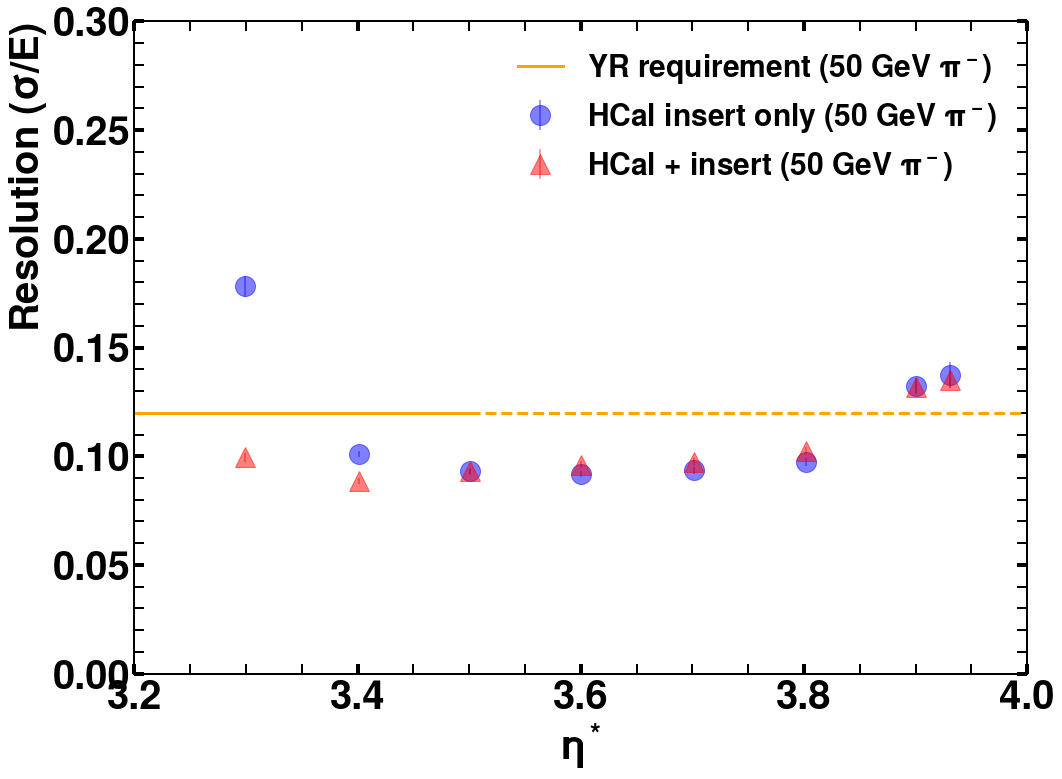

In [26]:
### 

fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(etas,pi_resolutions_thetas, pi_resolutions_errors_thetas ,alpha=0.5,color="blue",marker='o',markersize=20,\
            label='HCal insert only (50 GeV $\pi^-$)',linestyle='None')

ax.errorbar(etas,pi_resolutions_thetas_wt_sum, pi_resolutions_errors_thetas_wt_sum, alpha=0.5,color="red",\
            marker='^',markersize=20, label='HCal + insert (50 GeV $\pi^-$)',linestyle='None')

#ax.set_title('$\pi^-$, Energy= 50 GeV')

ax.set_xlabel("$\eta^*$", loc='center',fontsize=40)
#xlabel loc={loc!r}'
ax.set_ylabel('Resolution ($\sigma$/E)')
xlim=3.2
ax.set_ylim(0,0.30)
ax.set_xlim(xlim,4.0)
plt.plot([xlim,3.5],[0.12,0.12], color='orange', linewidth=3,label='YR requirement (50 GeV $\pi^-$)')
plt.plot([3.5,4.0],[0.12,0.12], color='orange', linewidth=3, linestyle='dashed',)
plt.legend()
 
plt.savefig("/Users/bishnukarki/Resolution_eta_HCALI.pdf")
plt.show()

## Leakage with etas at constant Energy 50 GeV pion
## Fe-W MIXTURE 

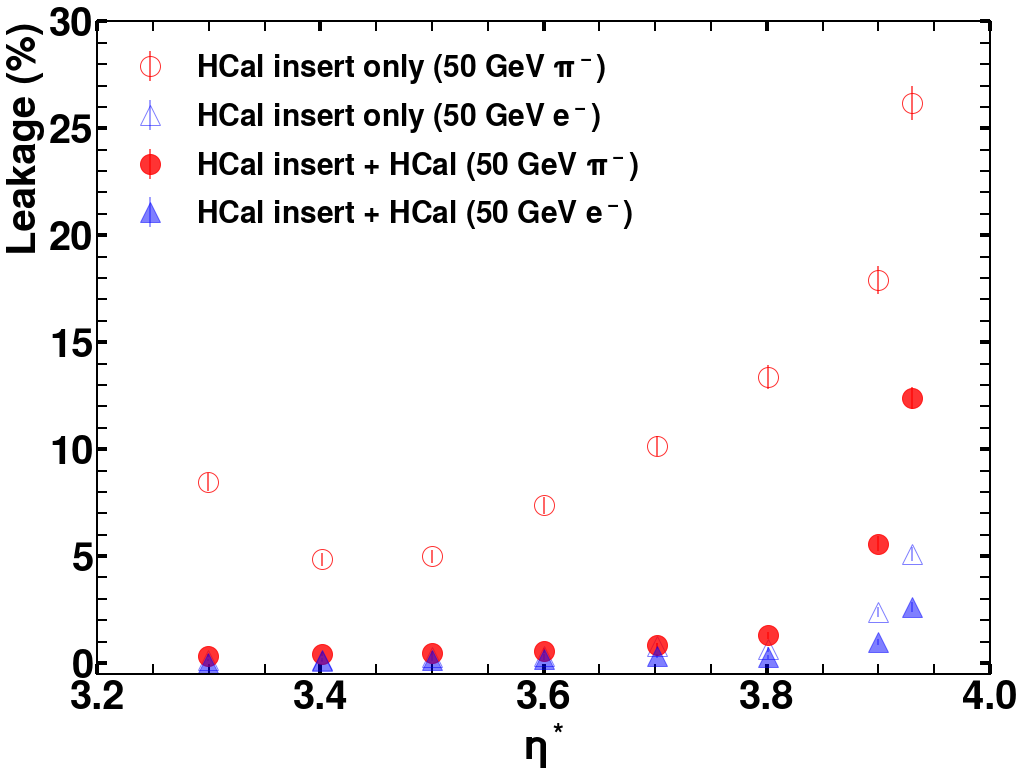

In [29]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(etas,pi_leaks_per_thetas, pi_leaks_per_error_thetas,color="red",alpha=0.8,marker='o',markersize=20,\
            label='HCal insert only (50 GeV $\pi^-$)',linestyle='None',mfc='none' )

ax.errorbar(etas,e_leaks_per_thetas, e_leaks_per_error_thetas,color="blue",alpha=0.5,marker='^',markersize=20,\
            label='HCal insert only (50 GeV $e^-$)',linestyle='None' ,mfc='none')

ax.errorbar(etas,pi_leaks_per_thetas_Sum, pi_leaks_per_error_thetas_Sum,color="red",alpha=0.8,marker='o',markersize=20,\
            label='HCal insert + HCal (50 GeV $\pi^-$)',linestyle='None' )



ax.errorbar(etas,e_leaks_per_thetas_Sum, e_leaks_per_error_thetas_Sum,color="blue",alpha=0.5,marker='^',markersize=20,\
            label='HCal insert + HCal (50 GeV $e^-$)',linestyle='None' )

#ax.set_title('$\pi^-$, Energy= 50 GeV')
ax.set_xlabel("$\eta^*$",loc='center',fontsize=40)
ax.set_ylabel('Leakage (%)')
ax.set_ylim(-0.5,30)
ax.set_xlim(xlim,4.0)

plt.legend()
plt.show() 

NameError: name 'e_leaks_per_thetas_Sum' is not defined

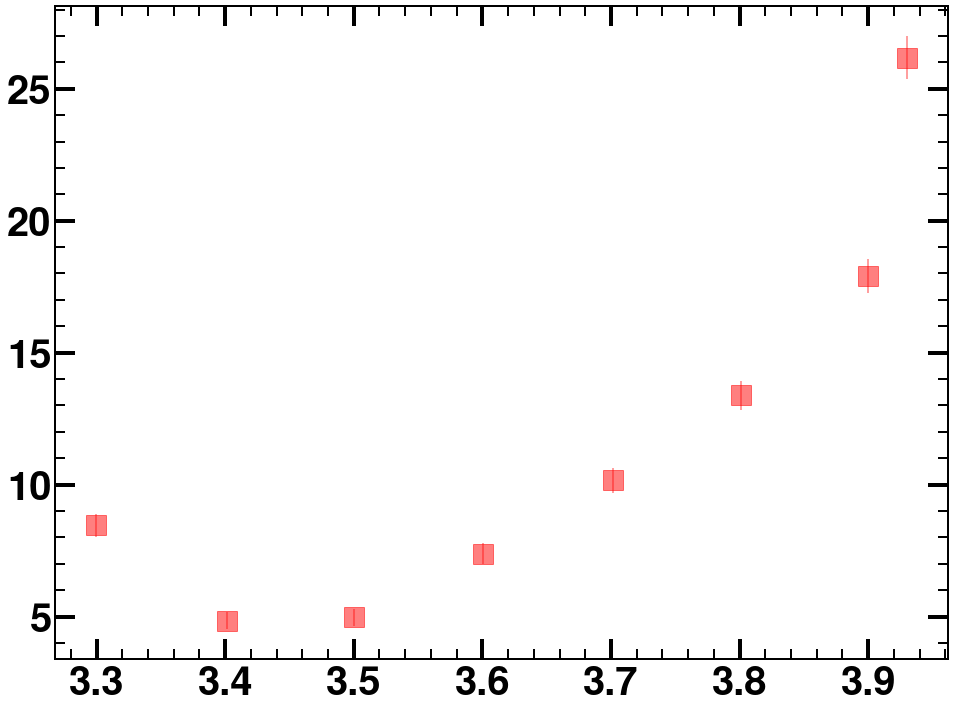

In [9]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(etas,pi_leaks_per_thetas, pi_leaks_per_error_thetas,color="red",alpha=0.5,marker='s',markersize=20,\
            label='HCal insert only  (50 GeV $\pi^-$)',linestyle='None' )

ax.errorbar(etas,e_leaks_per_thetas_Sum, e_leaks_per_error_thetas_Sum,color="blue",alpha=0.5,marker='s',markersize=20,\
            label='HCal insert only  (50 GeV $e^-$)',linestyle='None' )

#ax.set_title('$\pi^-$, Energy= 50 GeV')
ax.set_xlabel("$\eta^*$",loc='center',fontsize=40)
ax.set_ylabel('Leakage (%)')
ax.set_ylim(0,30)

#plt.legend()
plt.show() 

## THIS IS FOR THE FTFP_BERT_HP VS FTFP_BERT COMP FOR TWO DATA POINTS

### These are numbers from the Fe+ W mixture HCALI with Physisc list FTFP_BERT_HP (files from Ryan)
## ATHENA HCAL

10    Hello  10


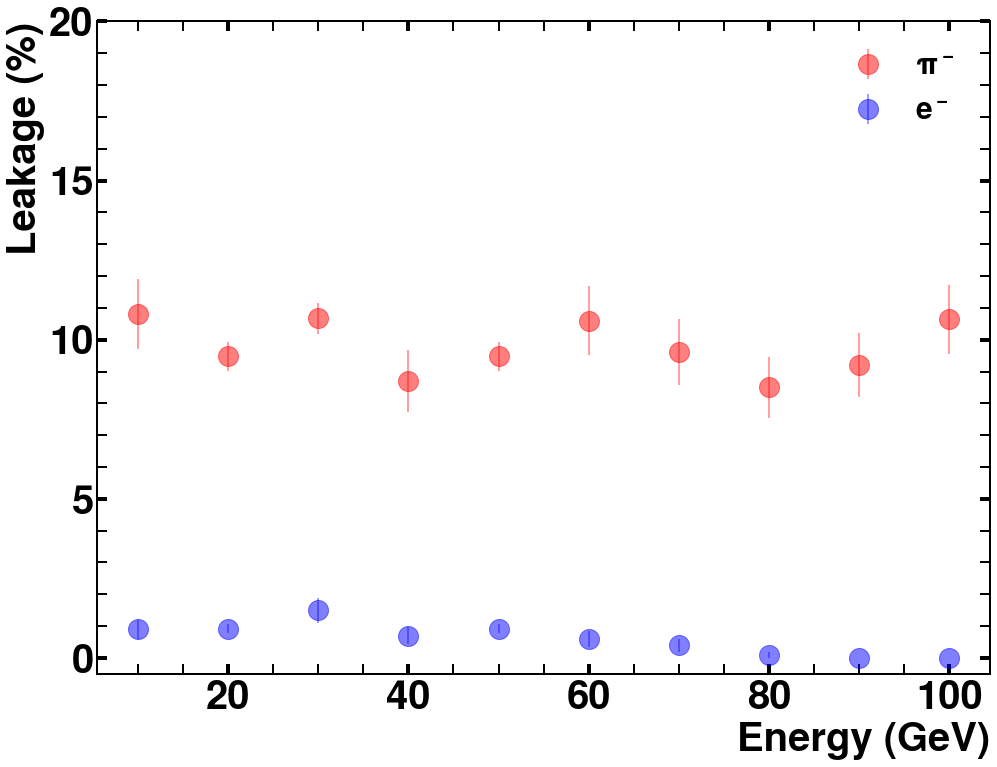

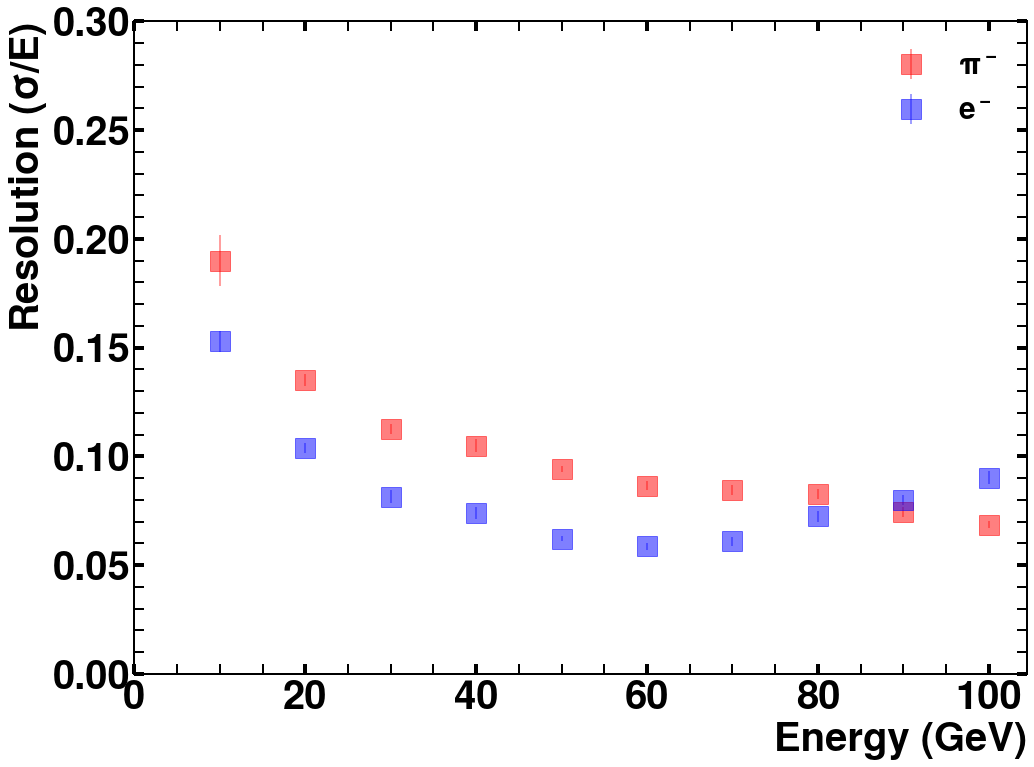

In [4]:
energies_ry=[10,20,30,40,50,60,70,80,90,100]
#energies_pi=[10,20,30,40,50,60,80, 100]


## Time is 200 ns 
pi_means_Hp=[94.60,193.38,291.97,390.82,489.62,590.49,683.89,781.30,883.94,985.28 ]
pi_means_error_Hp=[1.078,0.532,0.626,1.156,0.687,1.266,1.437,1.811,1.901,1.666 ]
pi_stds_Hp=[ 17.98,26.12,32.84,40.96,46.07,51.08,57.79,64.45,65.89,67.54 ]
pi_stds_error_Hp=[ 1.078,0.532,0.626,1.156,0.687,1.266,1.437,1.811,1.901,1.666 ]
pi_leaks_per_Hp=[ 10.800,9.480,10.680,8.700,9.480,10.600,9.610,8.509,9.209,10.643 ]
pi_leaks_per_error_Hp=[ 1.0939,0.4556,0.4862,0.9725,0.4556,1.0828,1.0268,0.9613,1.0034,1.0873 ]
pi_resolutions_Hp=[ 0.19006,0.13507,0.11247,0.10480,0.09409,0.08651,0.08450,0.08249,0.07454,0.06855 ]
pi_resolutions_errors_Hp=[ 0.0116,0.0028,0.0022,0.0030,0.0014,0.0022,0.0021,0.0023,0.0022,0.0017 ]



e_means_Hp=[86.57,177.68,268.05,358.10,450.94,533.48,607.50,669.82,729.96,779.06 ]
e_means_error_Hp=[0.402,0.384,0.776,0.962,0.503,0.848,1.287,1.720,1.777,2.384 ]
e_stds_Hp=[ 13.23,18.44,21.82,26.52,28.05,31.27,37.02,48.50,58.31,70.33 ]
e_stds_error_Hp=[ 0.402,0.384,0.776,0.963,0.503,0.849,1.290,1.726,1.782,2.390 ]
e_leaks_per_Hp=[ 0.900,0.920,1.500,0.700,0.920,0.600,0.400,0.100,0.000,0.000 ]
e_leaks_per_error_Hp=[ 0.3013,0.1363,0.3902,0.2655,0.1363,0.2457,0.2004,0.1000,0.0000,0.0000 ]
e_resolutions_Hp=[ 0.15283,0.10377,0.08141,0.07405,0.06220,0.05861,0.06094,0.07241,0.07988,0.09027 ]
e_resolutions_errors_Hp=[ 0.0047,0.0022,0.0029,0.0027,0.0011,0.0016,0.0021,0.0026,0.0024,0.0031 ]

print(len(e_means_Hp),'   Hello ',len(pi_means_Hp))


fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_ry,pi_leaks_per_Hp, pi_leaks_per_error_Hp ,alpha=0.5,color="red",marker='o',markersize=20,\
            label='$\pi^-$ ',linestyle='None')


ax.errorbar(energies_ry,e_leaks_per_Hp, e_leaks_per_error_Hp ,color="blue",alpha=0.5,marker='o',markersize=20,\
            label='$e^-$ ',linestyle='None')


ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Leakage (%)")
ax.set_ylim(-0.5,20)

plt.legend()
plt.show()

fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energies_ry,pi_resolutions_Hp, pi_resolutions_errors_Hp,color="red",alpha=0.5,marker='s',markersize=20,\
            label='$\pi^-$',linestyle='None' )


            
           
ax.errorbar(energies_ry,e_resolutions_Hp, e_resolutions_errors_Hp,color="blue",alpha=0.5,marker='s',markersize=20,\
            label='$e^-$ ',linestyle='None' )



ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Resolution ($\sigma$/E)")
ax.set_ylim(0.0,0.30)
ax.set_xlim(0,)

plt.legend()
plt.show()

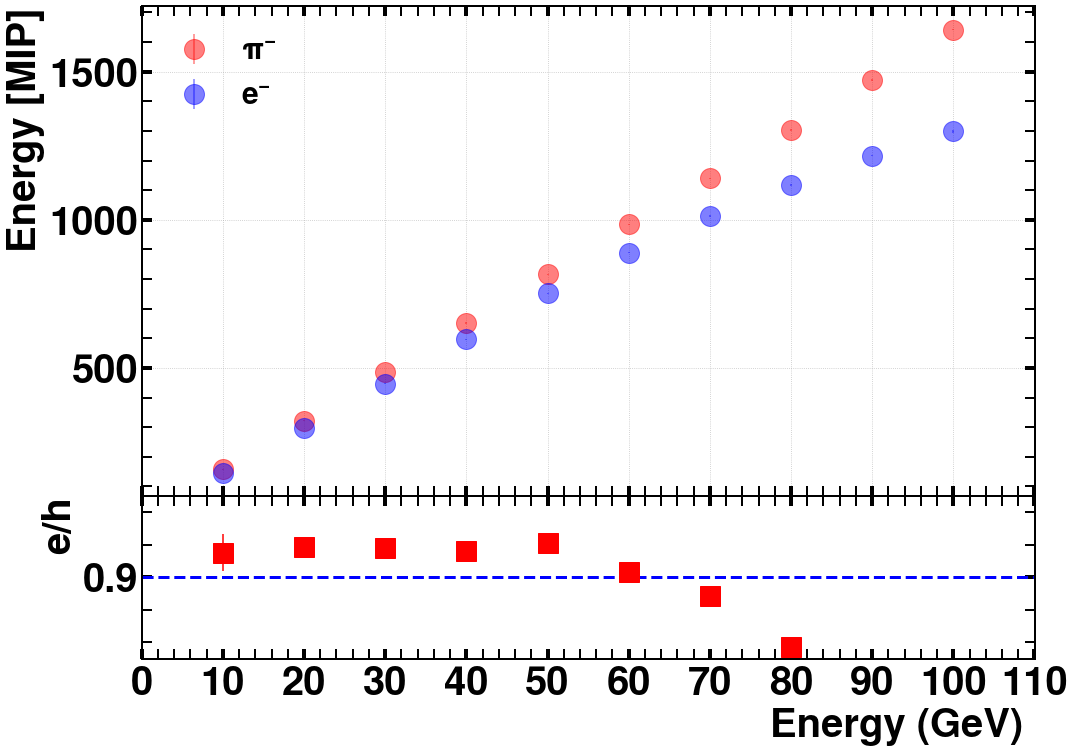

In [6]:
MIP_insert=0.6
pi_means=np.divide(pi_means_Hp,MIP_insert)
e_means=np.divide(e_means_Hp,MIP_insert)
pi_means_error=np.divide(pi_means_error_Hp,MIP_insert)
e_means_error=np.divide(e_means_error_Hp,MIP_insert)

ratio_hole=np.divide(e_means,pi_means)
error_A=(pi_means_error/pi_means)**2 + (e_means_error/e_means)**2
ratio_hole_error=np.sqrt(error_A)*ratio_hole

fig,(ax,ax1) = plt.subplots(2,1,figsize=(16, 12),gridspec_kw={'height_ratios': [3, 1]},sharex=True)

ax.errorbar(energies_ry, pi_means, pi_means_error ,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='$\pi^{-}$')
ax.errorbar(energies_ry,e_means, e_means_error,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='$e^{-}$')
ax.set_ylabel('Energy [MIP]')
#ax.set_xlabel('Energy (GeV) ')

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.set_ylim(0,3500)
ax.set_xlim(0,90)
#ax.set_title("Fe-AHCAL ($\pi^-$)")

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)


ax1.errorbar(energies_ry,ratio_hole,ratio_hole_error,marker='s',markersize='20',color='r',linestyle='None')
ax1.set_ylim(0.85,0.95)
ax1.set_xlim(0,110)
ax1.yaxis.set_major_locator(MultipleLocator(0.1))   
ax1.set_xlabel('Energy (GeV) ')
ax1.set_ylabel('e/h')
ax1.axhline(0.90,color='blue',linewidth=3, linestyle='dashed')

plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
ax.legend(loc='upper left')





## Comparsion with FTFP_BERT_HP and FTFP_HP model

6   8


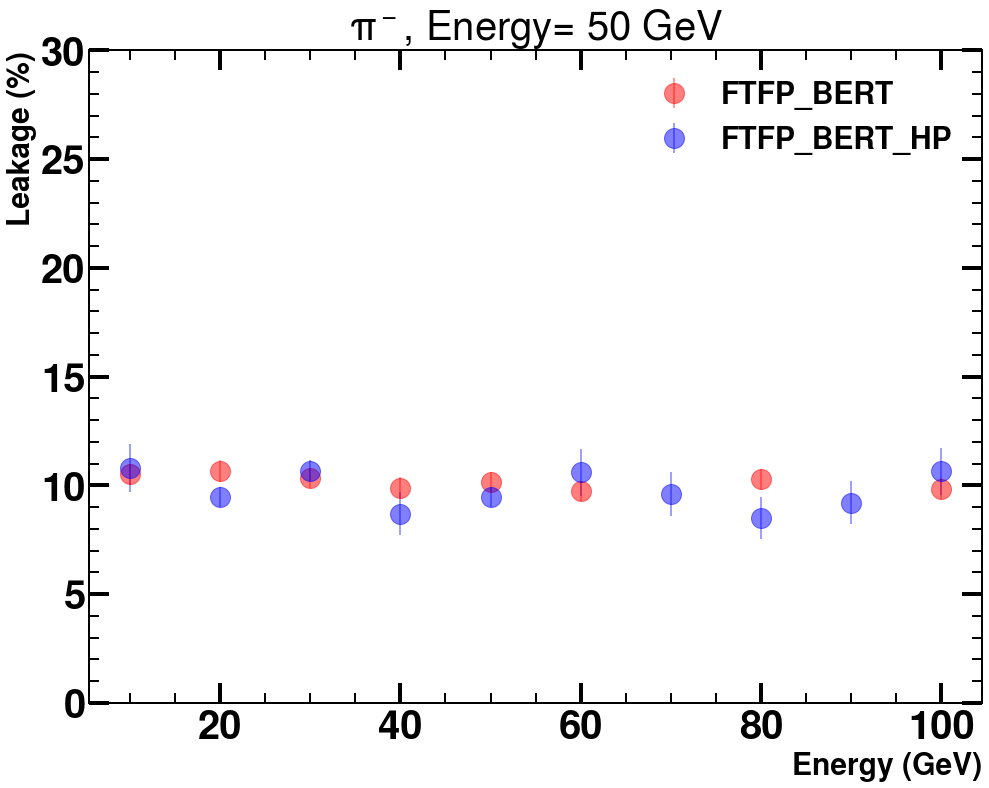

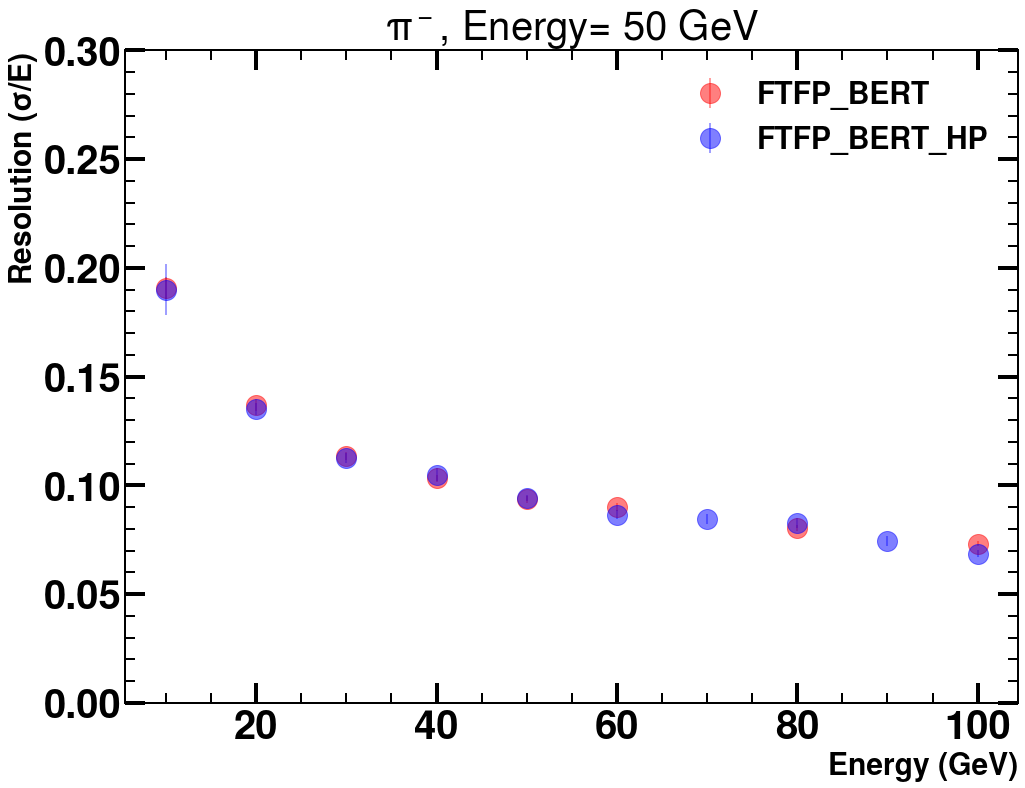

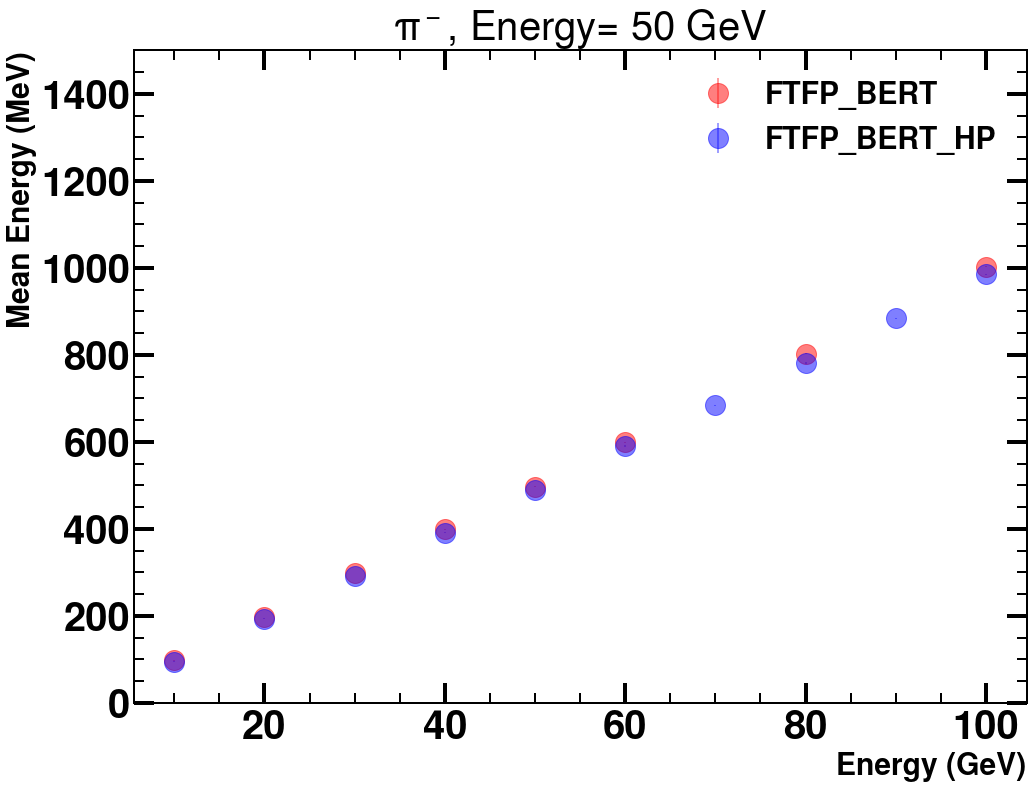

In [107]:
energies_ry=[10,20,30,40,50,60,70,80,90,100]
energies_pi=[10,20,30,40,50,60,80, 100]
print(len(energies),' ', len(pi_leaks_per_FeW))

### LEAKS WITH AND WIHTOUT BERT
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energies_pi,pi_leaks_per_FeW, pi_leaks_per_error_FeW,color="red",alpha=0.5,marker='o',markersize=20,\
            label='FTFP_BERT',linestyle='None' )

ax.errorbar(energies_ry,pi_leaks_per_Hp, pi_leaks_per_error_Hp,color="blue",alpha=0.5,marker='o',markersize=20,\
            label='FTFP_BERT_HP',linestyle='None' )

ax.set_title('$\pi^-$, Energy= 50 GeV')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Leakage (%)')
ax.set_ylim(0,30)

plt.legend()
plt.show() 


###  RESOLUTION WITH AND WITHOUT BERT
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_resolutions_FeW, pi_resolutions_errors_FeW ,alpha=0.5,color="red",marker='o',markersize=20,\
            label='FTFP_BERT',linestyle='None')

ax.errorbar(energies_ry,pi_resolutions_Hp, pi_resolutions_errors_Hp, alpha=0.5,color="blue",marker='o',markersize=20,\
            label='FTFP_BERT_HP',linestyle='None')

ax.set_title('$\pi^-$, Energy= 50 GeV')

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Resolution ($\sigma$/E)')
ax.set_ylim(0,0.30)

plt.legend()
plt.show() 


fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_means_FeW, pi_means_error_FeW ,alpha=0.5,color="red",marker='o',markersize=20,\
            label='FTFP_BERT',linestyle='None')

ax.errorbar(energies_ry,pi_means_Hp, pi_means_error_Hp, alpha=0.5,color="blue",marker='o',markersize=20,\
            label='FTFP_BERT_HP',linestyle='None')

ax.set_title('$\pi^-$, Energy= 50 GeV')

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Mean Energy (MeV)')
ax.set_ylim(0,1500)

plt.legend()
plt.show() 

# e/h ratio with timiing cut
# with FTFP_BERT physics list
## AND WITH FTFP_BERT_HP (PHYSICS LIST)


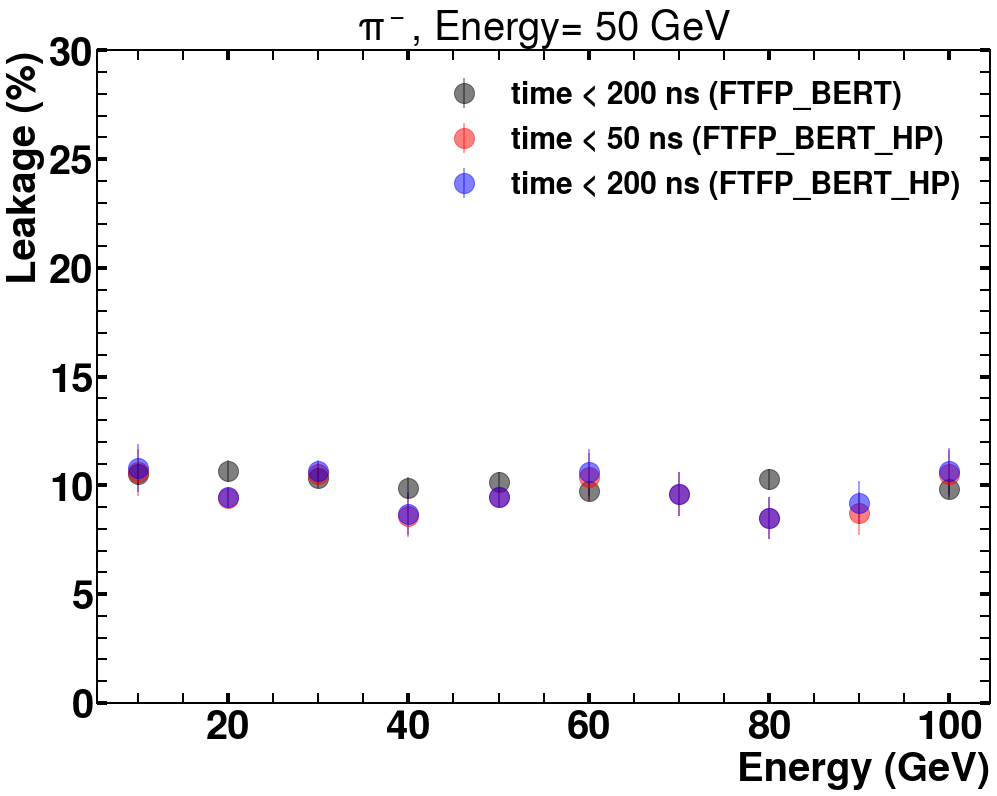

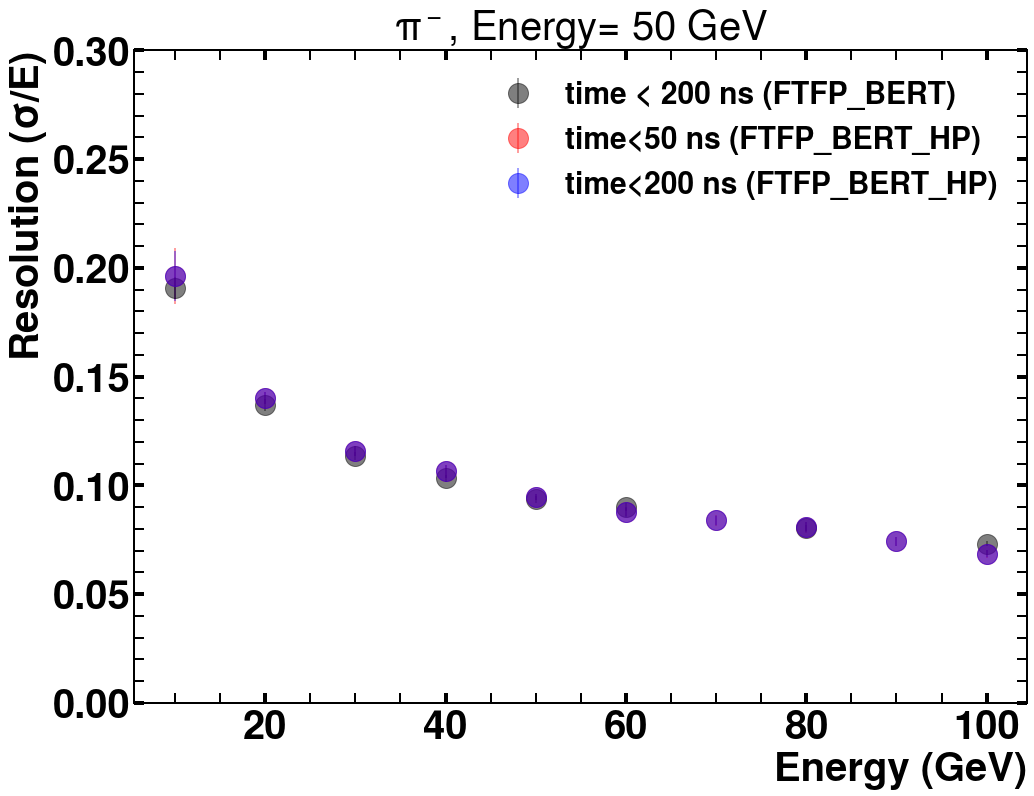

In [7]:
## THESE ARE THE NUMBERS FORM THE RYAN FILE WITH FTFP_BERT_HP (PHYSICS LIST)
# TIMING CUT 150 NS
energies=[10,20,30,40,50,60,70,80,90,100]
energies_pi=[10,20,30,40,50,60,80, 100]
pi_means_200=[94.6,193.38,291.97,390.82,489.62,590.49,683.89,781.30,883.94,985.28 ]
pi_means_error_200=[0.923,0.532,0.626,1.156,0.687,1.266,1.437,1.811,1.901,1.666 ]
pi_stds_200=[ 17.98,26.12,32.84,40.96,46.07,51.08,57.79,64.45,65.89,67.54 ]
pi_stds_error_200=[ 1.078,0.532,0.626,1.156,0.687,1.266,1.437,1.811,1.901,1.666 ]
pi_leaks_per_200=[ 10.800,9.480,10.680,8.700,9.480,10.600,9.610,8.509,9.209,10.643 ]
pi_leaks_per_error_200=[ 1.0939,0.4556,0.4862,0.9725,0.4556,1.0828,1.0268,0.9613,1.0034,1.0873 ]
pi_resolutions_200=[ 0.19006,0.13507,0.11247,0.10480,0.09409,0.08651,0.08450,0.08249,0.07454,0.06855 ]
pi_resolutions_errors_200=[ 0.0116,0.0028,0.0022,0.0030,0.0014,0.0022,0.0021,0.0023,0.0022,0.0017 ]


e_means_200=[86.57,177.68,268.05,358.10,450.94,533.48,607.50,669.82,729.96,779.06 ]
e_means_error_200=[0.377,0.384,0.776,0.962,0.503,0.848,1.287,1.720,1.777,2.384 ]
e_stds_200=[ 13.23,18.44,21.82,26.52,28.05,31.27,37.02,48.50,58.31,70.33 ]
e_stds_error_200=[ 0.402,0.384,0.776,0.963,0.503,0.849,1.290,1.726,1.782,2.390 ]
e_leaks_per_200=[ 0.900,0.920,1.500,0.700,0.920,0.600,0.400,0.100,0.000,0.000 ]
e_leaks_per_error_200=[ 0.3013,0.1363,0.3902,0.2655,0.1363,0.2457,0.2004,0.1000,0.0000,0.0000 ]
e_resolutions_200=[ 0.15283,0.10377,0.08141,0.07405,0.06220,0.05861,0.06094,0.07241,0.07988,0.09027 ]
e_resolutions_errors_200=[ 0.0047,0.0022,0.0029,0.0027,0.0011,0.0016,0.0021,0.0026,0.0024,0.0031 ]

# TIMING CUT 150 NS

pi_means_150=[93.33,191.54,289.43,387.64,485.94,586.04,678.88,776.00,878.05,978.78 ]
pi_means_error_150=[0.894,0.508,0.676,0.950,0.696,1.365,1.645,1.702,1.899,1.542 ]
pi_stds_150=[ 17.52,26.02,32.68,40.65,45.70,50.72,57.07,63.50,65.71,66.77 ]
pi_stds_error_150=[ 1.075,0.508,0.676,0.950,0.696,1.365,1.645,1.702,1.899,1.542 ]
pi_leaks_per_150=[ 10.900,9.520,10.720,8.600,9.540,10.500,9.610,8.609,9.209,10.643 ]
pi_leaks_per_error_150=[ 1.0995,0.4566,0.4872,0.9664,0.4572,1.0771,1.0268,0.9674,1.0034,1.0873 ]
pi_resolutions_150=[ 0.18771,0.13584,0.11291,0.10486,0.09404,0.08655,0.08407,0.08183,0.07484,0.06821 ]
pi_resolutions_errors_150=[ 0.0117,0.0027,0.0023,0.0025,0.0014,0.0023,0.0024,0.0022,0.0022,0.0016 ]


e_means_150=[86.57,177.65,268.01,358.05,450.89,533.43,607.45,669.76,729.88,778.99 ]
e_means_error_150=[0.405,0.366,0.781,0.995,0.502,0.894,1.191,1.703,1.735,2.441 ]
e_stds_150=[ 13.24,18.45,21.85,26.54,28.05,31.33,37.00,48.45,58.31,70.33 ]
e_stds_error_150=[ 0.406,0.366,0.781,0.997,0.502,0.895,1.193,1.709,1.741,2.447 ]
e_leaks_per_150=[ 0.900,0.920,1.200,0.700,0.940,0.600,0.400,0.100,0.000,0.000 ]
e_leaks_per_error_150=[ 0.3013,0.1363,0.3485,0.2655,0.1378,0.2457,0.2004,0.1000,0.0000,0.0000 ]
e_resolutions_150=[ 0.15296,0.10383,0.08153,0.07412,0.06221,0.05874,0.06090,0.07234,0.07989,0.09029 ]
e_resolutions_errors_150=[ 0.0047,0.0021,0.0029,0.0028,0.0011,0.0017,0.0020,0.0026,0.0024,0.0032 ]

# TIMING CUT 100 NS
pi_means_100=[91.79,188.64,285.42,382.63,479.95,579.30,671.03,767.47,868.43,968.65 ]
pi_means_error_100=[0.861,0.568,0.605,0.988,0.614,1.141,1.491,1.910,1.820,1.700 ]
pi_stds_100=[ 17.28,25.87,32.34,40.24,45.20,50.12,56.29,62.16,64.68,66.53 ]
pi_stds_error_100=[ 1.057,0.568,0.605,0.988,0.614,1.141,1.491,1.910,1.820,1.700 ]
pi_leaks_per_100=[ 11.100,9.460,10.640,8.600,9.420,10.500,9.610,8.509,8.809,10.643 ]
pi_leaks_per_error_100=[ 1.1105,0.4551,0.4852,0.9664,0.4540,1.0771,1.0268,0.9613,0.9795,1.0873 ]
pi_resolutions_100=[ 0.18828,0.13715,0.11331,0.10517,0.09417,0.08652,0.08388,0.08100,0.07448,0.06869 ]
pi_resolutions_errors_100=[ 0.0117,0.0030,0.0021,0.0026,0.0013,0.0020,0.0022,0.0025,0.0021,0.0018 ]

e_means_100=[86.55,177.61,267.98,357.99,450.80,533.35,607.37,669.58,729.74,778.82 ]
e_means_error_100=[0.400,0.366,0.781,0.987,0.499,0.980,1.214,1.643,1.774,2.587 ]
e_stds_100=[ 13.25,18.43,21.87,26.54,28.02,31.33,36.94,48.51,58.28,70.30 ]
e_stds_error_100=[ 0.400,0.366,0.781,0.988,0.499,0.981,1.216,1.649,1.780,2.593 ]
e_leaks_per_100=[ 0.900,0.920,1.200,0.700,0.940,0.600,0.400,0.100,0.000,0.000 ]
e_leaks_per_error_100=[ 0.3013,0.1363,0.3485,0.2655,0.1378,0.2457,0.2004,0.1000,0.0000,0.0000 ]
e_resolutions_100=[ 0.15308,0.10379,0.08161,0.07412,0.06216,0.05874,0.06083,0.07245,0.07987,0.09027 ]
e_resolutions_errors_100=[ 0.0047,0.0021,0.0029,0.0028,0.0011,0.0018,0.0020,0.0025,0.0024,0.0033 ]

## Timing cut 50 ns 
pi_means_50=[88.59,182.96,277.44,372.87,467.82,565.18,654.83,749.30,848.50,946.10 ]
pi_means_error_50=[0.886,0.488,0.594,1.057,0.637,0.967,1.702,1.810,1.664,1.728 ]
pi_stds_50=[ 17.39,25.67,32.16,39.68,44.19,49.59,55.00,60.46,63.01,64.86 ]
pi_stds_error_50=[ 1.127,0.488,0.594,1.057,0.637,0.967,1.702,1.810,1.664,1.728 ]
pi_leaks_per_50=[ 10.600,9.420,10.540,8.600,9.480,10.400,9.610,8.509,8.709,10.542 ]
pi_leaks_per_error_50=[ 1.0828,0.4540,0.4827,0.9664,0.4556,1.0715,1.0268,0.9613,0.9735,1.0817 ]
pi_resolutions_50=[ 0.19635,0.14030,0.11591,0.10641,0.09447,0.08775,0.08399,0.08069,0.07426,0.06856 ]
pi_resolutions_errors_50=[ 0.0130,0.0027,0.0022,0.0029,0.0014,0.0017,0.0026,0.0024,0.0020,0.0018 ]


e_means_50=[86.49,177.52,267.95,357.84,450.62,533.07,607.05,669.35,729.44,778.44 ]
e_means_error_50=[0.406,0.387,0.767,0.910,0.528,0.952,1.298,1.600,1.724,2.428 ]
e_stds_50=[ 13.28,18.41,21.82,26.54,28.05,31.37,36.95,48.50,58.30,70.25 ]
e_stds_error_50=[ 0.406,0.387,0.767,0.912,0.528,0.953,1.300,1.606,1.729,2.434 ]
e_leaks_per_50=[ 0.900,0.940,1.200,0.700,0.960,0.600,0.400,0.100,0.000,0.000 ]
e_leaks_per_error_50=[ 0.3013,0.1378,0.3485,0.2655,0.1392,0.2457,0.2004,0.1000,0.0000,0.0000 ]
e_resolutions_50=[ 0.15357,0.10368,0.08144,0.07418,0.06224,0.05884,0.06087,0.07245,0.07993,0.09024 ]
e_resolutions_errors_50=[ 0.0047,0.0022,0.0029,0.0026,0.0012,0.0018,0.0021,0.0024,0.0024,0.0031 ]



pi_means_50=[88.59,182.96,277.44,372.87,467.82,565.18,654.83,749.30,848.50,946.10 ]
e_means_50=[86.49 ,177.52,267.95,357.84,450.62,533.07,607.05,669.35,729.44,778.44 ]
pi_resolutions_50=[ 0.19635,0.14030,0.11591,0.10641,0.09447,0.08775,0.08399,0.08069,0.07426,0.06856 ]
e_resolutions_50=[ 0.15357,0.10368,0.08144,0.07418,0.06224,0.05884,0.06087,0.07245,0.07993,0.09024 ]



### LEAKS WITH AND WIHTOUT BERT
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)



ax.errorbar(energies_pi,pi_leaks_per_FeW, pi_leaks_per_error_FeW,color="black",alpha=0.5,marker='o',markersize=20,\
            label='time < 200 ns (FTFP_BERT) ',linestyle='None' )

ax.errorbar(energies,pi_leaks_per_50, pi_leaks_per_error_50,color="red",alpha=0.5,marker='o',markersize=20,\
            label='time < 50 ns (FTFP_BERT_HP)',linestyle='None' )


ax.errorbar(energies,pi_leaks_per_200, pi_leaks_per_error_200,color="blue",alpha=0.5,marker='o',markersize=20,\
            label='time < 200 ns (FTFP_BERT_HP)',linestyle='None' )

ax.set_title('$\pi^-$, Energy= 50 GeV')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Leakage (%)')
ax.set_ylim(0,30)

plt.legend()
plt.show() 


###  RESOLUTION WITH AND WITHOUT BERT
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_resolutions_FeW, pi_resolutions_errors_FeW ,alpha=0.5,color="black",marker='o',markersize=20,\
            label='time < 200 ns (FTFP_BERT)',linestyle='None')


ax.errorbar(energies,pi_resolutions_50, pi_resolutions_errors_50 ,alpha=0.5,color="red",marker='o',markersize=20,\
            label='time<50 ns (FTFP_BERT_HP)',linestyle='None')

ax.errorbar(energies,pi_resolutions_50, pi_resolutions_errors_200, alpha=0.5,color="blue",marker='o',markersize=20,\
            label='time<200 ns (FTFP_BERT_HP)',linestyle='None')

ax.set_title('$\pi^-$, Energy= 50 GeV')

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Resolution ($\sigma$/E)')
ax.set_ylim(0,0.30)

plt.legend()
plt.show() 





'''
## THESE ARE THE NUMBERS WITH FTFP_BERT PHYSICS LIST WITH MY FILE 
# EACH ENERGY POINT CONTAINS 5000 EVENTS
energies=[10,20,30,40,50,60]
pi_means_200=[97.49,197.61,298.72,398.67,497.37,599.48 ]
pi_means_error_200=[0.897,0.582,0.582,0.657,0.799,0.942 ]
pi_stds_200=[ 18.62,27.08,33.92,41.13,46.50,54.08 ]
pi_stds_error_200=[ 0.897,0.582,0.582,0.657,0.799,0.942 ]
pi_leaks_per_200=[ 10.500,10.660,10.340,9.900,10.160,9.720 ]
pi_leaks_per_error_200=[ 0.4817,0.4857,0.4777,0.4665,0.4731,0.4618 ]
pi_resolutions_200=[ 0.19095,0.13706,0.11354,0.10318,0.09350,0.09022 ]
pi_resolutions_errors_200=[ 0.0094,0.0030,0.0020,0.0017,0.0016,0.0016 ]

e_means_200=[87.01,177.75,269.06,359.55,451.51,535.55 ]
e_means_error_200=[0.334,0.396,0.346,0.327,0.615,0.443 ]
e_stds_200=[ 13.32,18.75,23.11,26.84,29.23,31.59 ]
e_stds_error_200=[ 0.334,0.396,0.346,0.327,0.616,0.443 ]
e_leaks_per_200=[ 0.840,0.700,0.820,0.660,0.800,0.760 ]
e_leaks_per_error_200=[ 0.1302,0.1187,0.1286,0.1153,0.1270,0.1238 ]
e_resolutions_200=[ 0.15309,0.10549,0.08591,0.07465,0.06473,0.05899 ]
e_resolutions_errors_200=[ 0.0039,0.0022,0.0013,0.0009,0.0014,0.0008 ]


pi_means_150=[96.42,195.74,296.14,395.41,493.63,595.04 ]
pi_means_error_150=[0.886,0.554,0.542,0.703,0.804,0.888 ]
pi_stds_150=[ 18.57,26.94,33.73,40.74,45.97,53.57 ]
pi_stds_error_150=[ 0.886,0.554,0.542,0.703,0.804,0.888 ]
pi_leaks_per_150=[ 10.220,10.560,10.260,9.860,10.140,9.660 ]
pi_leaks_per_error_150=[ 0.4746,0.4832,0.4757,0.4655,0.4726,0.4603 ]
pi_resolutions_150=[ 0.19264,0.13763,0.11390,0.10303,0.09313,0.09002 ]
pi_resolutions_errors_150=[ 0.0094,0.0029,0.0018,0.0018,0.0016,0.0015 ]

e_means_150=[87.00,177.72,269.03,359.49,451.44,535.48 ]
e_means_error_150=[0.329,0.395,0.351,0.336,0.608,0.431 ]
e_stds_150=[ 13.31,18.73,23.11,26.84,29.23,31.58 ]
e_stds_error_150=[ 0.329,0.396,0.351,0.337,0.609,0.431 ]
e_leaks_per_150=[ 0.840,0.700,0.820,0.660,0.800,0.760 ]
e_leaks_per_error_150=[ 0.1302,0.1187,0.1286,0.1153,0.1270,0.1238 ]
e_resolutions_150=[ 0.15302,0.10542,0.08589,0.07465,0.06475,0.05898 ]
e_resolutions_errors_150=[ 0.0038,0.0022,0.0013,0.0009,0.0014,0.0008 ]

pi_means_100=[94.65,192.53,291.90,390.21,487.45,587.89 ]
pi_means_error_100=[0.892,0.549,0.519,0.639,0.742,0.863 ]
pi_stds_100=[ 18.46,26.67,33.18,40.22,45.40,53.00 ]
pi_stds_error_100=[ 0.892,0.549,0.519,0.639,0.742,0.863 ]
pi_leaks_per_100=[ 10.260,10.580,10.420,9.840,10.120,9.740 ]
pi_leaks_per_error_100=[ 0.4757,0.4837,0.4797,0.4649,0.4721,0.4624 ]
pi_resolutions_100=[ 0.19505,0.13853,0.11366,0.10306,0.09314,0.09015 ]
pi_resolutions_errors_100=[ 0.0096,0.0029,0.0018,0.0016,0.0015,0.0015 ]

e_means_100=[86.99,177.67,268.97,359.41,451.35,535.39 ]
e_means_error_100=[0.325,0.413,0.364,0.359,0.625,0.436 ]
e_stds_100=[ 13.32,18.71,23.09,26.86,29.22,31.56 ]
e_stds_error_100=[ 0.325,0.414,0.364,0.359,0.625,0.436 ]
e_leaks_per_100=[ 0.860,0.700,0.840,0.660,0.620,0.760 ]
e_leaks_per_error_100=[ 0.1317,0.1187,0.1302,0.1153,0.1117,0.1238 ]
e_resolutions_100=[ 0.15307,0.10532,0.08585,0.07473,0.06475,0.05895 ]
e_resolutions_errors_100=[ 0.0038,0.0023,0.0014,0.0010,0.0014,0.0008 ]


pi_means_50=[90.99,186.11,282.91,378.94,474.30,572.55 ]
pi_means_error_50=[0.929,0.521,0.546,0.631,0.718,0.788 ]
pi_stds_50=[ 18.54,26.51,32.61,39.21,43.92,51.92 ]
pi_stds_error_50=[ 0.929,0.521,0.546,0.631,0.718,0.788 ]
pi_leaks_per_50=[ 10.020,10.500,10.360,9.820,10.160,9.600 ]
pi_leaks_per_error_50=[ 0.4696,0.4817,0.4782,0.4644,0.4731,0.4587 ]
pi_resolutions_50=[ 0.20377,0.14243,0.11526,0.10348,0.09261,0.09069 ]
pi_resolutions_errors_50=[ 0.0104,0.0028,0.0019,0.0017,0.0015,0.0014 ]

e_means_50=[86.94,177.58,268.85,359.27,451.16,535.18 ]
e_means_error_50=[0.338,0.424,0.379,0.370,0.626,0.471 ]
e_stds_50=[ 13.31,18.69,23.06,26.84,29.23,31.57 ]
e_stds_error_50=[ 0.339,0.424,0.379,0.370,0.627,0.471 ]
e_leaks_per_50=[ 0.860,0.700,0.840,0.660,0.620,0.780 ]
e_leaks_per_error_50=[ 0.1317,0.1187,0.1302,0.1153,0.1117,0.1254 ]
e_resolutions_50=[ 0.15311,0.10528,0.08578,0.07470,0.06478,0.05900 ]
e_resolutions_errors_50=[ 0.0039,0.0024,0.0014,0.0010,0.0014,0.0009 ]
'''
def convert_to_MIP(pi_mean,e_mean,pi_mean_error,e_mean_error):
    MIP_insert=0.6
    pi_means=np.divide(pi_mean,MIP_insert)
    e_means=np.divide(e_mean,MIP_insert)
    pi_means_error=np.divide(pi_mean_error,MIP_insert)
    e_means_error=np.divide(e_mean_error,MIP_insert)

    ratio_hole=np.divide(e_means,pi_means)
    error_A=(pi_means_error/pi_means)**2 + (e_means_error/e_means)**2
    ratio_hole_error=np.sqrt(error_A)*ratio_hole
    
    return pi_means,e_means,pi_means_error,e_means_error,ratio_hole,ratio_hole_error



## This is the plot to have e/h for paper with FTFP_BERT_HP and 50 ns time cut 

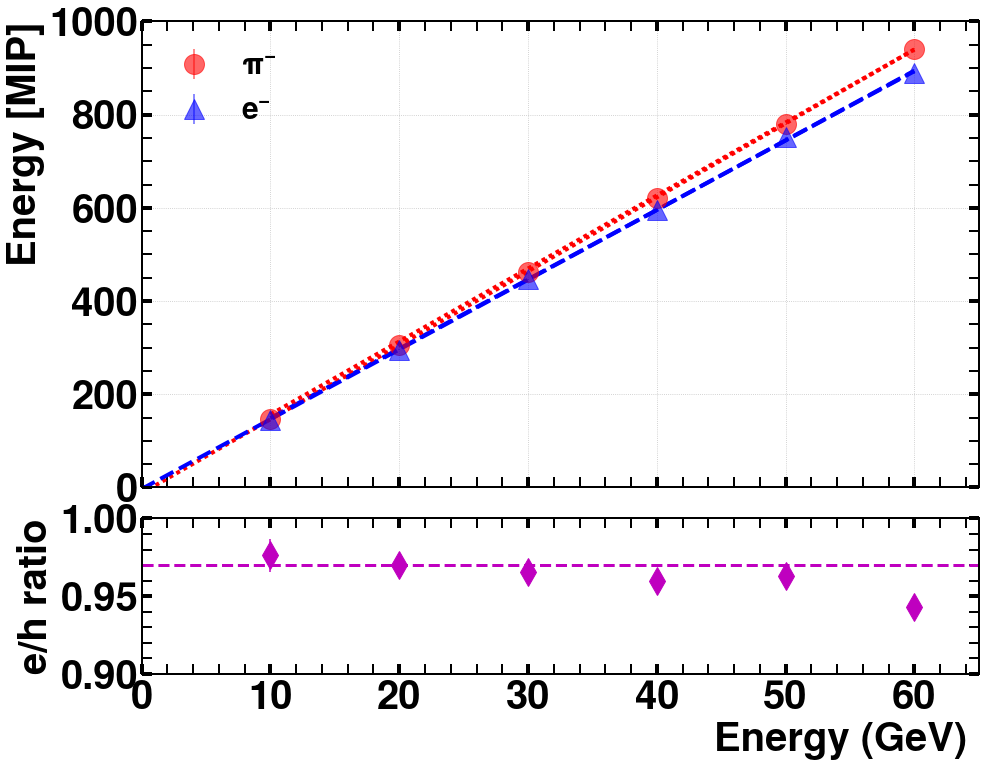

In [43]:
pi_means_50_MIP,e_means_50_MIP,pi_means_error_50_MIP,e_means_error_50_MIP,ratio_hole_50_MIP,\
ratio_hole_error_50_MIP=convert_to_MIP(pi_means_50,e_means_50,pi_means_error_50,e_means_error_50)

fig,(ax,ax1) = plt.subplots(2,1,figsize=(15, 12),gridspec_kw={'height_ratios': [3, 1]},sharex=True)

ax.errorbar(energies, pi_means_50_MIP, pi_means_error_50_MIP ,color="red",alpha=0.6,marker='o',linestyle='None',markersize=20,label='$\pi^{-}$')
ax.errorbar(energies,e_means_50_MIP, e_means_error_50_MIP,color="blue",alpha=0.6,marker='^',linestyle='None',markersize=20,label='$e^{-}$')
ax.set_ylabel('Energy [MIP]')
#ax.set_xlabel('Energy (GeV) ')



energies=np.asarray(energies)
mask=(energies<65)
#slope=popt[0]
#

popt_pi,_popcov=curve_fit(plots.linear_fit,energies,pi_means_50_MIP,p0=[0,25],bounds=(0,101))
popt_e,_popcov=curve_fit(plots.linear_fit,energies[mask],e_means_50_MIP[mask],p0=[0,10],bounds=(0,101))
c1=popt_pi[1]
ax.plot(energies[mask],plots.linear_fit(energies[mask],*popt_pi),color='r',linewidth='4',\
        linestyle=(0,(1,1)))


ax.plot(energies[mask],plots.linear_fit(energies[mask],*popt_e),color='b',linewidth='4',\
        linestyle='dashed')

z = np.polyfit(energies[mask], pi_means_50_MIP[mask], 1)
f = np.poly1d(z)
ax.plot((0, max(energies[mask])), (f(0), f(max(energies[mask]))),  color='r',linewidth='4',\
        linestyle=(0,(1,1)))
#ax.plot((0, max(energies[mask])), (f(0), (f(max(energies[mask]))),'r'))


z_e = np.polyfit(energies[mask], e_means_50_MIP[mask], 1)
f_e = np.poly1d(z_e)
ax.plot((0, max(energies[mask])), (f_e(0), f_e(max(energies[mask]))),  color='b',linewidth='4',\
        linestyle='dashed')
        
'''    
xlims = plt.xlim()
energies.insert(0, xlims[0])
pi_means_50_MIP.insert(0, np.polyval(p1, xlims[0]))
x.append(xlims[1])
y.append(np.polyval(p1, xlims[1]))
plt.plot(x, np.polyval(p1,x), 'r-', linewidth = 1.5)
plt.xlim(xlims)
'''

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,1000)
ax.set_xlim(0,75)
#ax.set_title("Fe-AHCAL ($\pi^-$)")

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)


ax1.errorbar(energies,ratio_hole_50_MIP,ratio_hole_error_50_MIP,marker='d',markersize='20',color='m',\
             linestyle='None')
ax1.set_ylim(0.90,1)
ax1.set_xlim(0,65)
ax1.yaxis.set_major_locator(MultipleLocator(0.05))   
ax1.set_xlabel('Energy (GeV) ')
ax1.set_ylabel('e/h ratio')
ax1.axhline(0.97,color='m',linewidth=3, linestyle='dashed')

plt.subplots_adjust(wspace=0, hspace=0.10)
#plt.tight_layout()
ax.legend(loc='upper left')

## Plot the mean values of energy deposited for the pions with different cuts

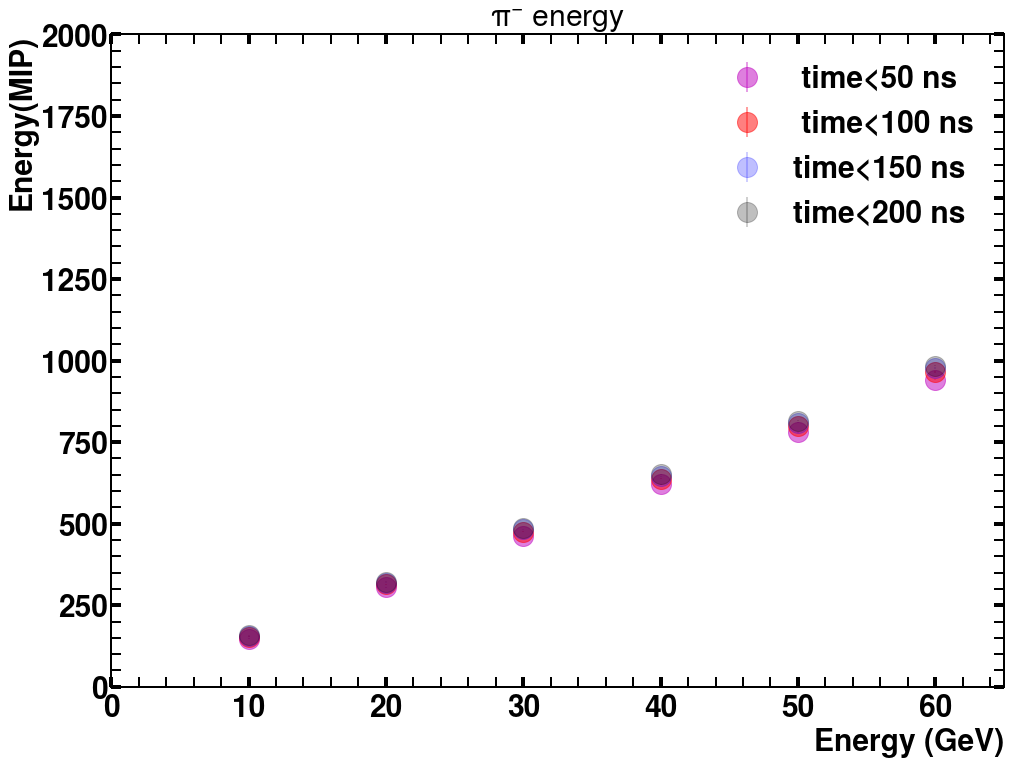

In [93]:
pi_means_50,e_means_50,pi_means_error_50,e_means_error_50,ratio_hole_50,ratio_hole_error_50=\
convert_to_MIP(pi_means_50,e_means_50,pi_means_error_50,e_means_error_50)

pi_means_100,e_means_100,pi_means_error_100,e_means_error_100,ratio_hole_100,ratio_hole_error_100=\
convert_to_MIP(pi_means_100,e_means_100,pi_means_error_100,e_means_error_100)

pi_means_150,e_means_150,pi_means_error_150,e_means_error_150,ratio_hole_150,ratio_hole_error_150=\
convert_to_MIP(pi_means_150,e_means_150,pi_means_error_150,e_means_error_150)

pi_means_200,e_means_200,pi_means_error_200,e_means_error_200,ratio_hole_200,ratio_hole_error_200=\
convert_to_MIP(pi_means_200,e_means_200,pi_means_error_200,e_means_error_200)



fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energies, pi_means_50, pi_means_error_50 ,color="m",alpha=0.5,marker='o',linestyle='None',\
                markersize=20,label=' time<50 ns')

ax.errorbar(energies, pi_means_100, pi_means_error_100 ,color="red",alpha=0.5,marker='o',linestyle='None',\
                markersize=20,label=' time<100 ns')

ax.errorbar(energies, pi_means_150, pi_means_error_150 ,color="blue",alpha=0.25,marker='o',linestyle='None',\
                markersize=20,label='time<150 ns')

ax.errorbar(energies, pi_means_200, pi_means_error_200 ,color="black",alpha=0.25,marker='o',linestyle='None',\
                markersize=20,label='time<200 ns')
ax.set_title('$\pi^{-}$ energy' )
ax.set_xlim(0,65)
ax.set_ylim(0,2000)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Energy(MIP)')
plt.legend()
plt.show()



## Mean energy deposition for electron with different time cuts

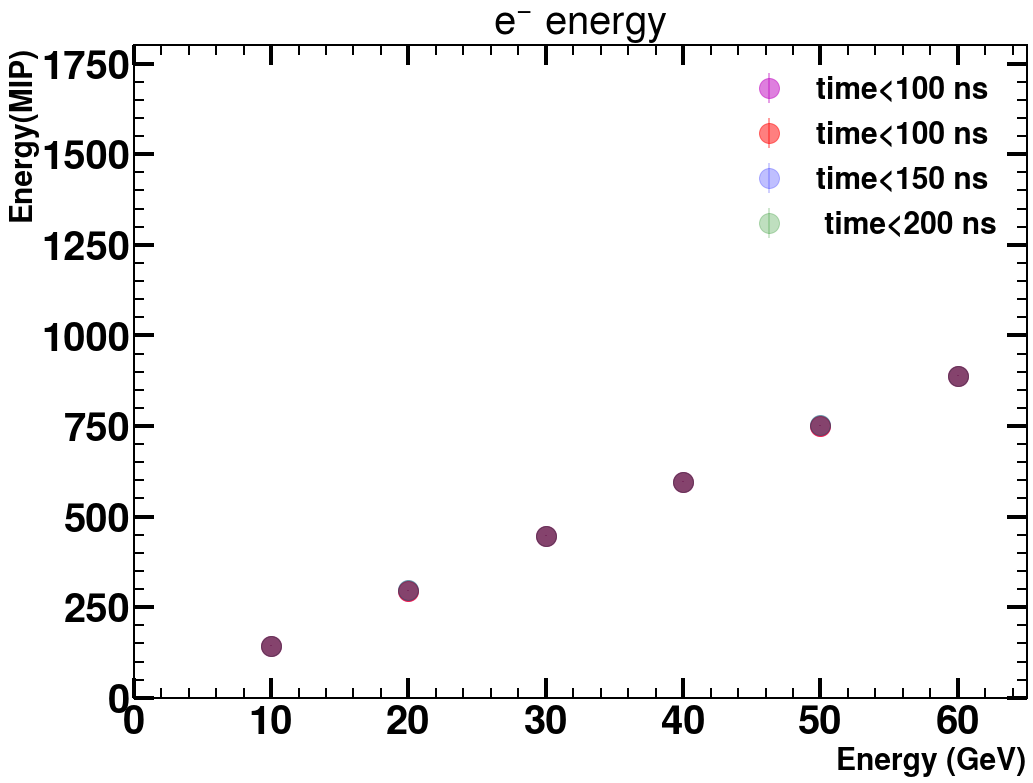

In [29]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energies, e_means_50, e_means_error_50 ,color="m",alpha=0.5,marker='o',linestyle='None',\
                markersize=20,label='time<100 ns')
ax.errorbar(energies, e_means_100, e_means_error_100 ,color="red",alpha=0.5,marker='o',linestyle='None',\
                markersize=20,label='time<100 ns')

ax.errorbar(energies, e_means_150, e_means_error_150 ,color="blue",alpha=0.25,marker='o',linestyle='None',\
                markersize=20,label='time<150 ns')

ax.errorbar(energies, e_means_200, e_means_error_200 ,color="green",alpha=0.25,marker='o',linestyle='None',\
                markersize=20,label=' time<200 ns')


ax.set_xlim(0,65)
ax.set_ylim(0,1800)
ax.set_title('$e^{-}$ energy')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Energy(MIP)')
plt.legend()
plt.show()

## e/h ratio with different timing cuts for Fe-W HCALI

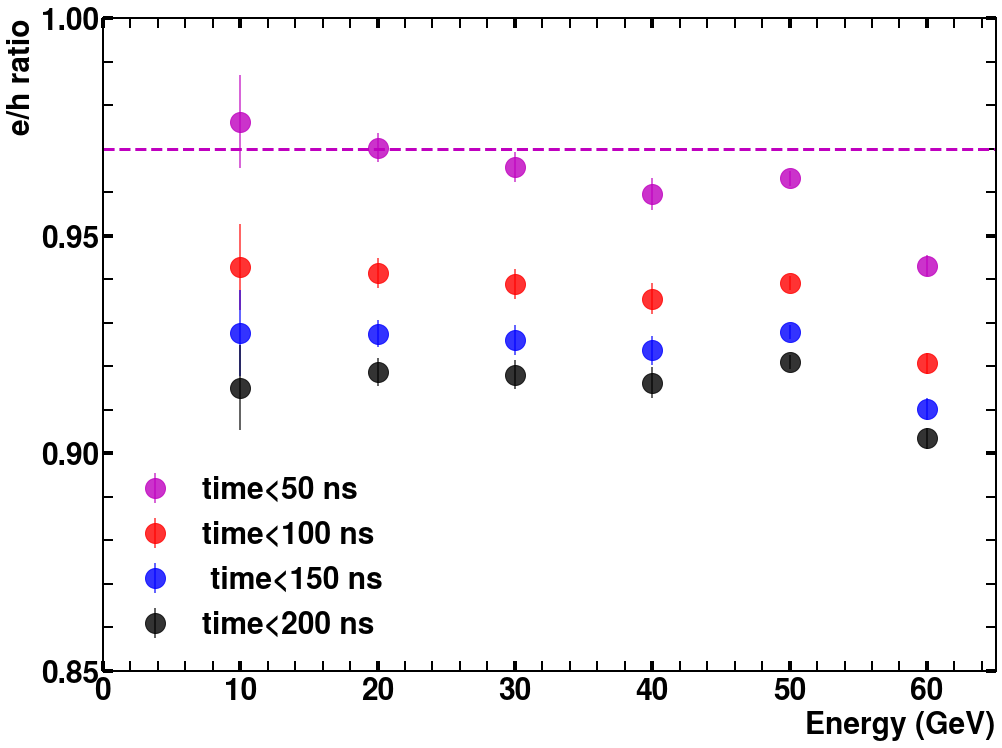

In [99]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energies, ratio_hole_50, ratio_hole_error_50 ,color="m",alpha=0.8,marker='o',linestyle='None',\
                markersize=20,label='time<50 ns')

ax.errorbar(energies, ratio_hole_100, ratio_hole_error_100 ,color="red",alpha=0.8,marker='o',linestyle='None',\
                markersize=20,label='time<100 ns')

ax.errorbar(energies, ratio_hole_150, ratio_hole_error_150 ,color="blue",alpha=0.8,marker='o',linestyle='None',\
                markersize=20,label=' time<150 ns')

ax.errorbar(energies, ratio_hole_200, ratio_hole_error_200 ,color="black",alpha=0.8,marker='o',linestyle='None',\
                markersize=20,label='time<200 ns')

ax.set_xlim(0,65)
ax.set_ylim(0.85,1)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('e/h ratio')
ax.axhline(0.97,color='m',linewidth=3, linestyle='dashed')
ax.yaxis.set_major_locator(MultipleLocator(0.05))  
plt.legend()
plt.show()

## Time distribution

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,18),sharey=True,sharex=True)
fileindex_W_Fe="deg"#_Fe-W"
fraction=1 #(1/10 of event is selected)
ienergy=50

fileindex_W="deg" ## for insert file or HCAL orginal file
fileindex_W_Fe="deg"#_Fe-W" ## for insert WITH W 30 LAYER AND FE 20 LAYERS
nbins=100
max_range=1200
particle ='e-'
## FOR THE HCAL Insert mixture W-Fe
ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
phi_wFe,ene_good_wFe=plots.read_rootfile_HCAL_Insert(fileindex_W_Fe,fraction,FilePathReco,ienergy,theta,particle,\
                                                 Time_Threshold,Energy_Threshold)

ax.hist(ak.flatten(time_wFe),bins=100, range=(0,500),color='r', linewidth='3',\
         histtype='step',label='$e-^-$')

particle ='pi-'

ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
phi_wFe,ene_good_wFe=plots.read_rootfile_HCAL_Insert(fileindex_W_Fe,fraction,FilePathReco,ienergy,\
theta,particle,Time_Threshold,Energy_Threshold)

ax.hist(ak.flatten(time_wFe),bins=100, range=(0,500),color='b', linewidth='3', \
        histtype='step',label='$\pi-$')

ax.set_title('Time Distribution')
ax.set_ylabel('Entries')
ax.set_xlabel('Time (ns)')
ax.set_yscale('log')
ax.axvline(50,color='m',linewidth=3, linestyle='dashed')
ax.axvline(100,color='red',linewidth=3, linestyle='dashed')
ax.axvline(150,color='blue',linewidth=3, linestyle='dashed')
ax.axvline(200,color='black',linewidth=3, linestyle='dashed')
#ax.set_xlim(0,500)
plt.legend()
plt.show()

In [ ]:
### Updated numbers with 55 layers of calorimeter before it was 50 layers

<function matplotlib.pyplot.show(close=None, block=None)>

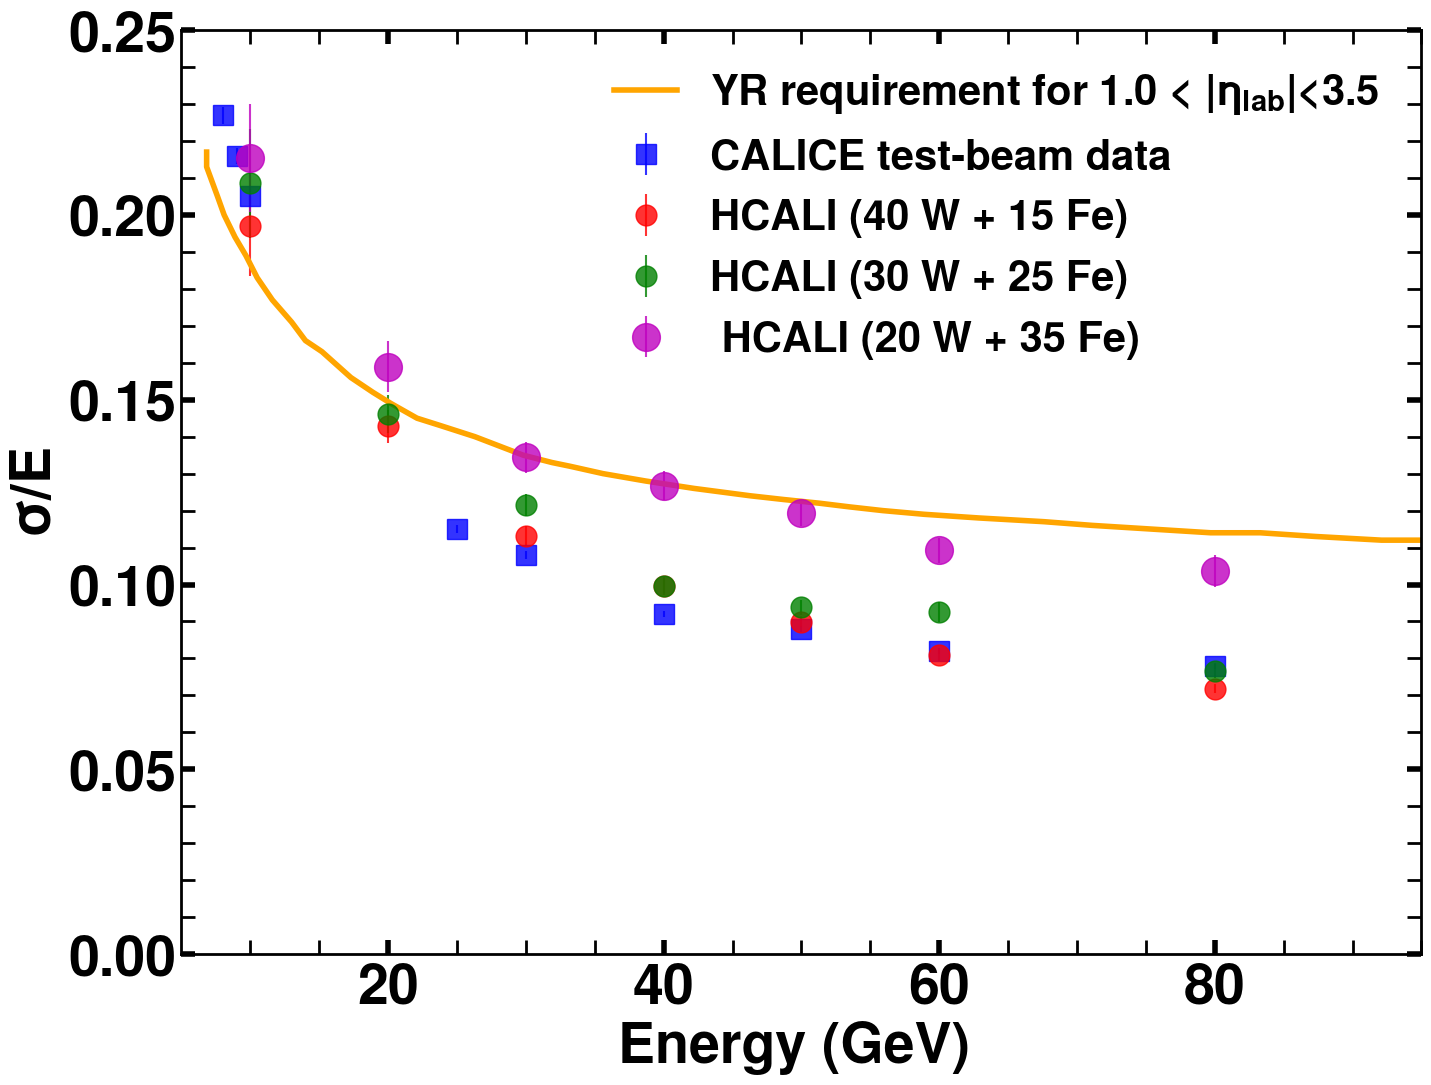